In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 645.03it/s]
100%|██████████| 720/720 [00:08<00:00, 80.91it/s]
8280it [00:00, 231146.50it/s]
7920it [00:00, 206222.18it/s]
710it [00:01, 662.66it/s]
100%|██████████| 710/710 [00:08<00:00, 85.13it/s]
7920it [00:00, 232377.91it/s]
7560it [00:00, 66380.30it/s]
720it [00:01, 713.55it/s]
100%|██████████| 720/720 [00:08<00:00, 83.98it/s]
8280it [00:00, 180970.79it/s]
720it [00:01, 712.13it/s]
100%|██████████| 720/720 [00:08<00:00, 82.61it/s]
8280it [00:00, 230659.84it/s]
700it [00:00, 766.71it/s]
100%|██████████| 700/700 [00:08<00:00, 87.13it/s]
8280it [00:00, 68832.54it/s]
509it [00:00, 1107.71it/s]
100%|██████████| 509/509 [00:03<00:00, 169.64it/s]
3664it [00:00, 231058.47it/s]
700it [00:00, 702.61it/s]
100%|██████████| 700/700 [00:07<00:00, 87.95it/s]
8280it [00:00, 227892.97it/s]
700it [00:01, 676.39it/s]
100%|██████████| 700/700 [00:08<00:00, 87.35it/s]
8280it [00:00, 232863.77it/s]
710it [00:02, 340.59it/s]
100%|██████████| 710/710 [00:08<00:00, 85.21it/s]
8280it [00:00, 2

In [8]:
len(data_train), len(data_val), len(data_test)

(16200, 15480, 11)

In [ ]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [ ]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [ ]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [ ]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [ ]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [ ]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.096795


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.030427
Epoch 1...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.046336


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.035881
EarlyStopping counter: 1 out of 5
Epoch 2...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.04492


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.026677


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.044001


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.025922


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 4...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.043015


100%|██████████| 484/484 [00:37<00:00, 12.92it/s]


Mean val loss: 0.021329


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.04223


100%|██████████| 484/484 [00:37<00:00, 12.89it/s]


Mean val loss: 0.020594


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.041668


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.020263


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.041036


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.016556


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.040865


100%|██████████| 484/484 [00:37<00:00, 12.91it/s]


Mean val loss: 0.015138


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.040534


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.015525
EarlyStopping counter: 1 out of 5
Epoch 10...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.04046


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016361
EarlyStopping counter: 2 out of 5
Epoch 11...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.040345


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016432
EarlyStopping counter: 3 out of 5
Epoch 12...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.040155


100%|██████████| 484/484 [00:37<00:00, 12.88it/s]


Mean val loss: 0.013631


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039938


100%|██████████| 484/484 [00:37<00:00, 12.95it/s]


Mean val loss: 0.013423


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039802


100%|██████████| 484/484 [00:36<00:00, 13.08it/s]


Mean val loss: 0.013397


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039468


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014106
EarlyStopping counter: 1 out of 5
Epoch 16...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039373


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.022273
EarlyStopping counter: 2 out of 5
Epoch 17...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039519


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.016282
EarlyStopping counter: 3 out of 5
Epoch 18...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038825


100%|██████████| 484/484 [00:36<00:00, 13.12it/s]


Mean val loss: 0.013002


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 19...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.039101


100%|██████████| 484/484 [00:37<00:00, 12.90it/s]


Mean val loss: 0.012814


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038952


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.012916
EarlyStopping counter: 1 out of 5
Epoch 21...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038829
Epoch    21: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013597
EarlyStopping counter: 2 out of 5
Epoch 22...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038443


100%|██████████| 484/484 [00:37<00:00, 12.93it/s]


Mean val loss: 0.01255


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 23...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038346


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.012816
EarlyStopping counter: 1 out of 5
Epoch 24...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.0383


100%|██████████| 484/484 [00:37<00:00, 12.94it/s]


Mean val loss: 0.012523


  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 25...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.038066


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014129
EarlyStopping counter: 1 out of 5
Epoch 26...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.03772


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013043
EarlyStopping counter: 2 out of 5
Epoch 27...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037574


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.013905
EarlyStopping counter: 3 out of 5
Epoch 28...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037442


  0%|          | 0/507 [00:00<?, ?it/s]

Mean val loss: 0.014762
EarlyStopping counter: 4 out of 5
Epoch 29...


  0%|          | 0/484 [00:00<?, ?it/s]

Mean train loss: 0.037415


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.014526
EarlyStopping counter: 5 out of 5


 71%|███████   | 183/259 [01:52<00:45,  1.68it/s]

## Dump experiment results

In [ ]:
import pickle
import json

In [ ]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [27]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [ ]:
model_conf

In [19]:
import torch
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [29]:
from itertools import chain

In [30]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [31]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

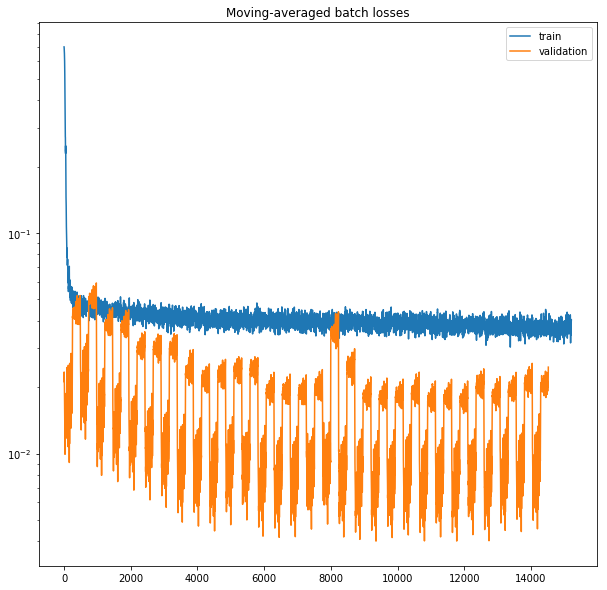

In [32]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [33]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

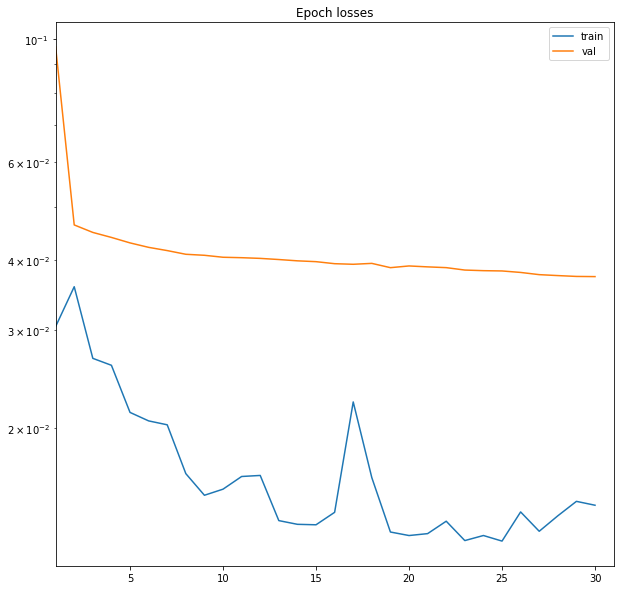

In [34]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [35]:
import os

In [36]:
import torch

In [37]:
from visualization_utils import output_to_binary, plot_sample

In [38]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

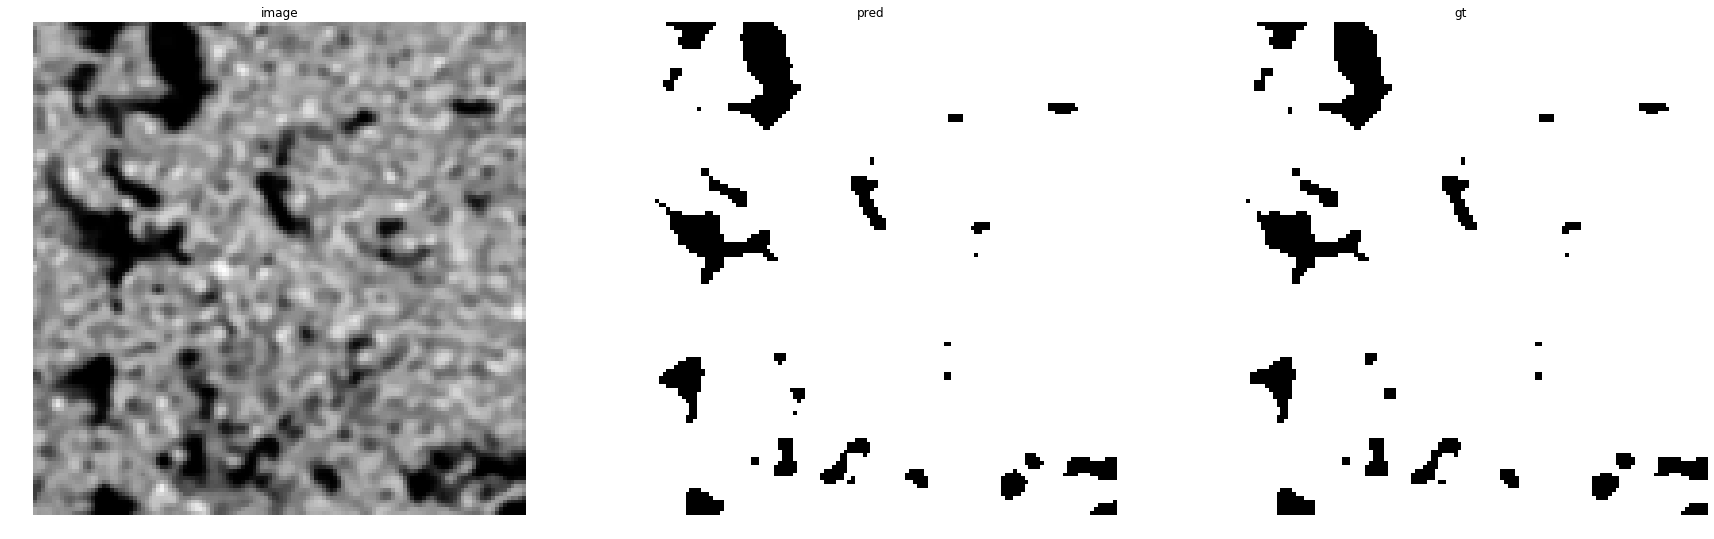

accuracy    : 0.99542236328125
precision   : 0.9975697865353038
recall      : 0.9975042690135295
f1          : 0.9975370266986305
pr_auc      : 0.9999804582132057
iou         : 0.9950861560636834


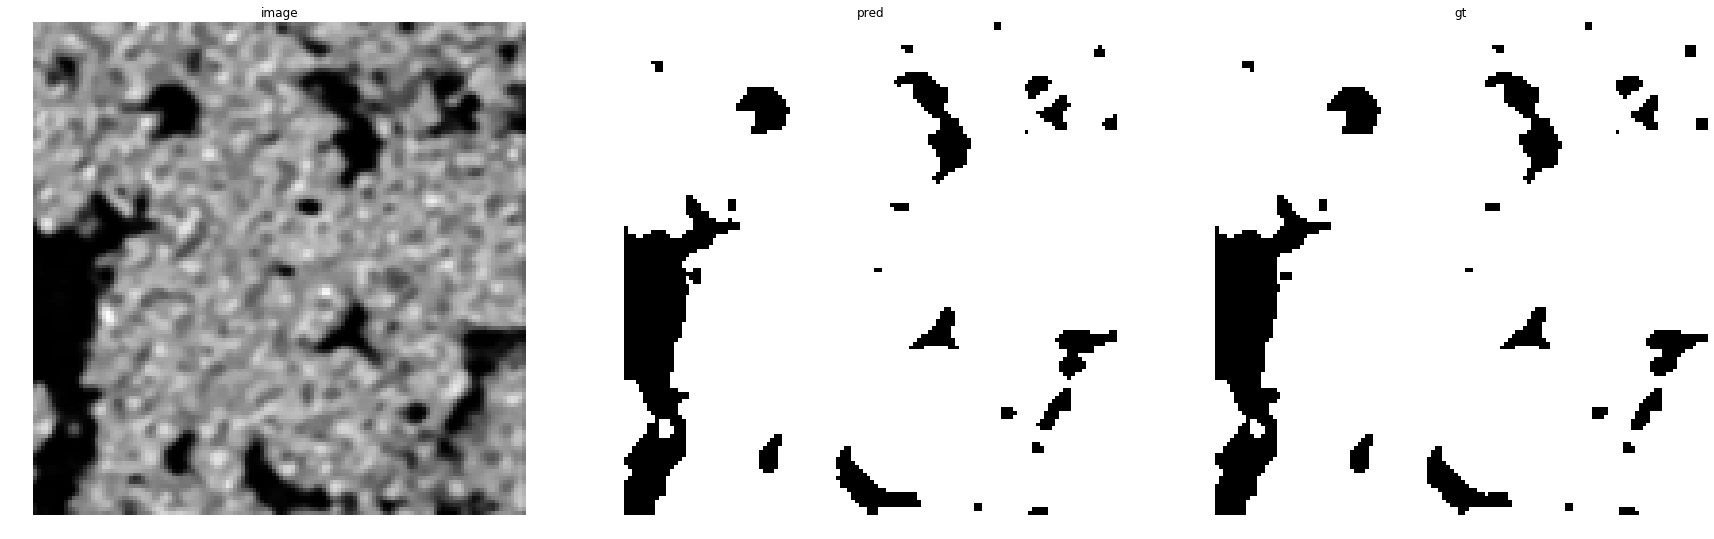

accuracy    : 0.99517822265625
precision   : 0.9971020492651624
recall      : 0.9974461623412479
f1          : 0.9972740761188365
pr_auc      : 0.9999768705942133
iou         : 0.9945629731589815


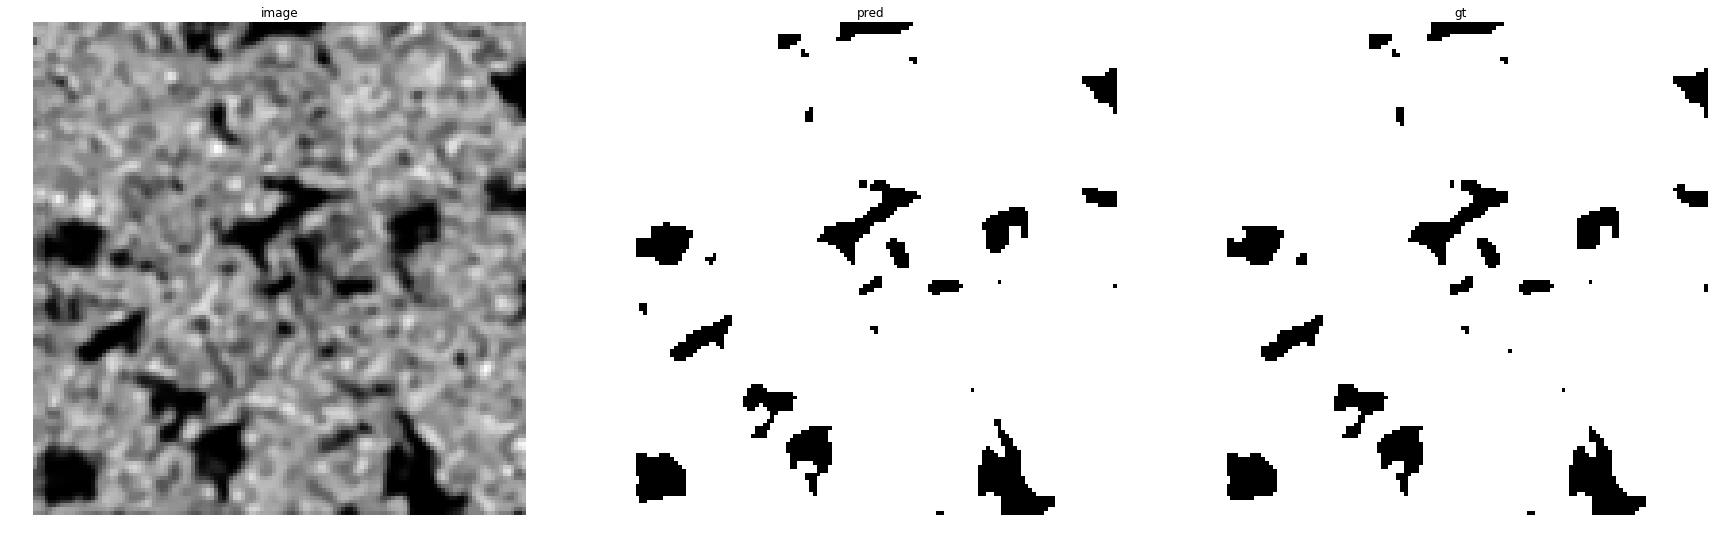

accuracy    : 0.99560546875
precision   : 0.9976824261687194
recall      : 0.9975503177966102
f1          : 0.9976163676090843
pr_auc      : 0.9999829302400506
iou         : 0.9952440716031442


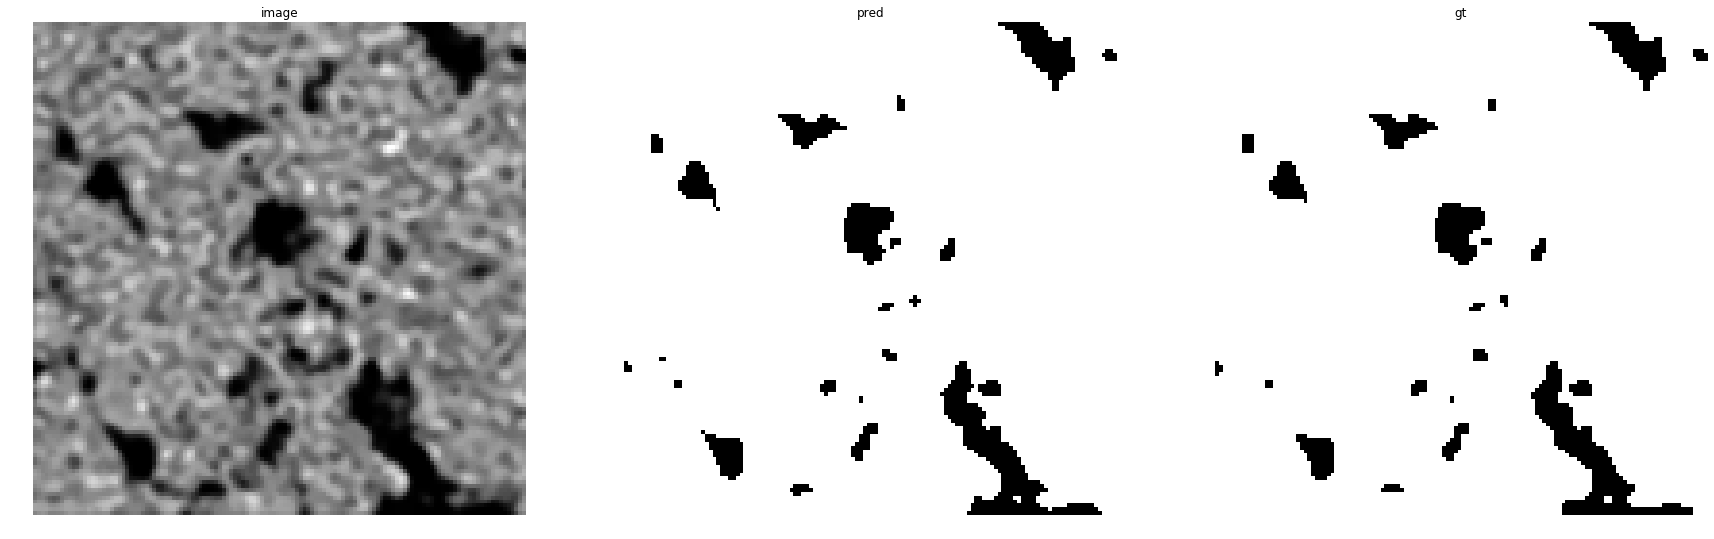

accuracy    : 0.99658203125
precision   : 0.9984296276908984
recall      : 0.9979072657118566
f1          : 0.9981683783606986
pr_auc      : 0.9999887917475394
iou         : 0.996343454129938


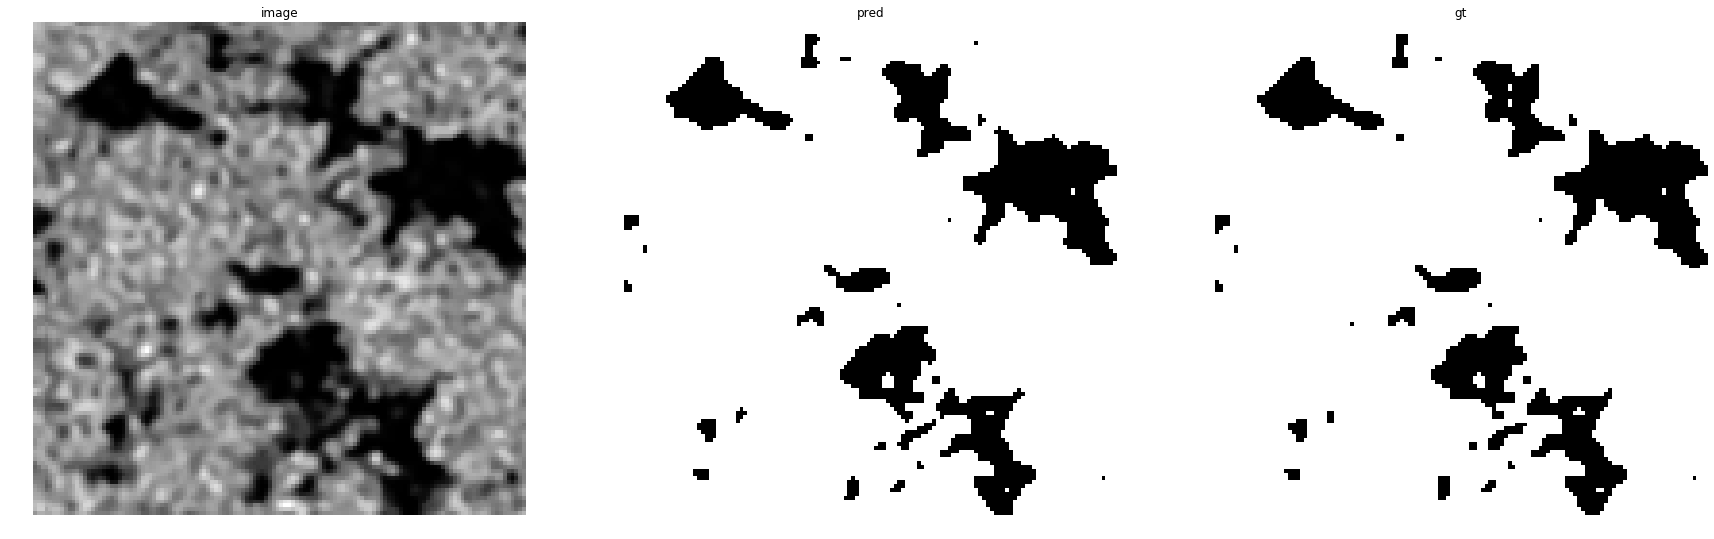

accuracy    : 0.9942626953125
precision   : 0.9968769962382
recall      : 0.9964526427811281
f1          : 0.9966647743400511
pr_auc      : 0.9999680032833801
iou         : 0.9933517221868591


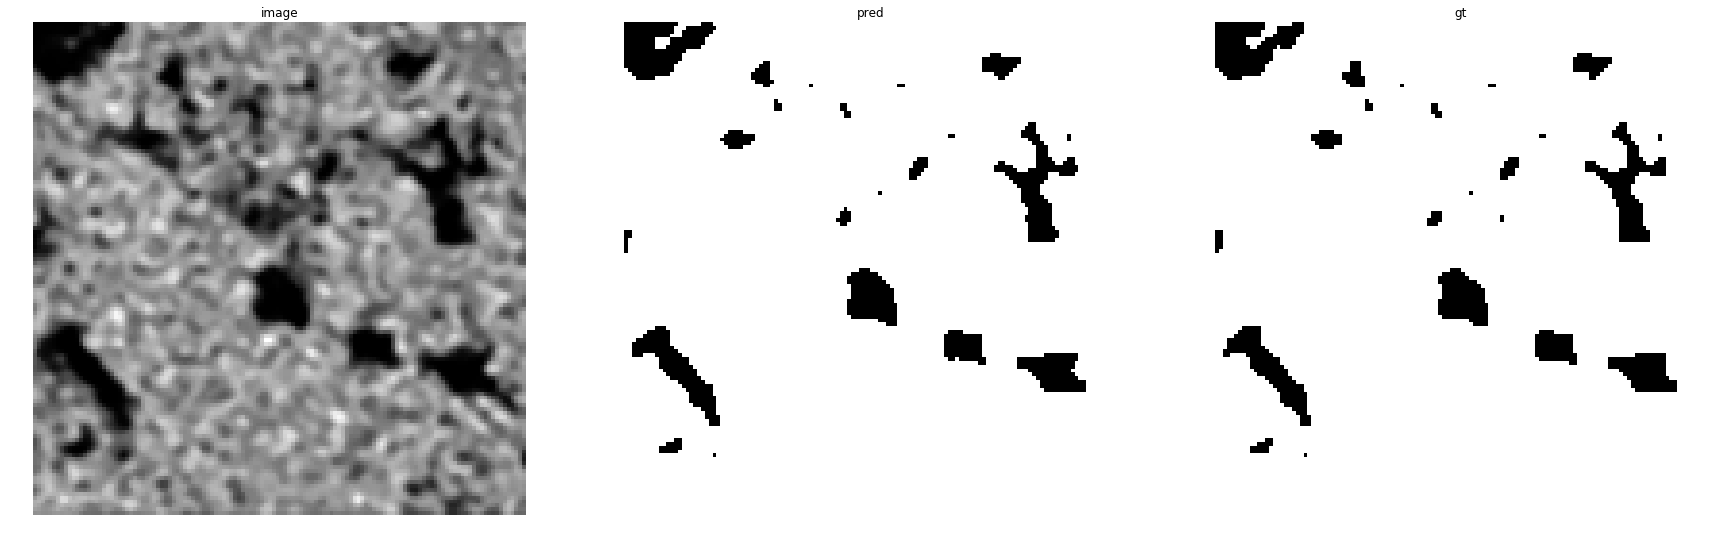

accuracy    : 0.9967041015625
precision   : 0.9984247834077186
recall      : 0.9980317543629444
f1          : 0.998228230198832
pr_auc      : 0.9999875038879965
iou         : 0.9964627276300275


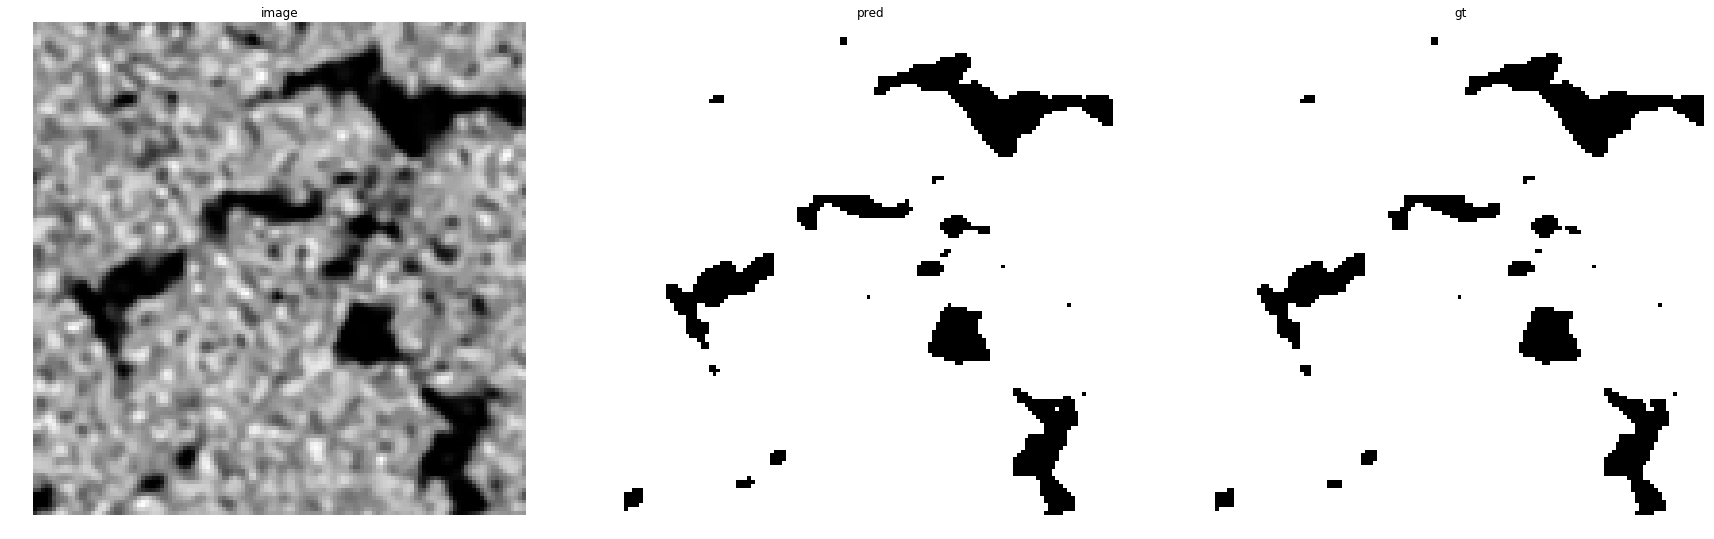

accuracy    : 0.99609375
precision   : 0.9987251744498121
recall      : 0.9969859343603483
f1          : 0.9978547965408595
pr_auc      : 0.999985461609562
iou         : 0.9957187771757308


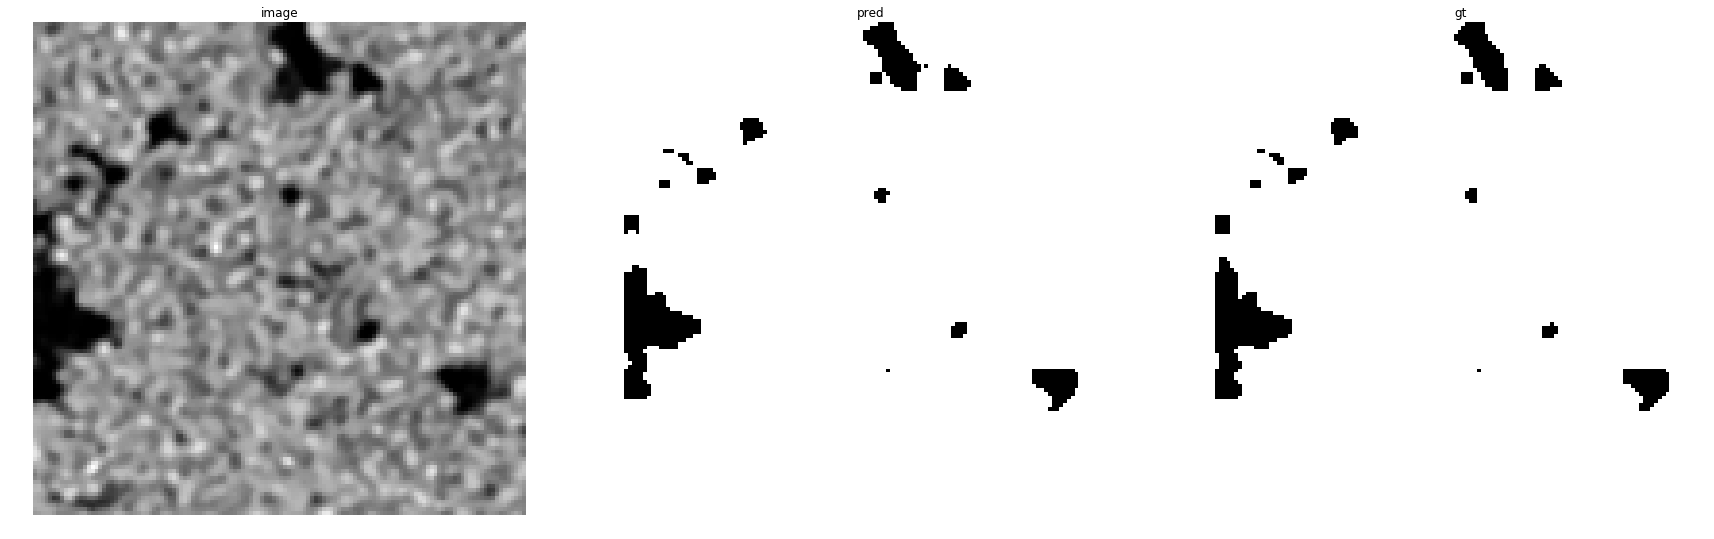

accuracy    : 0.9971923828125
precision   : 0.9984682154710237
recall      : 0.9985956849227626
f1          : 0.9985319461288057
pr_auc      : 0.9999943032977148
iou         : 0.997068196303378


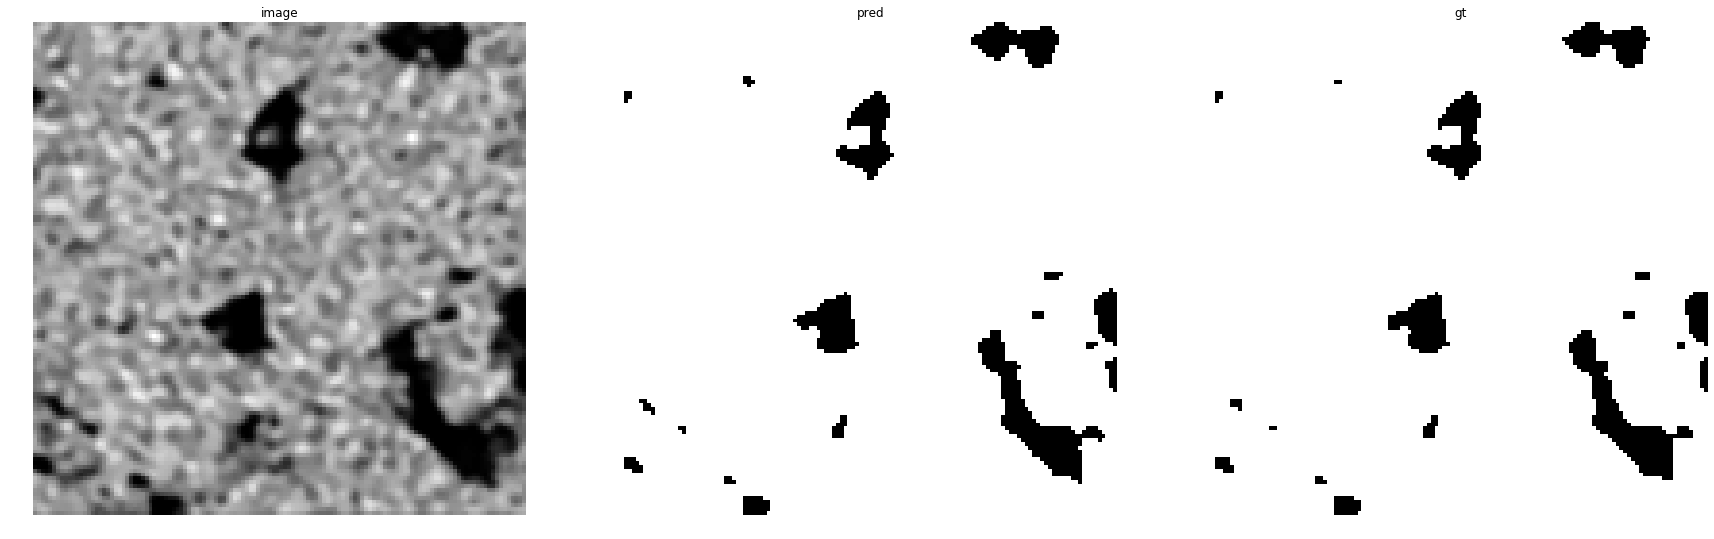

accuracy    : 0.996826171875
precision   : 0.999024199843872
recall      : 0.997596466155645
f1          : 0.9983098225313659
pr_auc      : 0.9999934146069623
iou         : 0.996625348822117


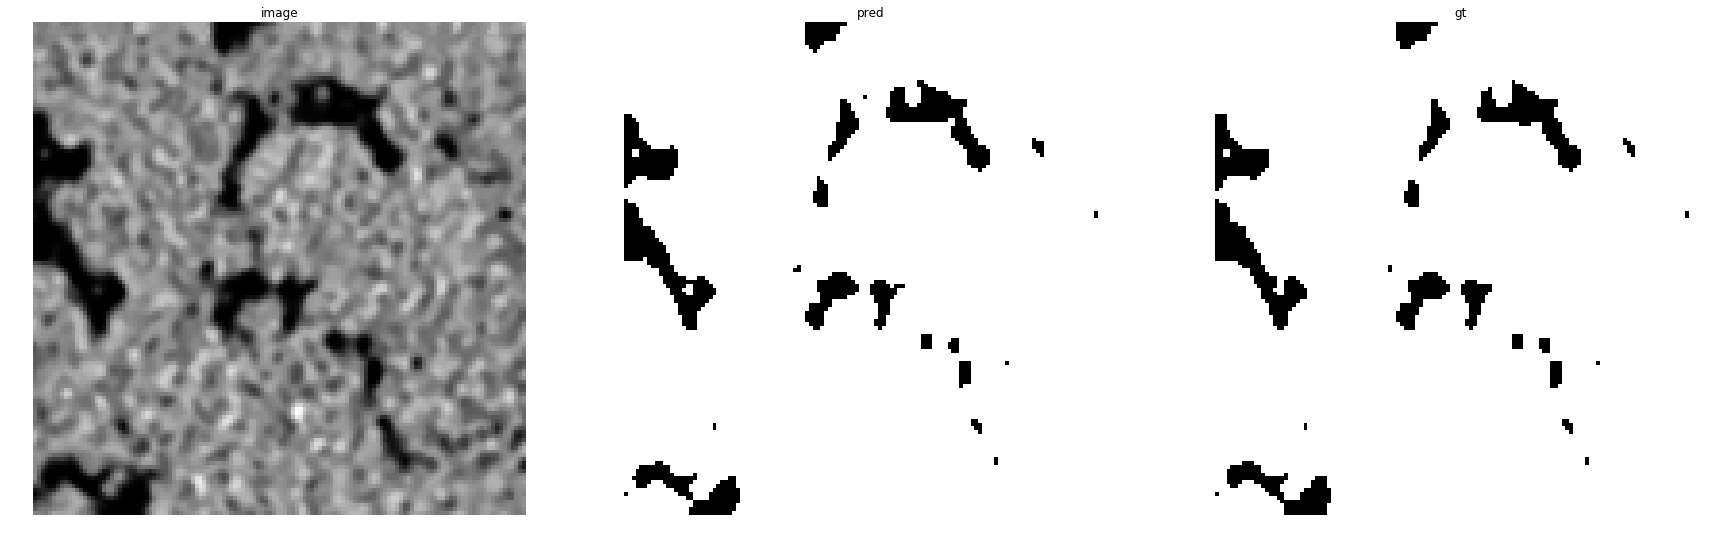

accuracy    : 0.99591064453125
precision   : 0.998167779086507
recall      : 0.9974498136402276
f1          : 0.9978086672117743
pr_auc      : 0.9999839693739574
iou         : 0.9956269173030481


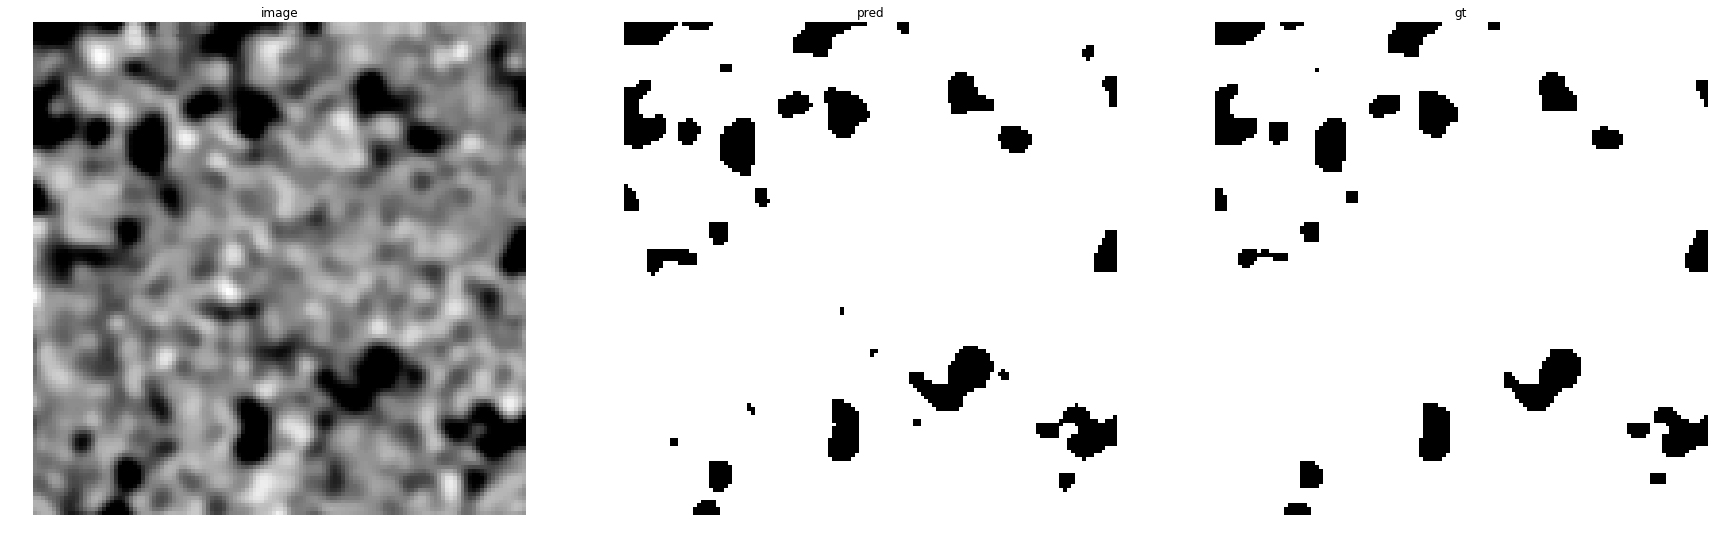

accuracy    : 0.986572265625
precision   : 0.9998657267539443
recall      : 0.9855734233339951
f1          : 0.9926681330400586
pr_auc      : 0.9999515649170818
iou         : 0.9854429960960762


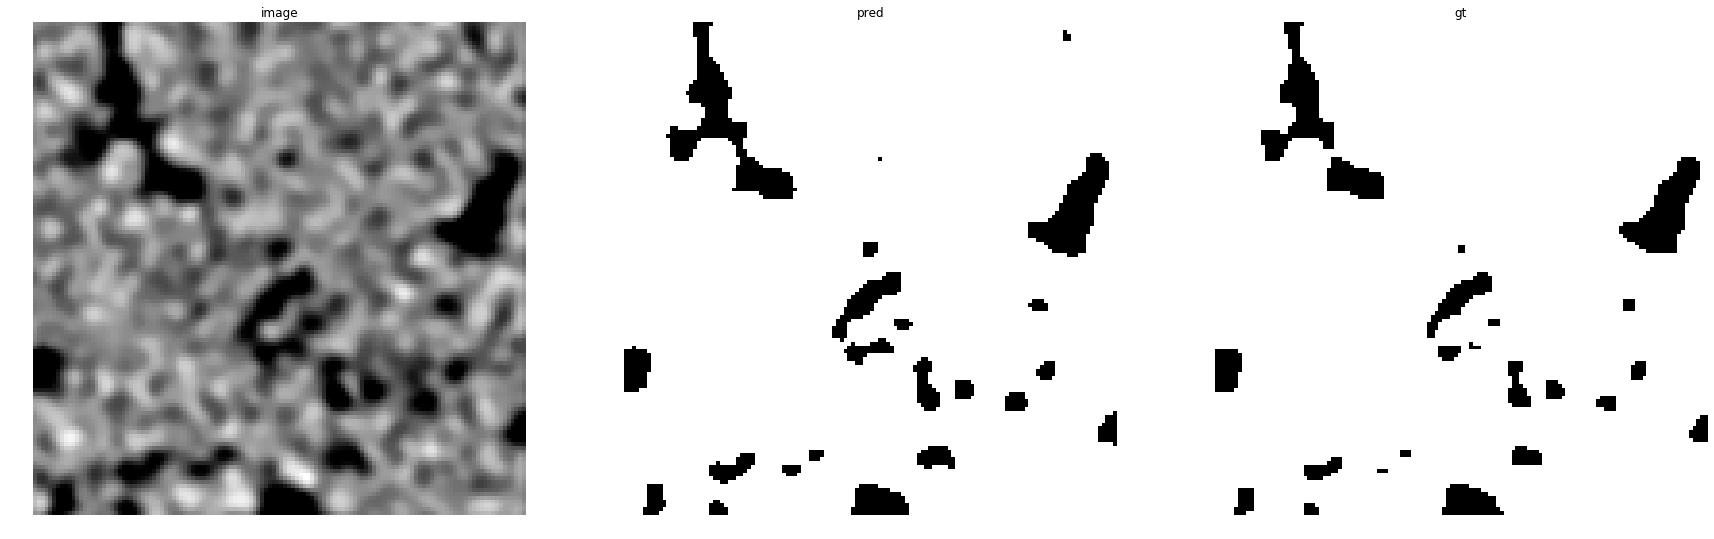

accuracy    : 0.98779296875
precision   : 0.999667066187242
recall      : 0.9871778011572856
f1          : 0.993383180043671
pr_auc      : 0.9999555212486221
iou         : 0.9868533491093144


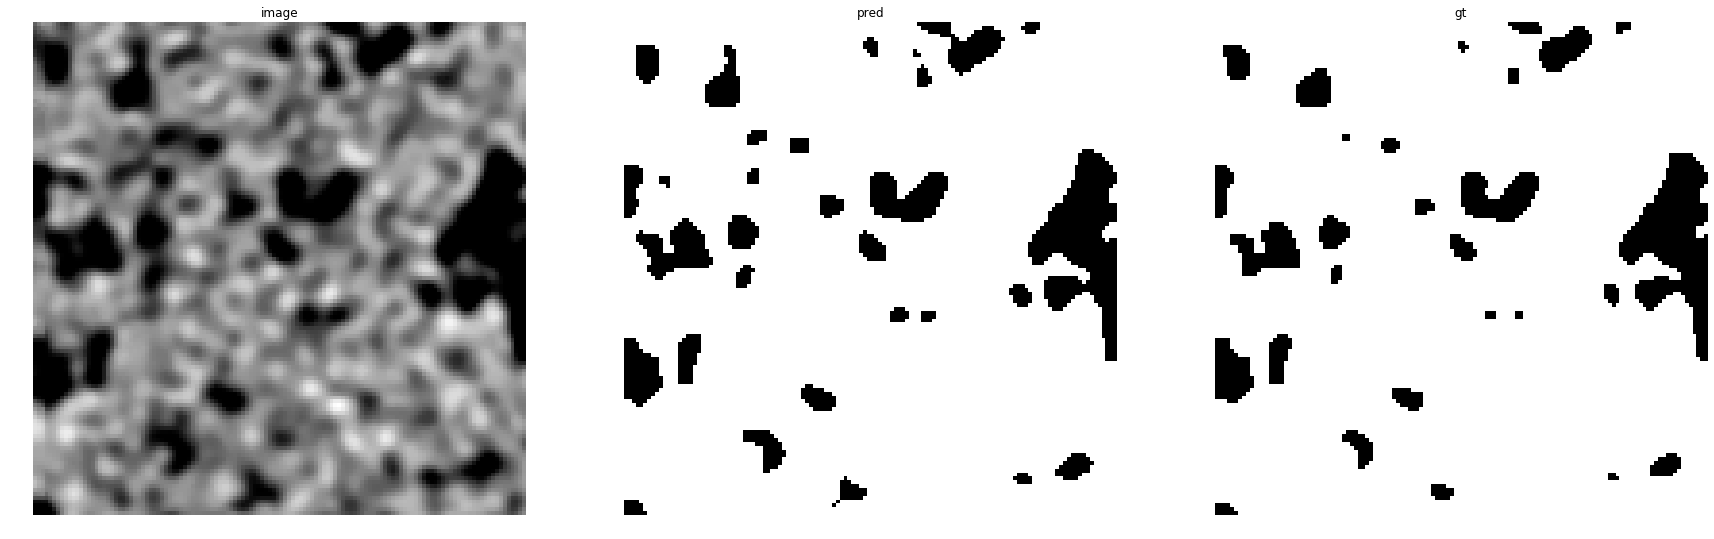

accuracy    : 0.9832763671875
precision   : 0.9991634715928895
recall      : 0.9820486467968482
f1          : 0.9905321354526607
pr_auc      : 0.9998916932850772
iou         : 0.9812418703361402


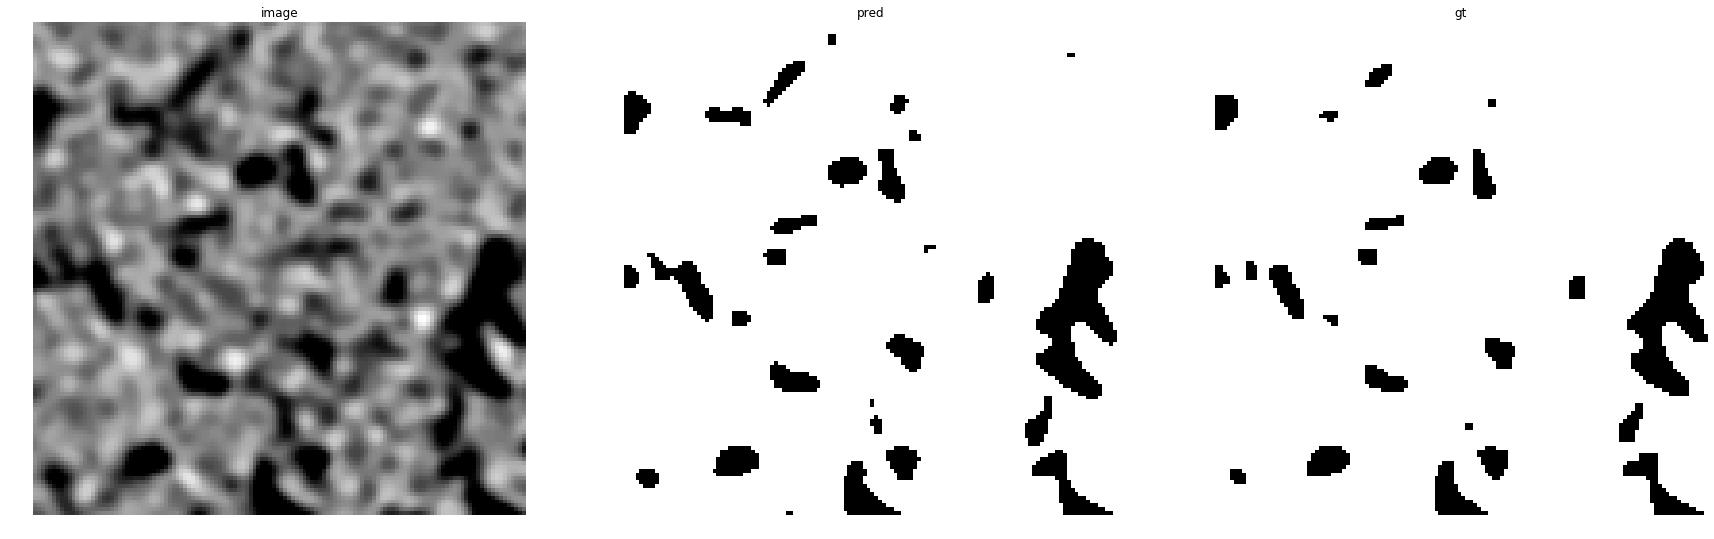

accuracy    : 0.983154296875
precision   : 0.9996626863657829
recall      : 0.982039896613427
f1          : 0.990772933939556
pr_auc      : 0.9998933790586527
iou         : 0.981714588578243


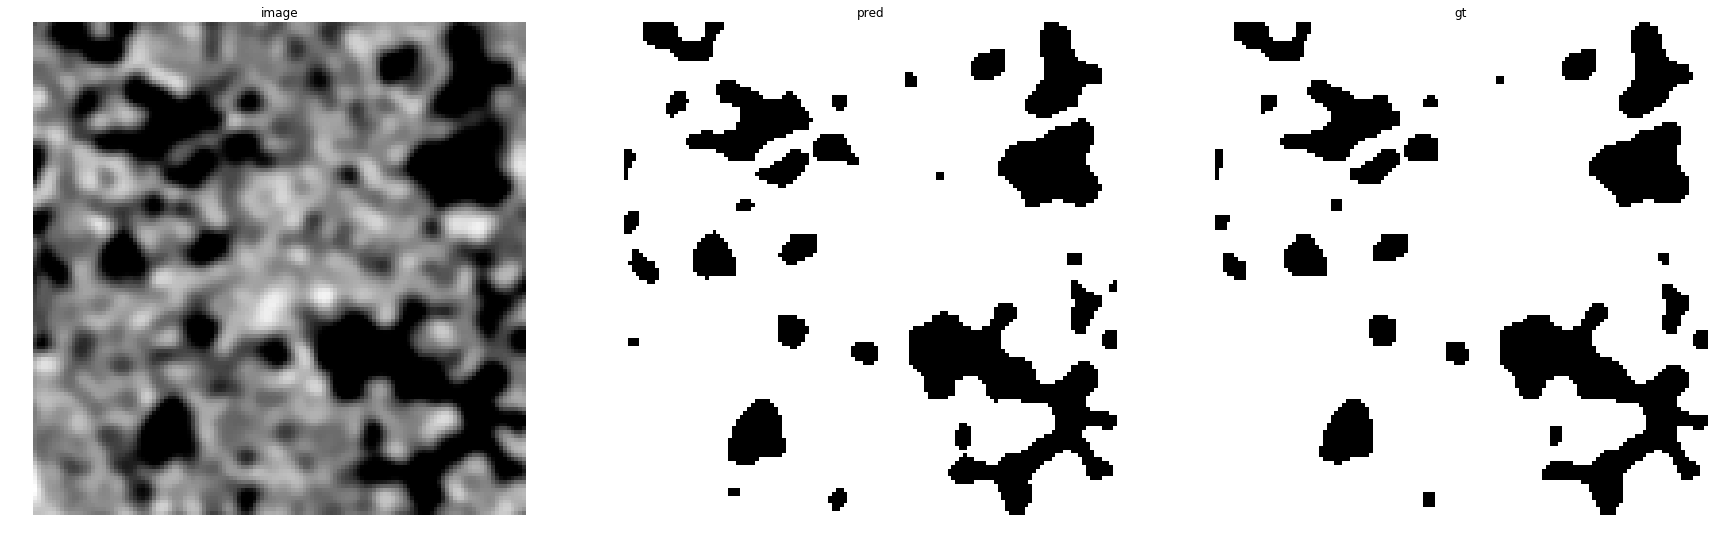

accuracy    : 0.98333740234375
precision   : 0.998789895628498
recall      : 0.9809106439872243
f1          : 0.9897695334457561
pr_auc      : 0.9998409515673212
iou         : 0.9797462719786334


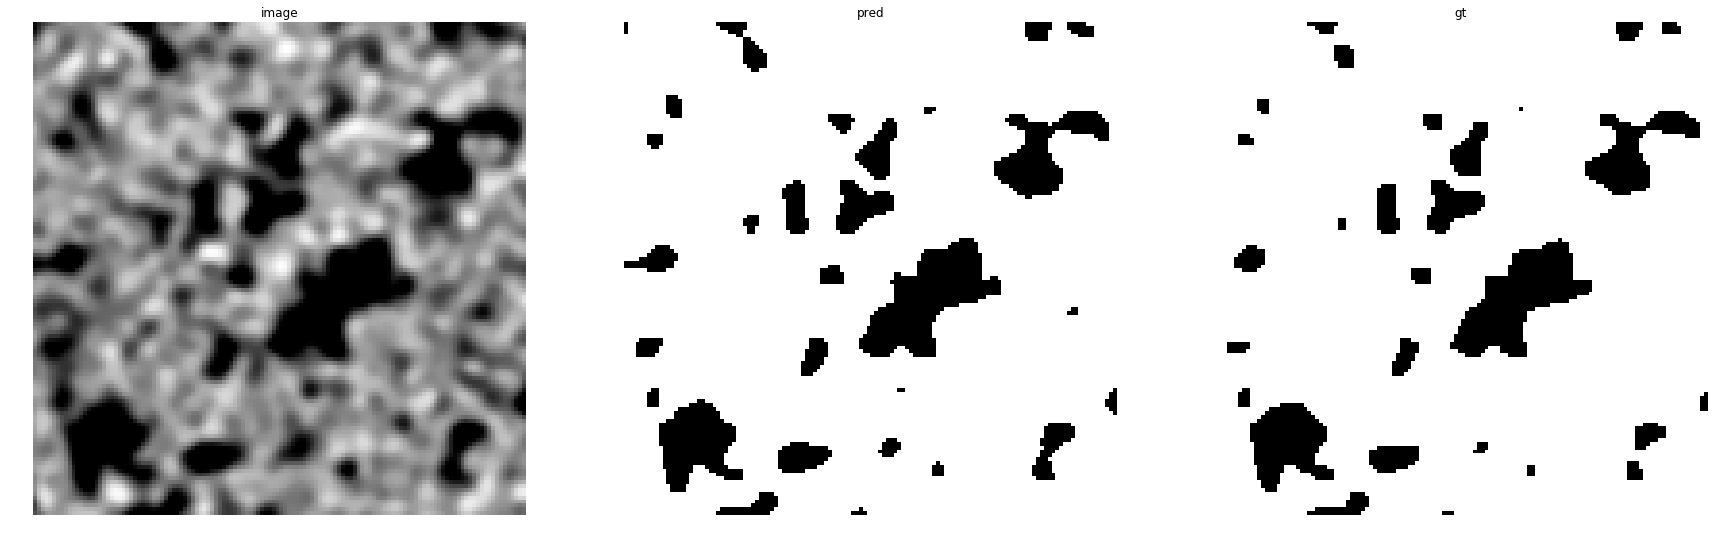

accuracy    : 0.98480224609375
precision   : 0.9992981471083661
recall      : 0.9834910547765421
f1          : 0.9913315926892949
pr_auc      : 0.9999060517199034
iou         : 0.9828121764340443


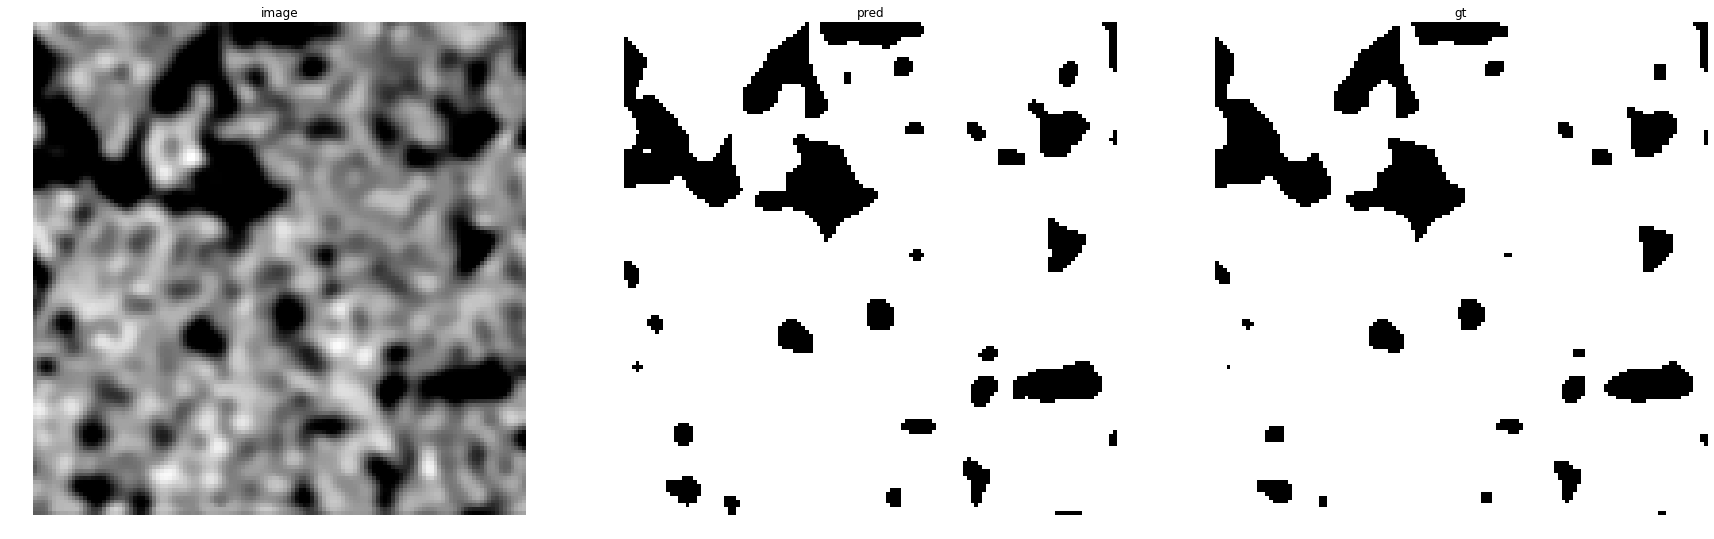

accuracy    : 0.98382568359375
precision   : 0.999147787799162
recall      : 0.9823348694316436
f1          : 0.9906699996479246
pr_auc      : 0.999867716221579
iou         : 0.9815124877912655


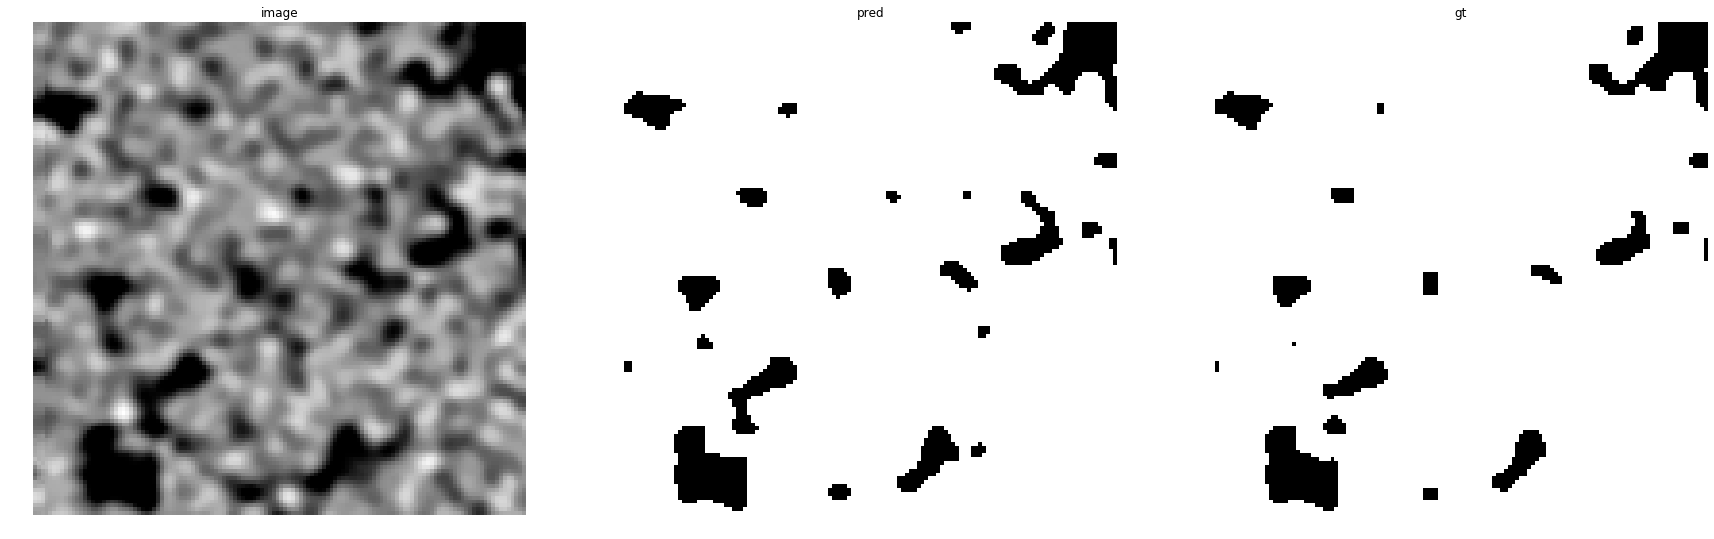

accuracy    : 0.98431396484375
precision   : 0.9994643096290344
recall      : 0.9835914332784185
f1          : 0.9914643462087749
pr_auc      : 0.9998949728999651
iou         : 0.9830731739445432


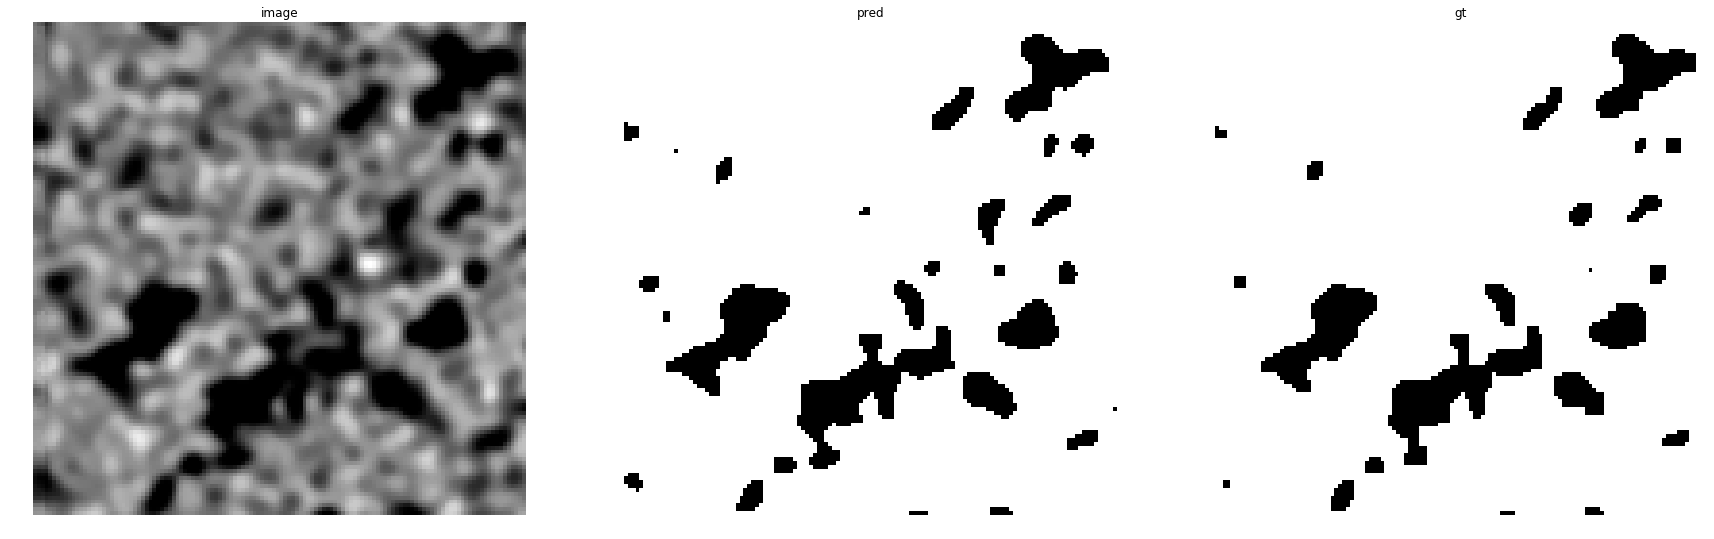

accuracy    : 0.98468017578125
precision   : 0.9990329488153623
recall      : 0.9838775510204082
f1          : 0.9913973335161258
pr_auc      : 0.999896146589917
iou         : 0.9829414163381813


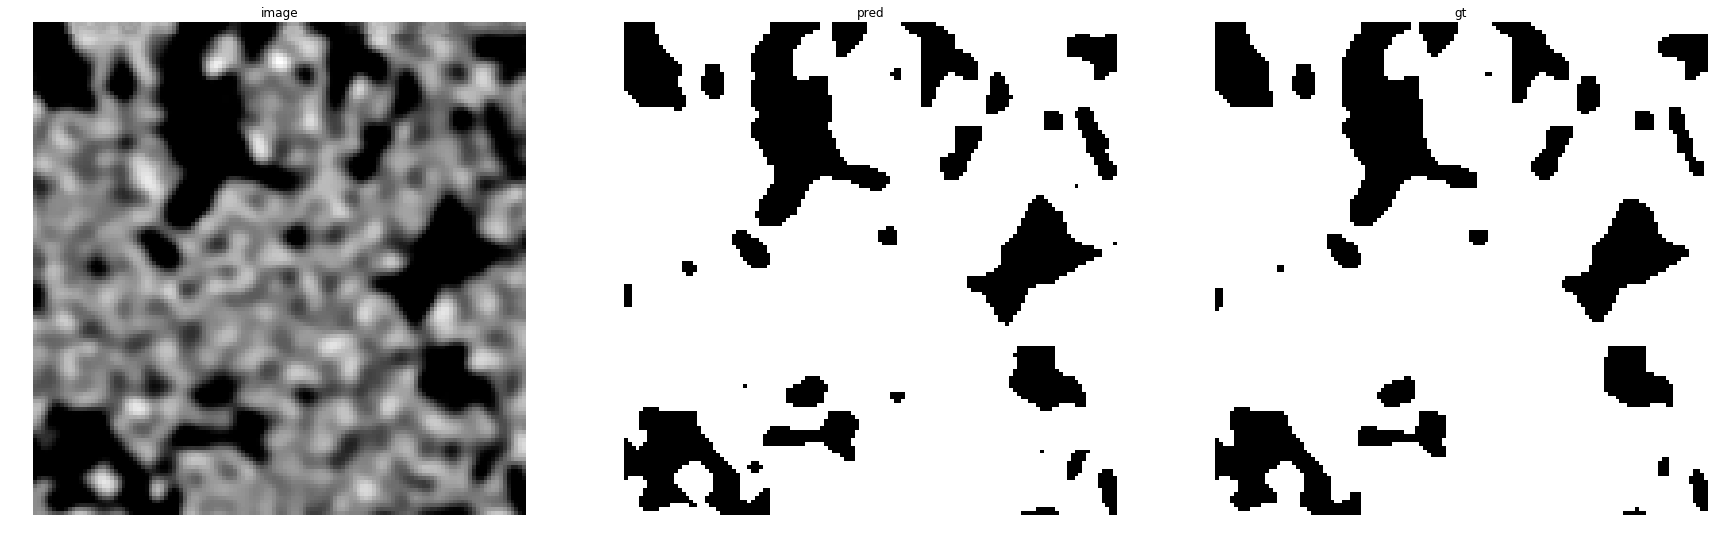

accuracy    : 0.984375
precision   : 0.9976008048912622
recall      : 0.9828440716736562
f1          : 0.9901674604393917
pr_auc      : 0.9997563161647638
iou         : 0.9805263958618591


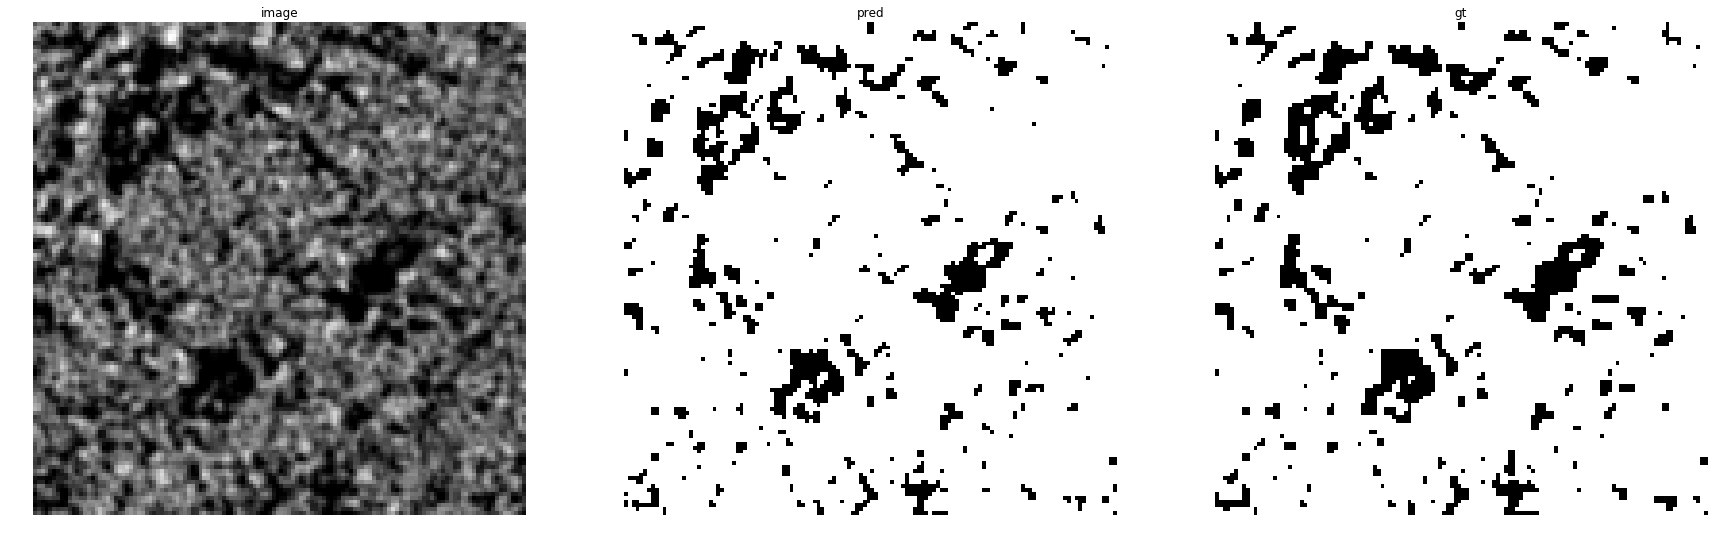

accuracy    : 0.97589111328125
precision   : 0.977420904536408
recall      : 0.9953871959742802
f1          : 0.9863222410748295
pr_auc      : 0.9994323016449309
iou         : 0.9730135956821753


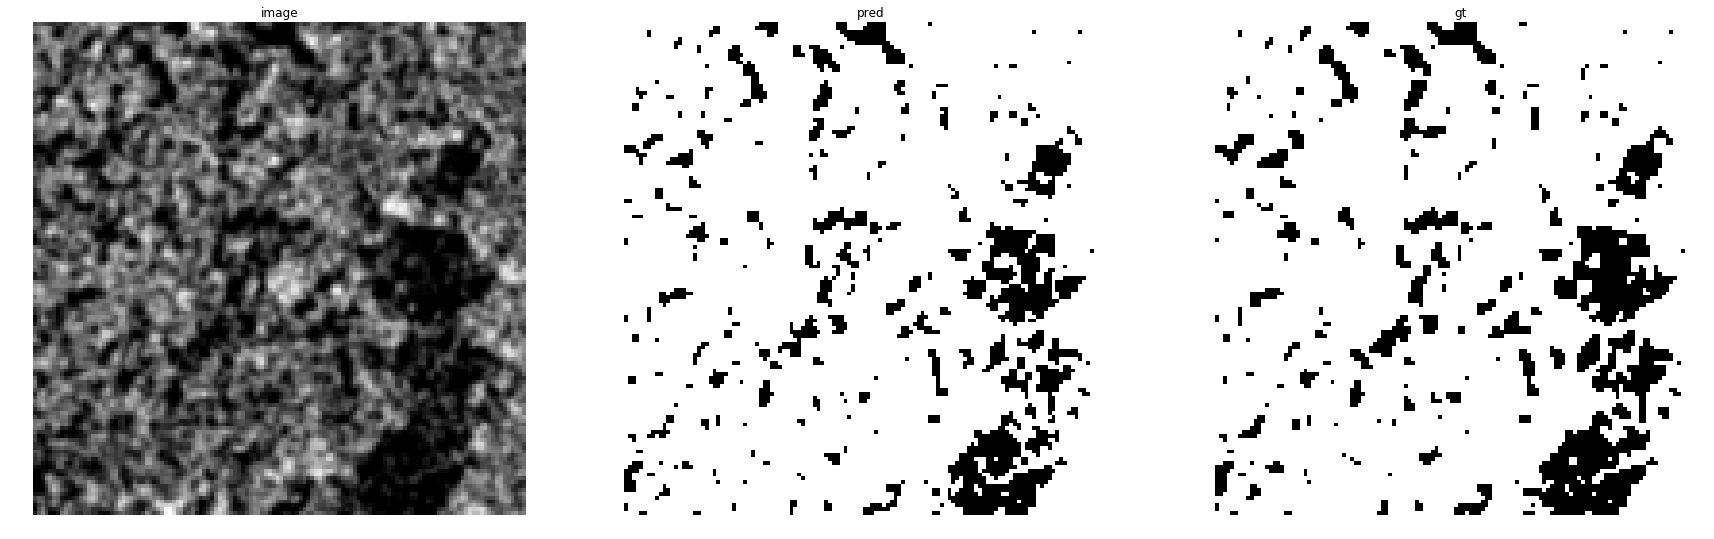

accuracy    : 0.9713134765625
precision   : 0.9704146170063247
recall      : 0.9964641362389955
f1          : 0.9832668755340359
pr_auc      : 0.9993085206631955
iou         : 0.9670845297289726


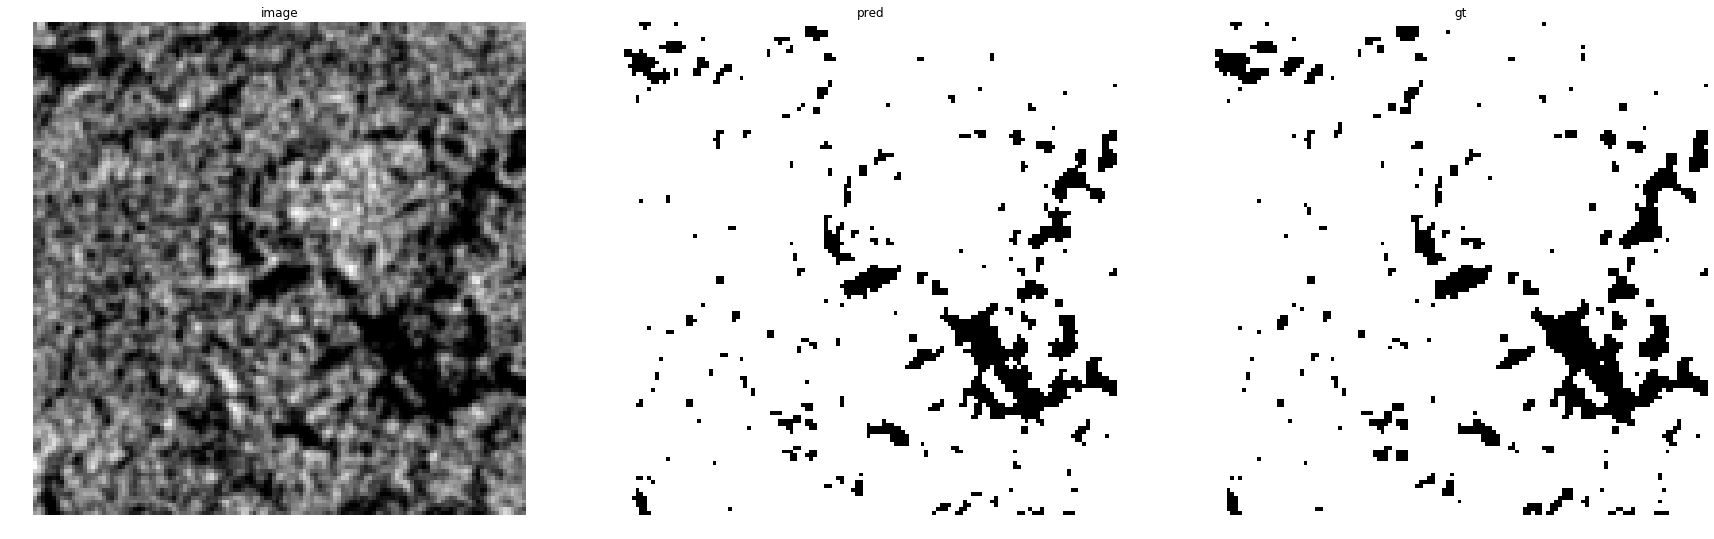

accuracy    : 0.982666015625
precision   : 0.9835385438972163
recall      : 0.9974212812160695
f1          : 0.9904312668463613
pr_auc      : 0.9997001964586139
iou         : 0.9810439193699105


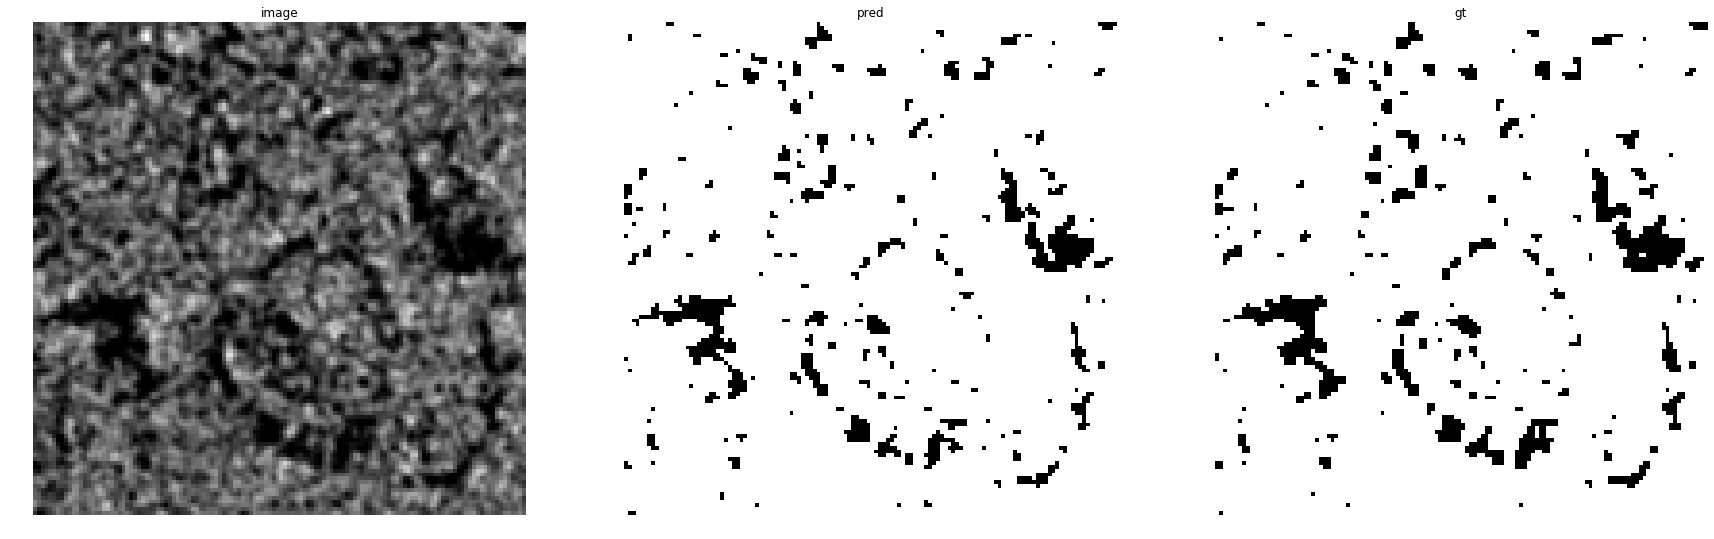

accuracy    : 0.9830322265625
precision   : 0.9839973658215344
recall      : 0.9976630833945382
f1          : 0.9907831045686626
pr_auc      : 0.9997274393169449
iou         : 0.9817345597897503


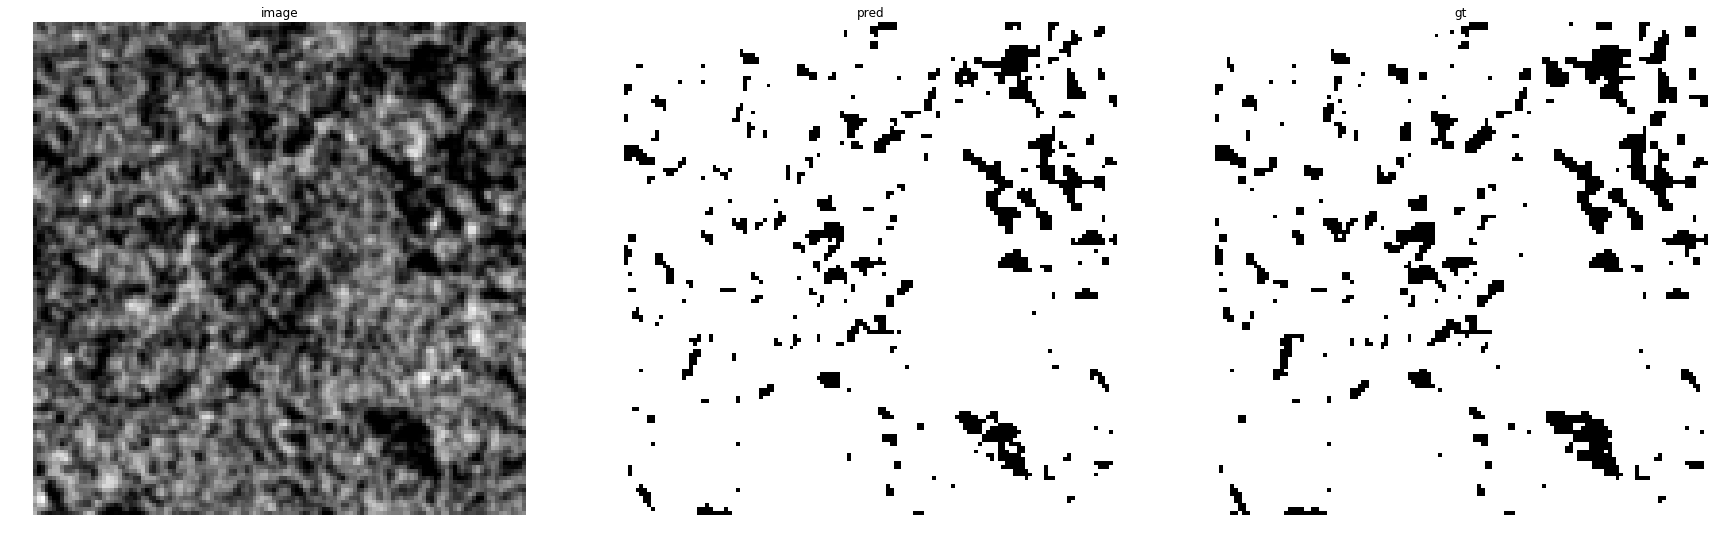

accuracy    : 0.9761962890625
precision   : 0.9763911182450509
recall      : 0.9974719868816616
f1          : 0.9868189806678384
pr_auc      : 0.9995227495844546
iou         : 0.97398091934085


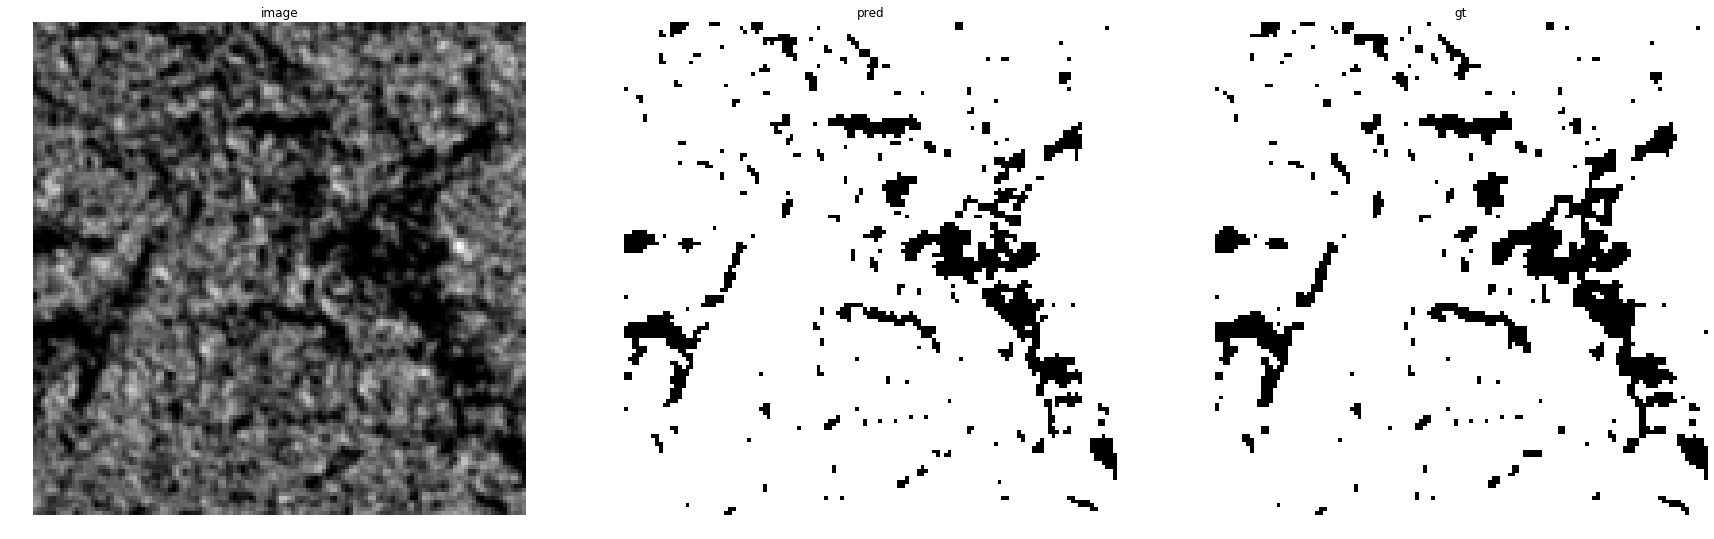

accuracy    : 0.977783203125
precision   : 0.9775754281054635
recall      : 0.9976421636615811
f1          : 0.9875068643602417
pr_auc      : 0.9995900611037978
iou         : 0.9753220338983051


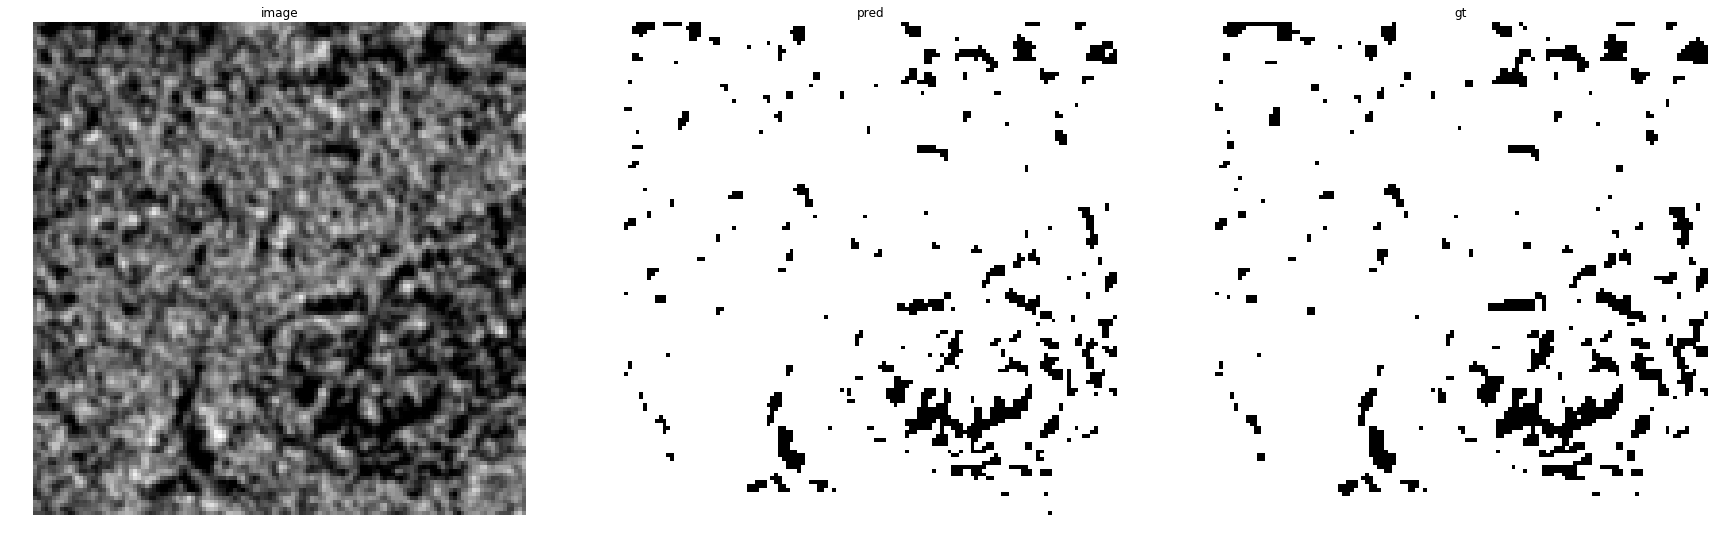

accuracy    : 0.982421875
precision   : 0.9823463539951255
recall      : 0.9986606843902766
f1          : 0.990436341900777
pr_auc      : 0.9997378253494875
iou         : 0.9810538780343399


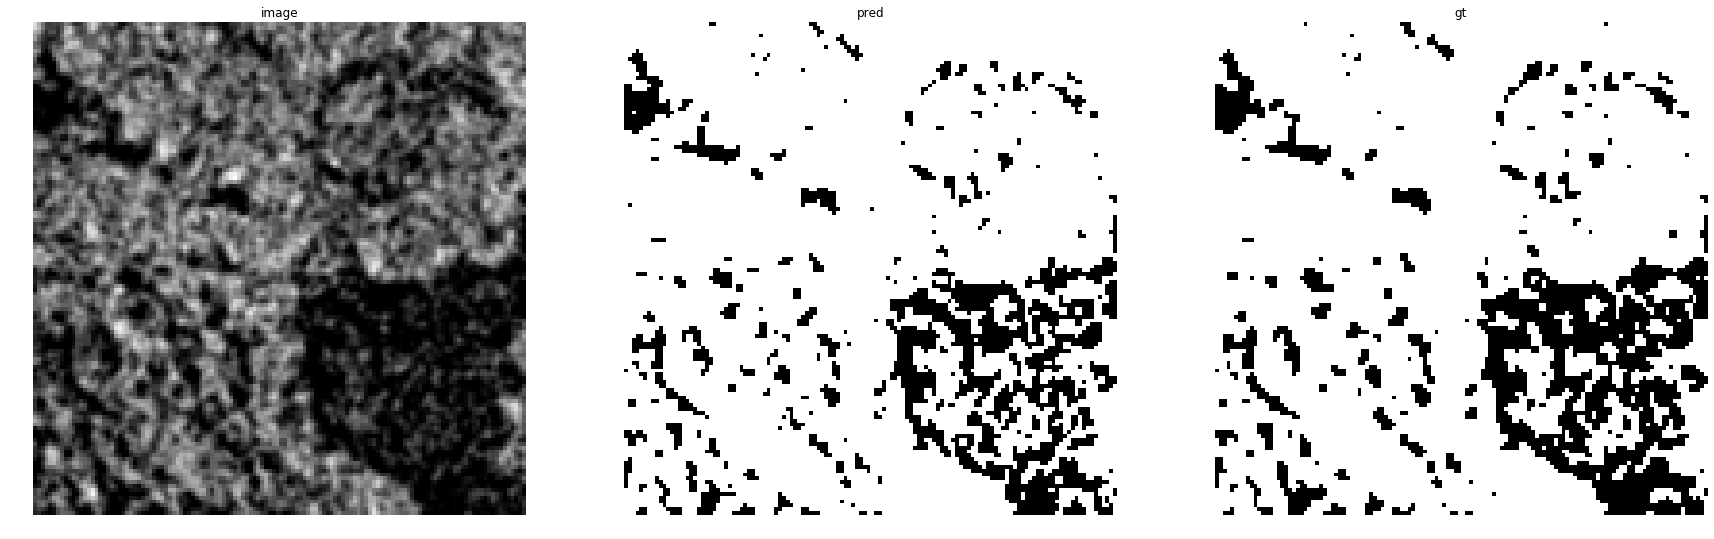

accuracy    : 0.96282958984375
precision   : 0.9591672753834916
recall      : 0.996206661103103
f1          : 0.9773361616612705
pr_auc      : 0.9989534482033864
iou         : 0.9556768558951965


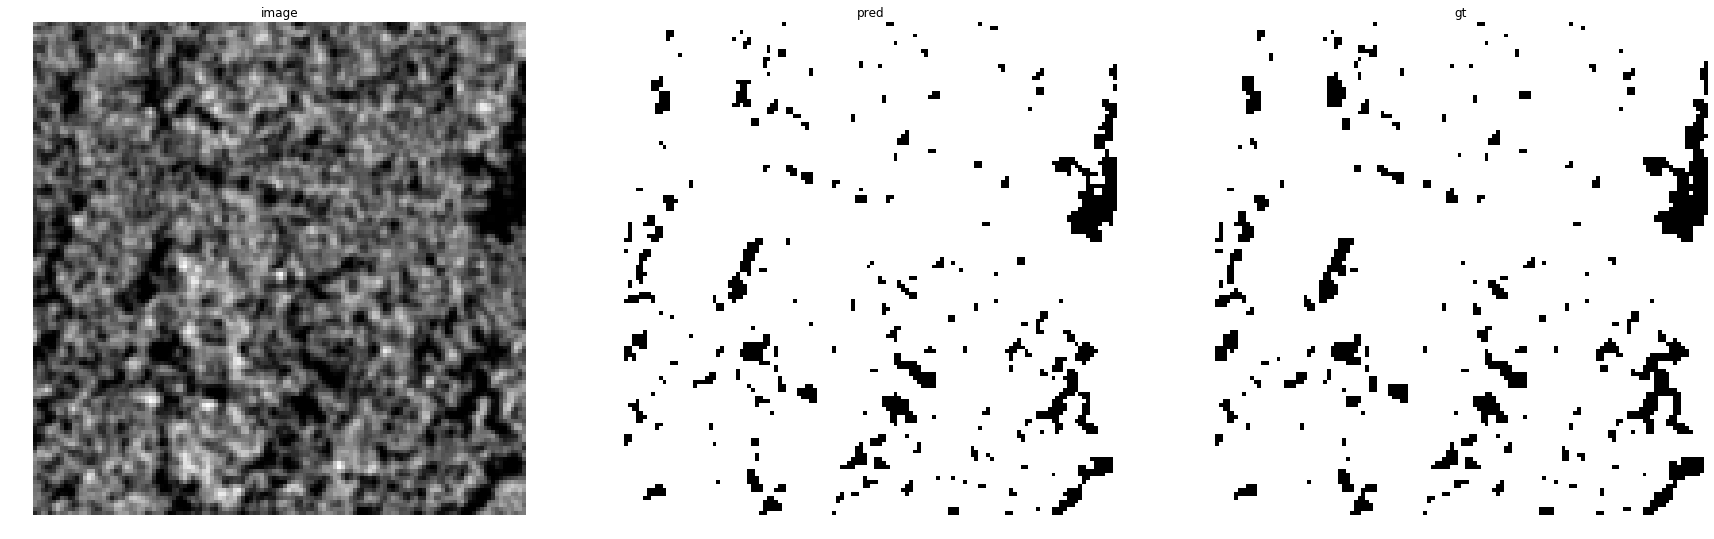

accuracy    : 0.9840087890625
precision   : 0.9853261947253619
recall      : 0.9973238777012109
f1          : 0.9912887352041494
pr_auc      : 0.9997390249699646
iou         : 0.9827279319665106


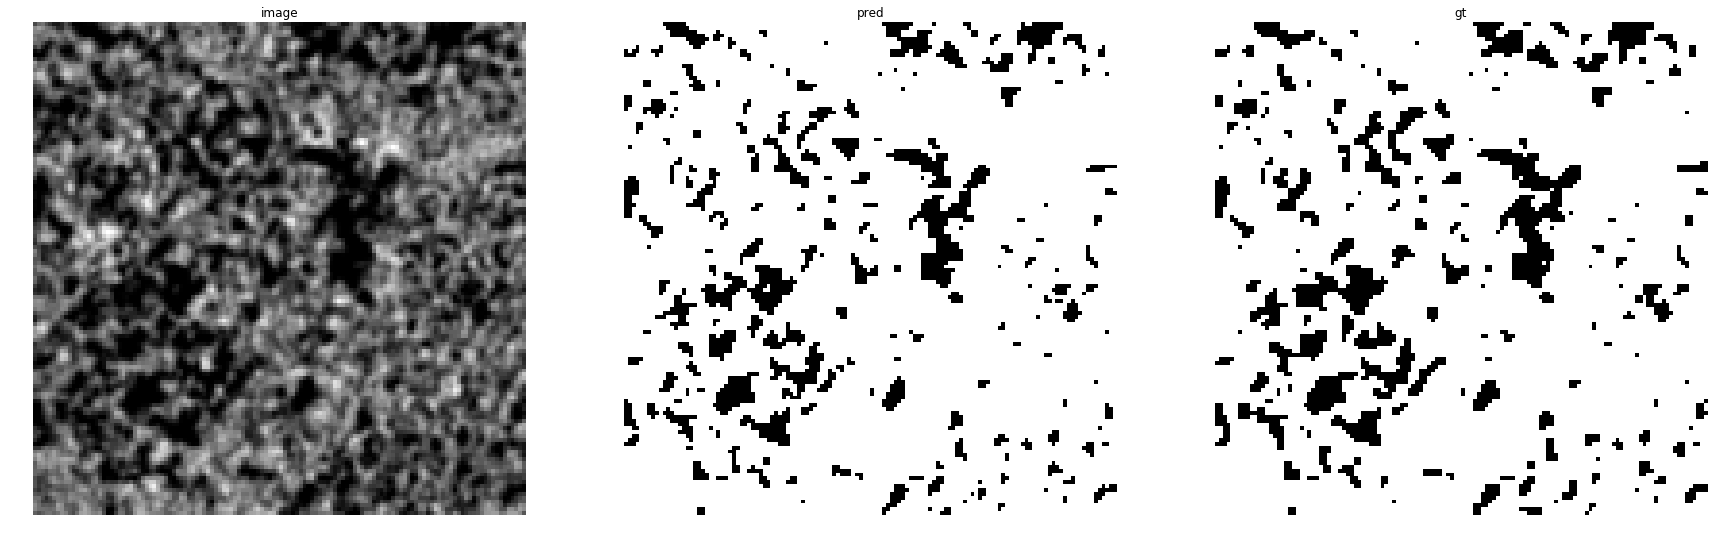

accuracy    : 0.9730224609375
precision   : 0.9723369983892429
recall      : 0.9966262292728447
f1          : 0.9843317972350231
pr_auc      : 0.9992920966218499
iou         : 0.969147005444646


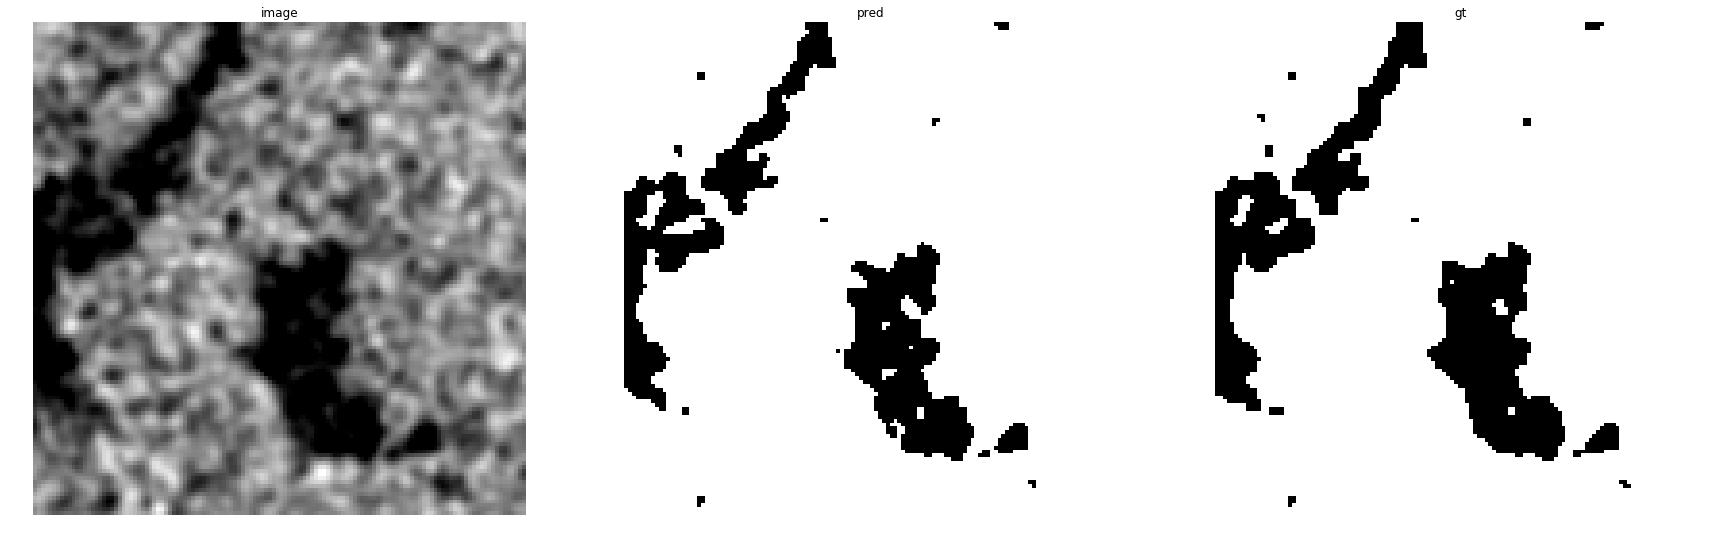

accuracy    : 0.98614501953125
precision   : 0.9844112070781547
recall      : 0.9996434683399886
f1          : 0.9919688660888025
pr_auc      : 0.9999108043914007
iou         : 0.9840657026533763


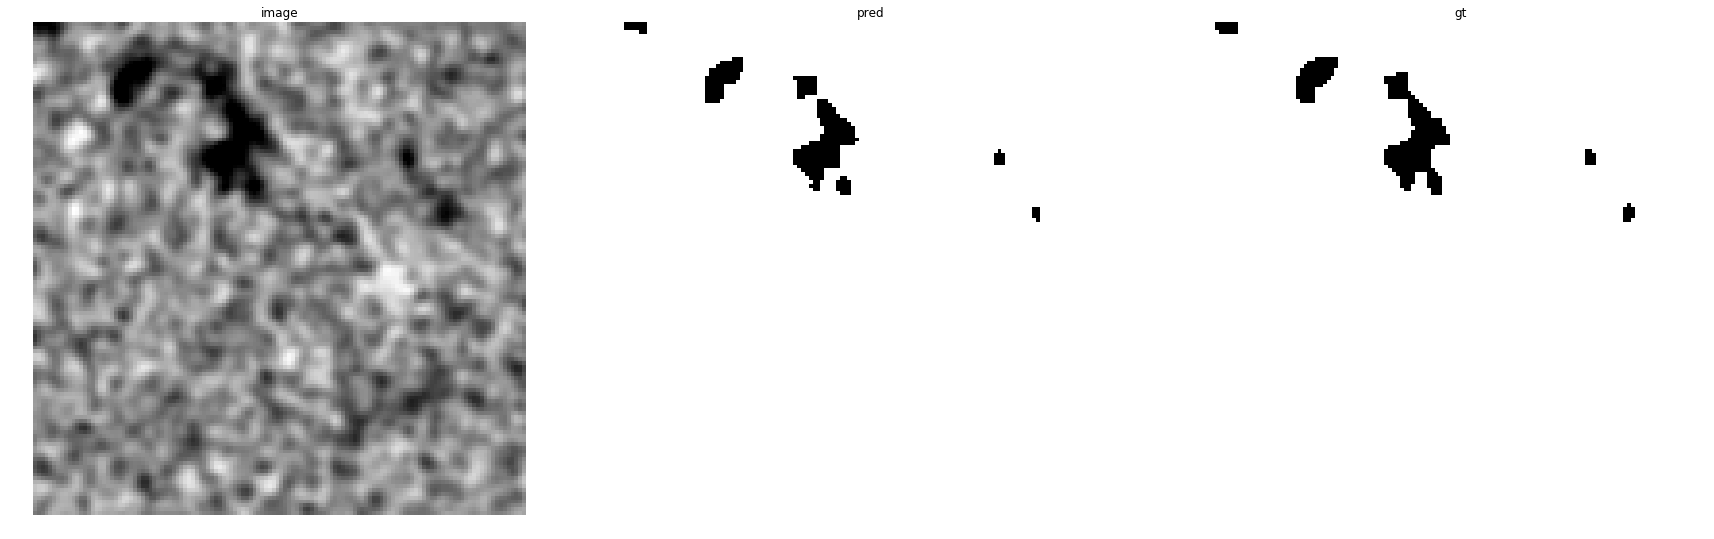

accuracy    : 0.996826171875
precision   : 0.9968862872088678
recall      : 0.9998750780762024
f1          : 0.9983784458026692
pr_auc      : 0.9999955195097247
iou         : 0.9967621419676215


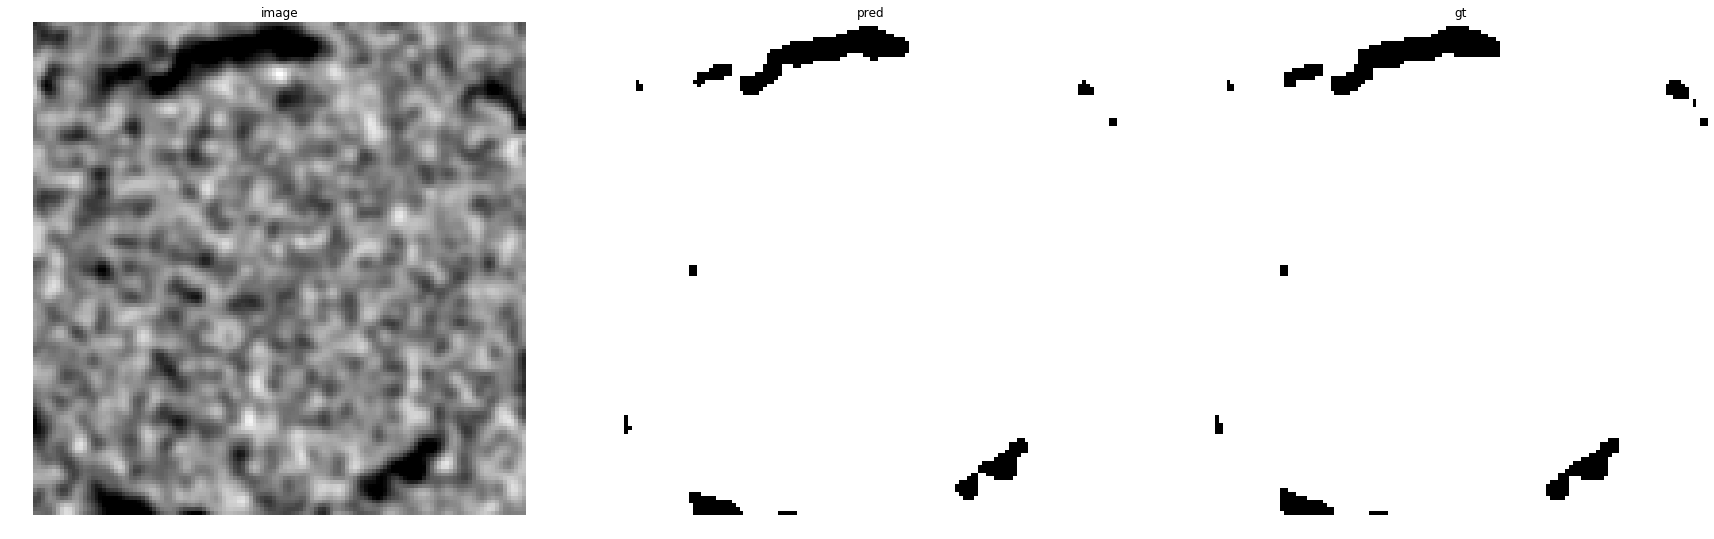

accuracy    : 0.99658203125
precision   : 0.9966628888049364
recall      : 0.999810510358767
f1          : 0.9982342183262911
pr_auc      : 0.9999937539129546
iou         : 0.996474661630469


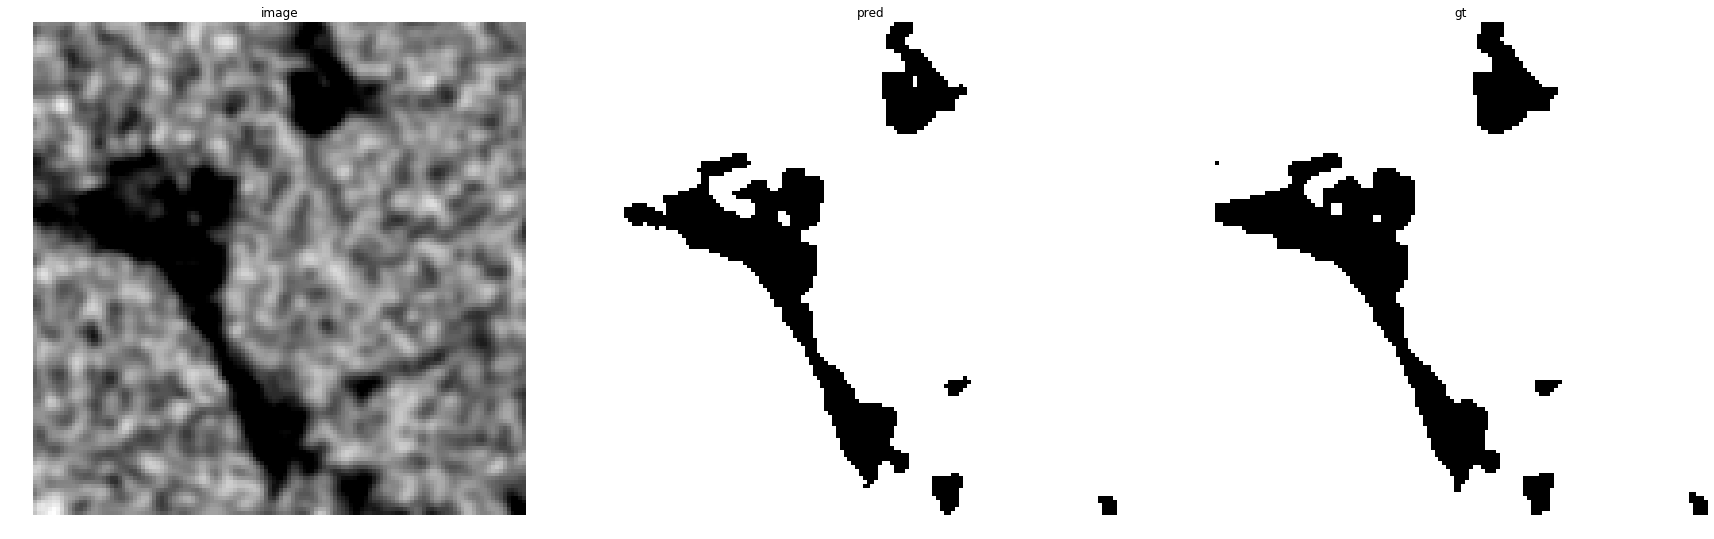

accuracy    : 0.9901123046875
precision   : 0.9894534995206136
recall      : 0.9994465965688988
f1          : 0.9944249432170142
pr_auc      : 0.9999295553158818
iou         : 0.988911704312115


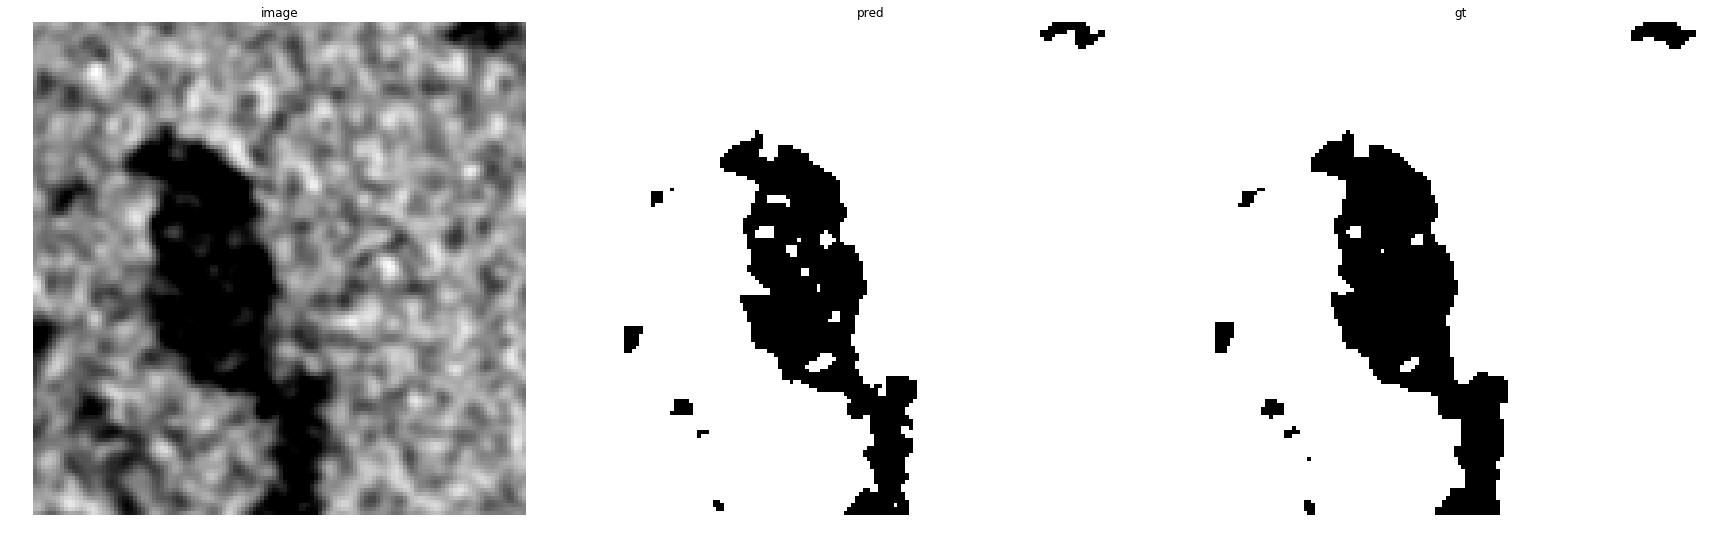

accuracy    : 0.98846435546875
precision   : 0.9869740874895514
recall      : 0.9998588666995978
f1          : 0.9933746976548533
pr_auc      : 0.9999433004393989
iou         : 0.986836606769745


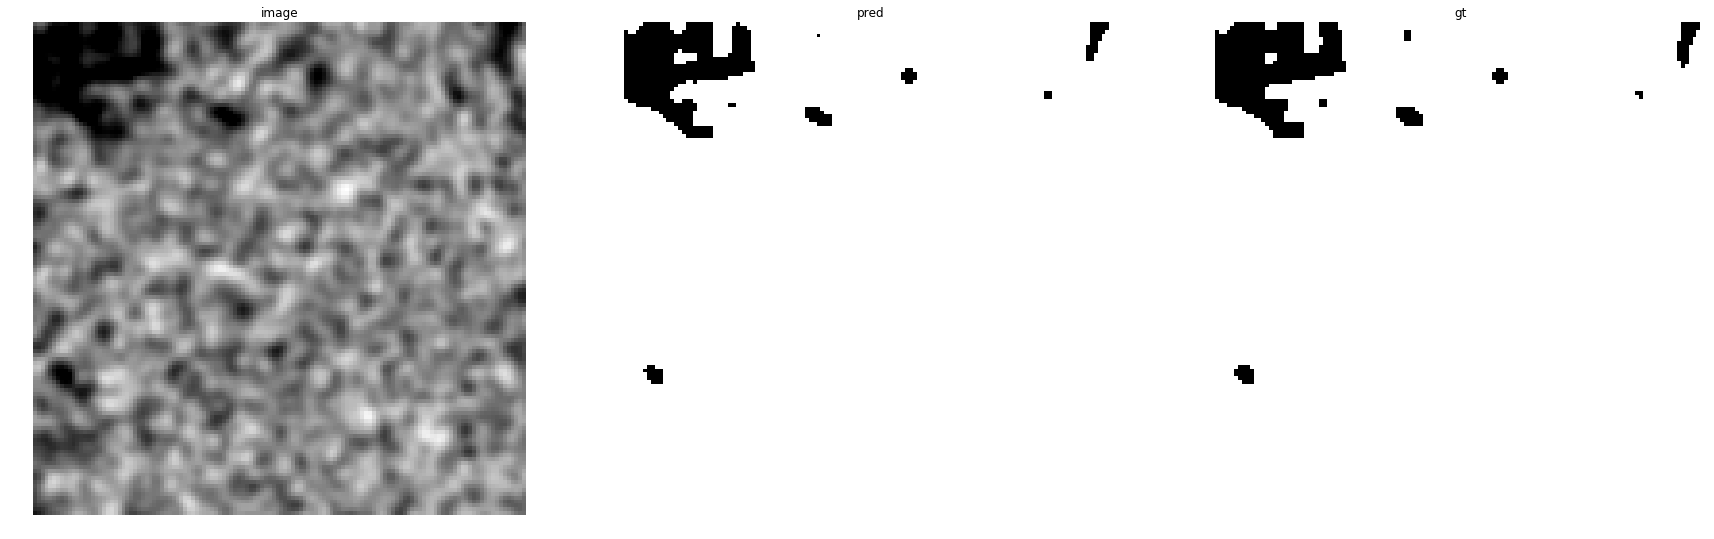

accuracy    : 0.99615478515625
precision   : 0.9961834488900198
recall      : 0.9998084780388151
f1          : 0.9979926716584355
pr_auc      : 0.9999923683845661
iou         : 0.9959933859068939


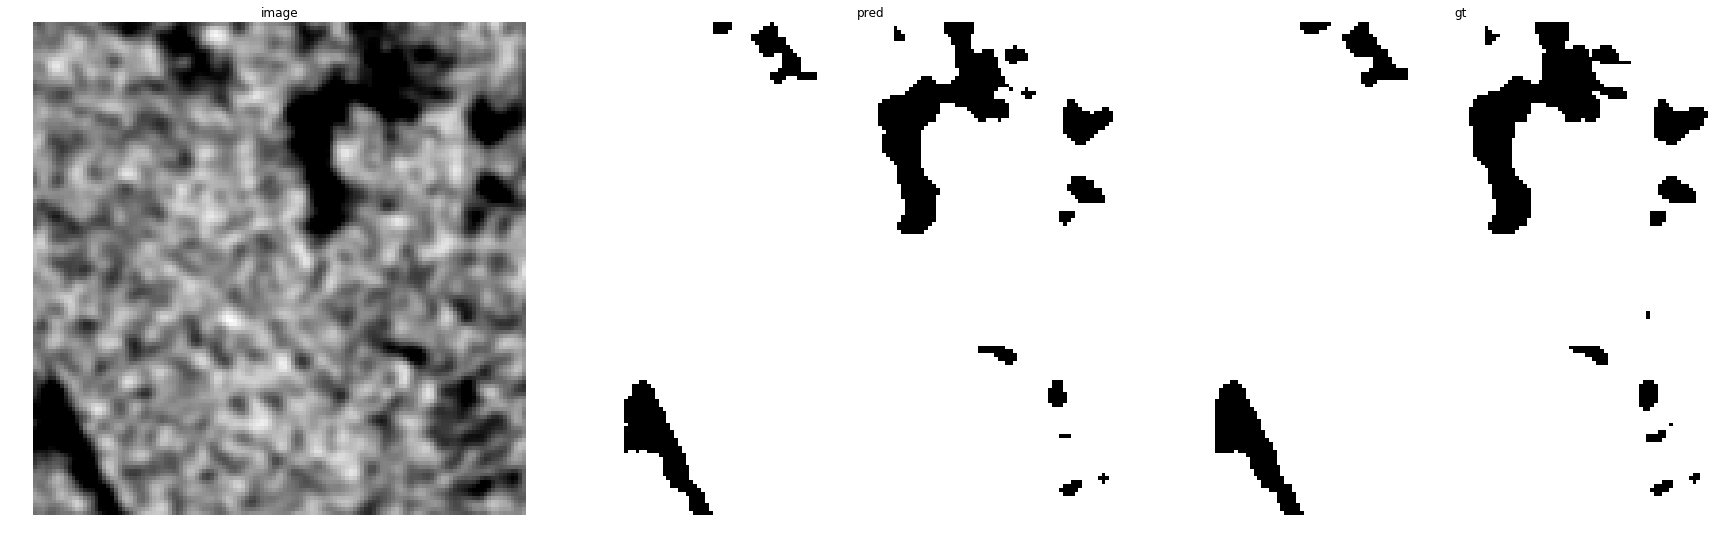

accuracy    : 0.9893798828125
precision   : 0.9889014421479365
recall      : 0.9995297910928999
f1          : 0.9941872118661055
pr_auc      : 0.9999290907308354
iou         : 0.9884416102032683


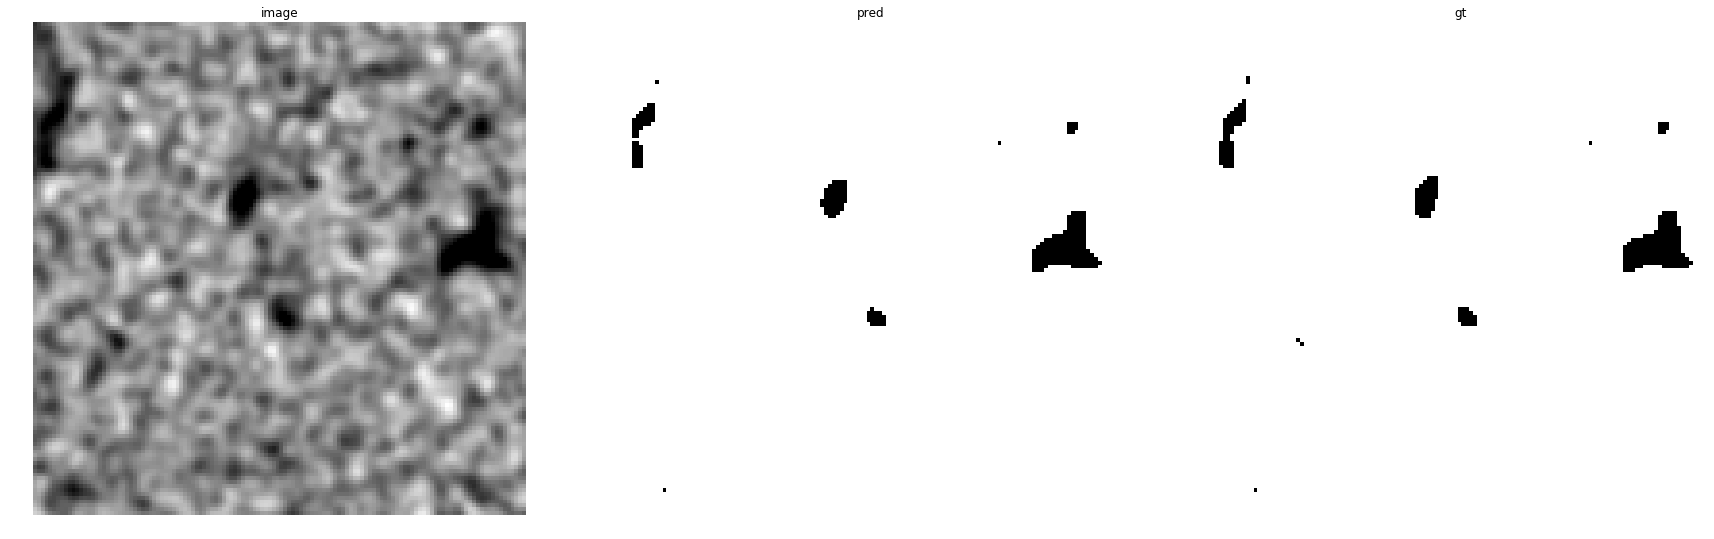

accuracy    : 0.99798583984375
precision   : 0.9981361829025845
recall      : 0.9998133051216628
f1          : 0.9989740401057049
pr_auc      : 0.9999959465752117
iou         : 0.9979501832411951


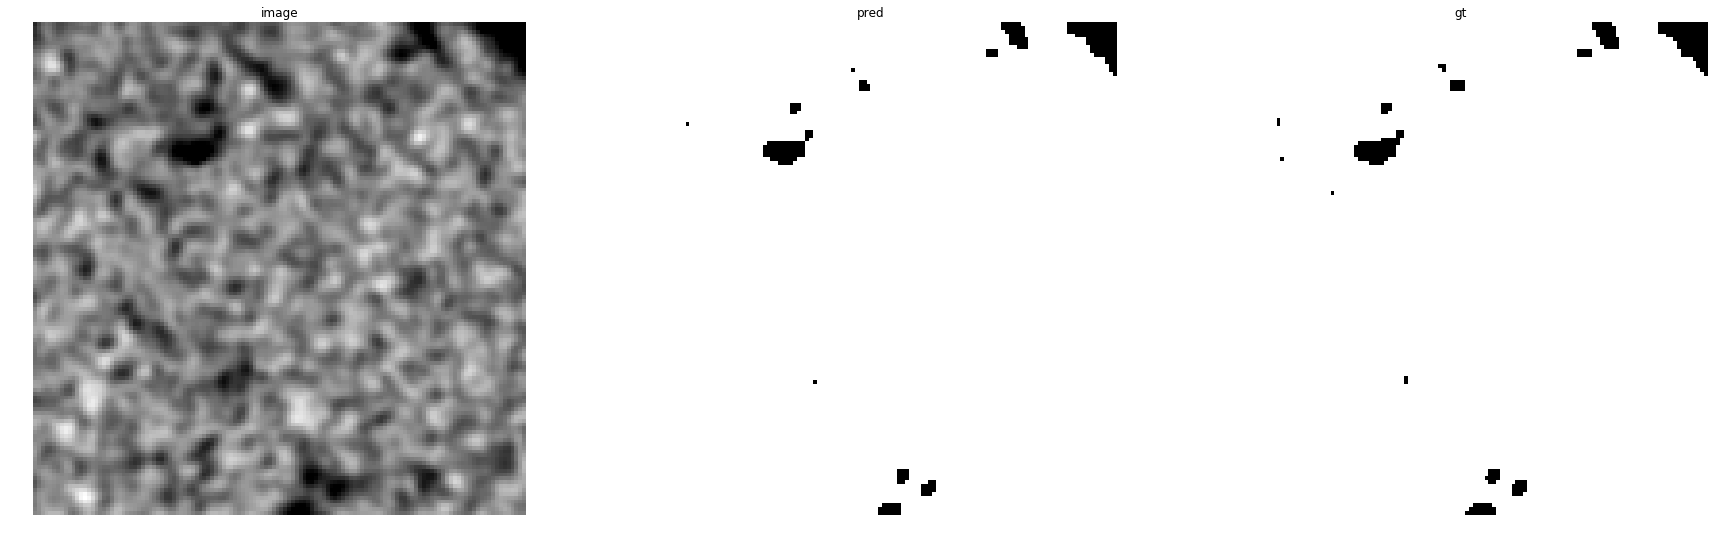

accuracy    : 0.9981689453125
precision   : 0.9981399962799926
recall      : 1.0
f1          : 0.9990691324314261
pr_auc      : 0.9999979342115155
iou         : 0.9981399962799926


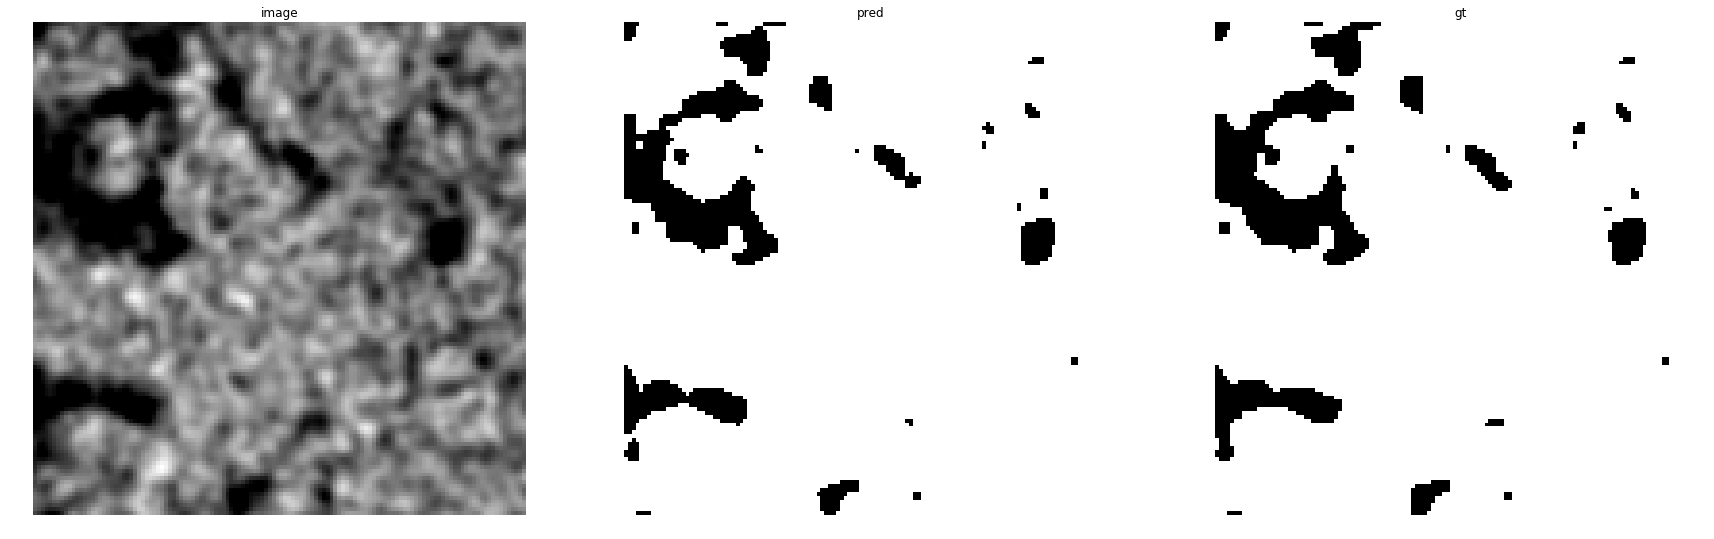

accuracy    : 0.9896240234375
precision   : 0.9890750670241287
recall      : 0.999525873746952
f1          : 0.9942730090284329
pr_auc      : 0.9999130985681887
iou         : 0.9886112413746901


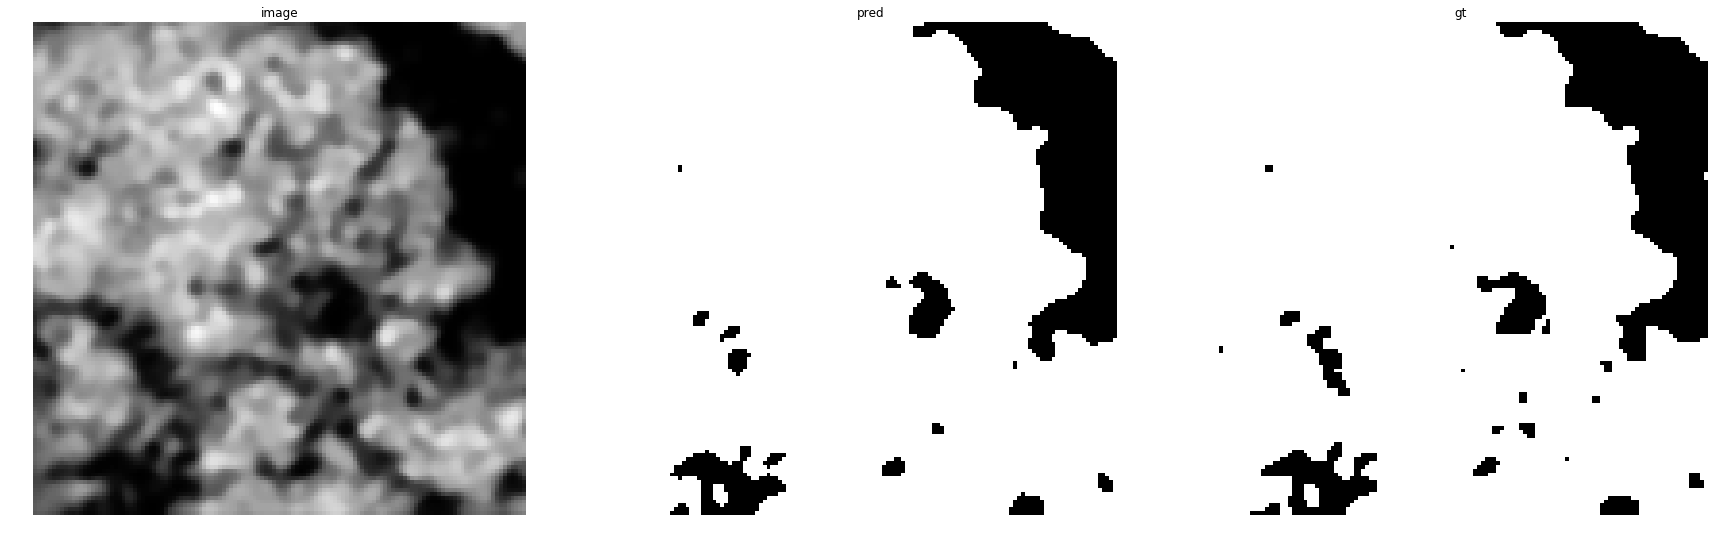

accuracy    : 0.98699951171875
precision   : 0.9885775862068965
recall      : 0.9960912052117263
f1          : 0.9923201730665224
pr_auc      : 0.9998076711753765
iou         : 0.98475740661228


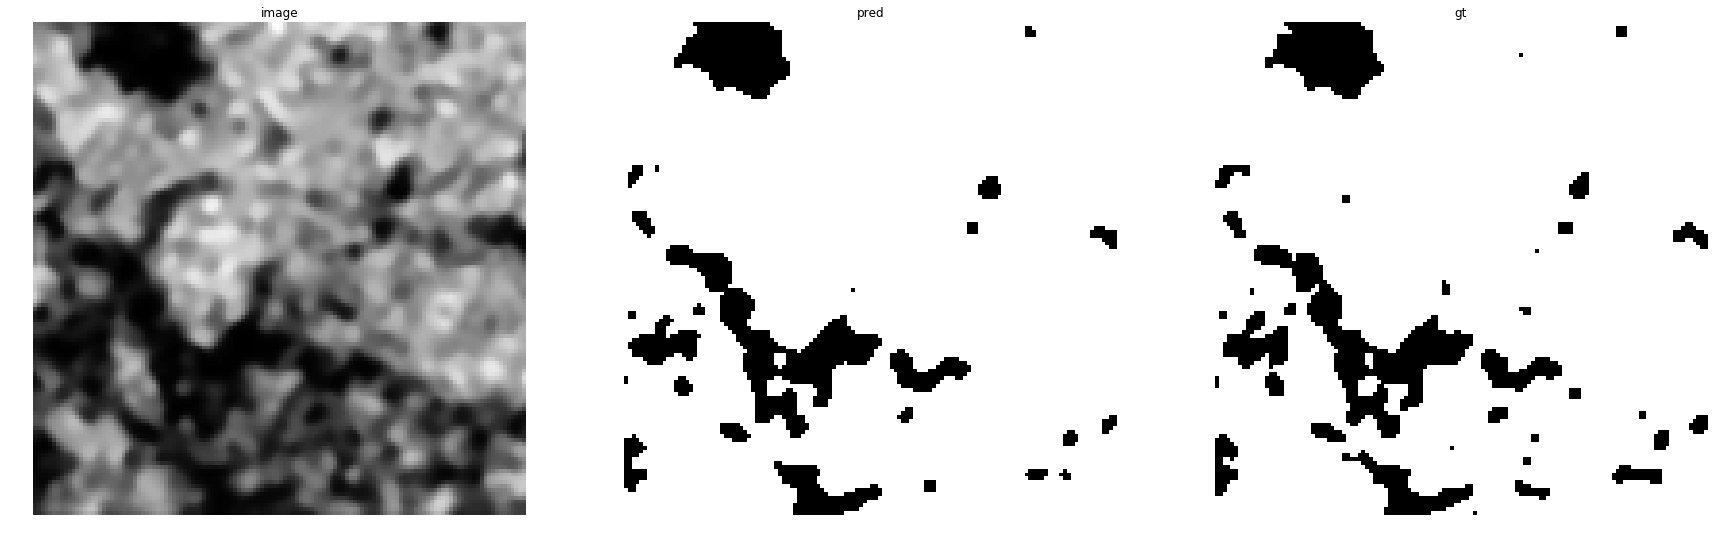

accuracy    : 0.9813232421875
precision   : 0.983407917383821
recall      : 0.9954700676005297
f1          : 0.989402230380273
pr_auc      : 0.9995542315666146
iou         : 0.9790267306374228


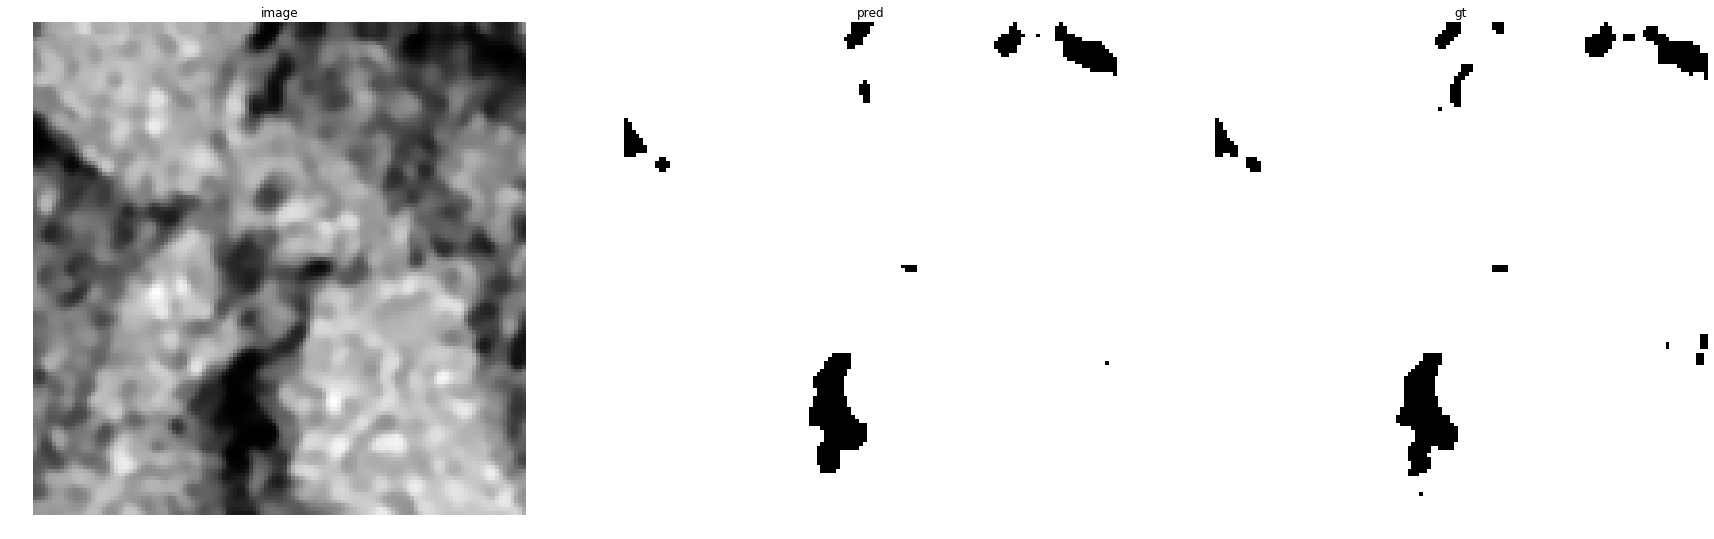

accuracy    : 0.99395751953125
precision   : 0.9950847564433801
recall      : 0.9986718947634707
f1          : 0.996875098639563
pr_auc      : 0.9999687405549675
iou         : 0.9937696664568911


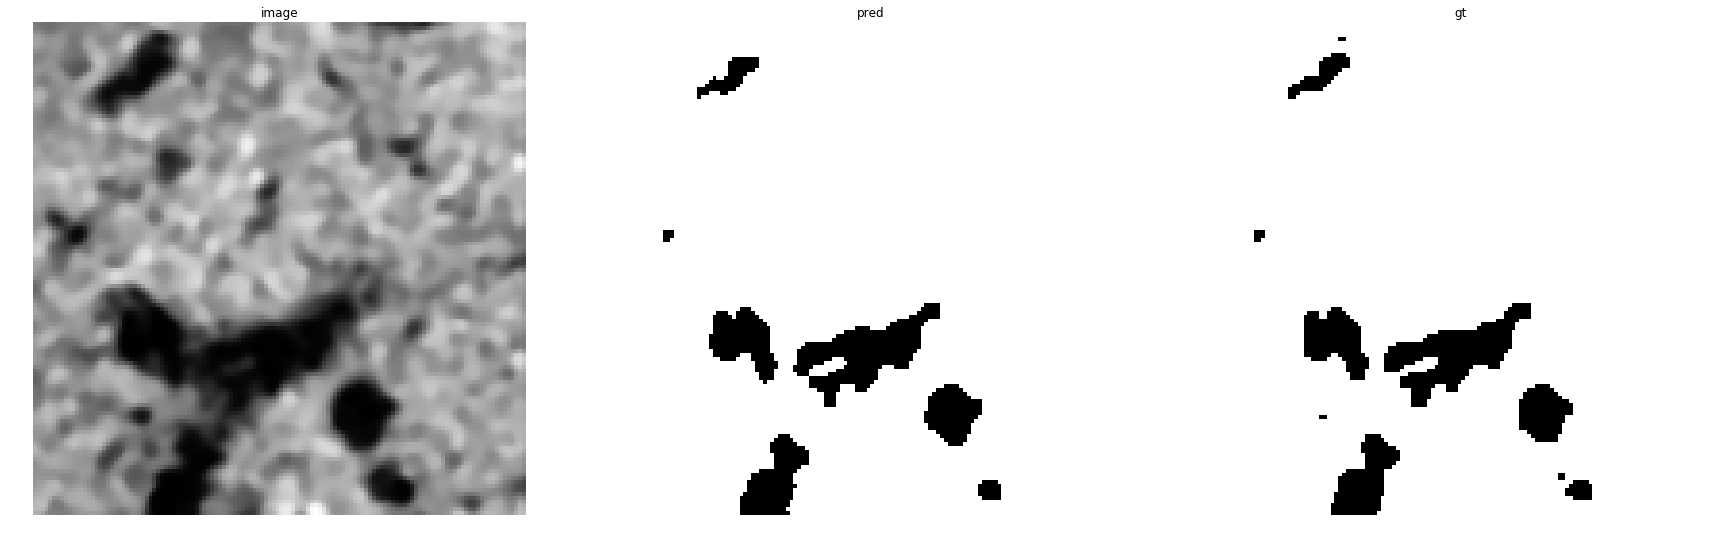

accuracy    : 0.99462890625
precision   : 0.9972514887769125
recall      : 0.9969905135754007
f1          : 0.9971209840999803
pr_auc      : 0.9999707100692481
iou         : 0.994258498075292


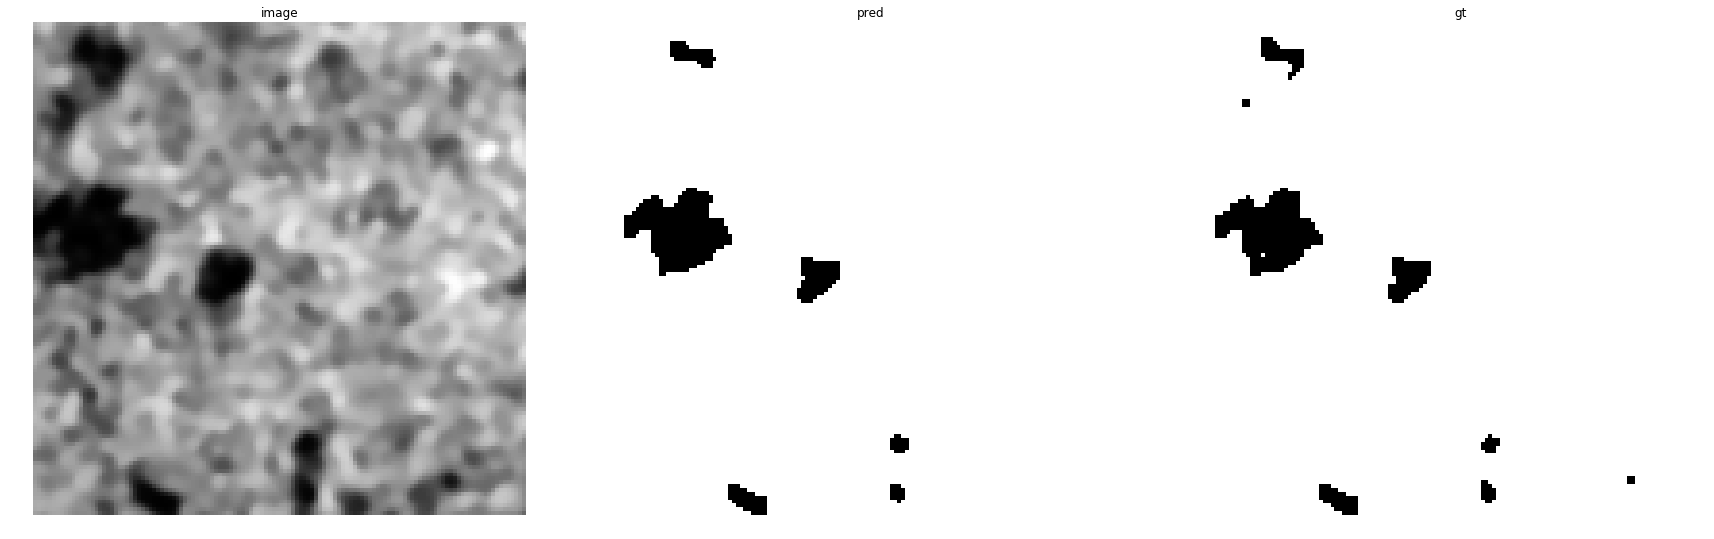

accuracy    : 0.9974365234375
precision   : 0.9986056534415009
recall      : 0.9987322515212982
f1          : 0.9986689484692908
pr_auc      : 0.9999852514965805
iou         : 0.9973414356247626


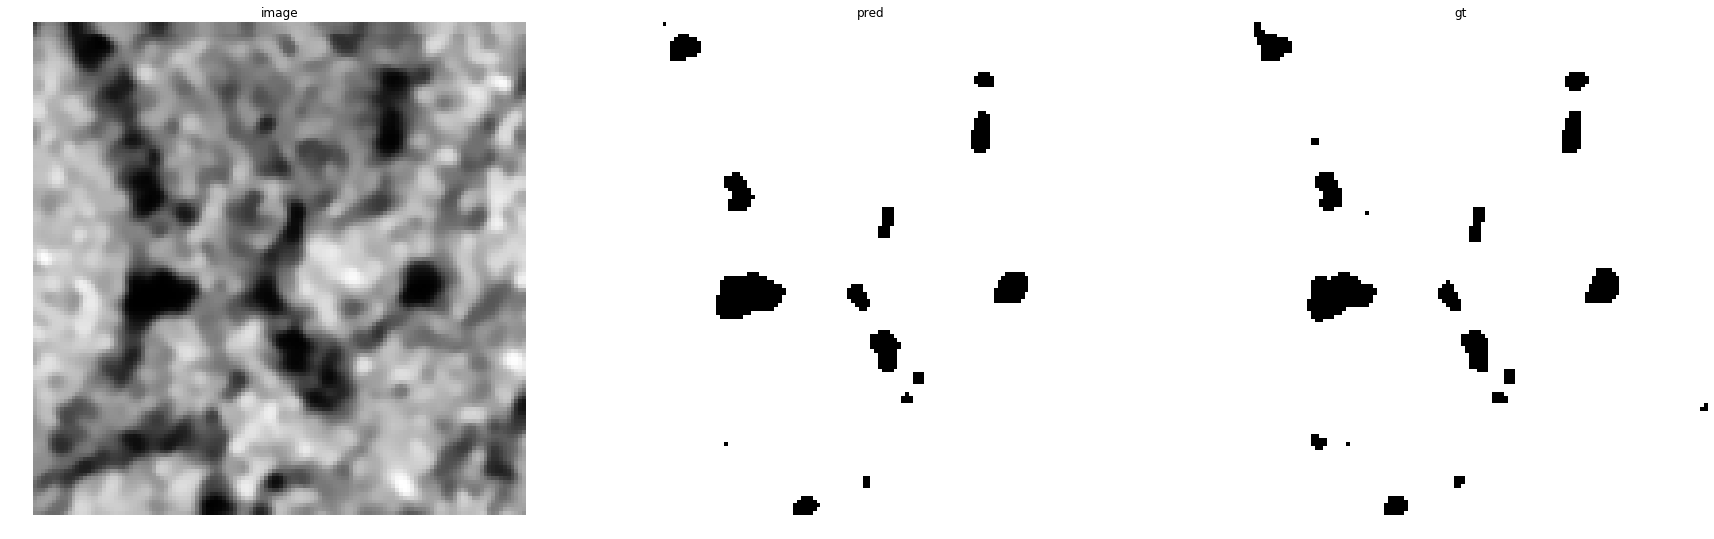

accuracy    : 0.9945068359375
precision   : 0.9957081545064378
recall      : 0.99860741866059
f1          : 0.9971556791606093
pr_auc      : 0.9999617906821242
iou         : 0.9943274927517963


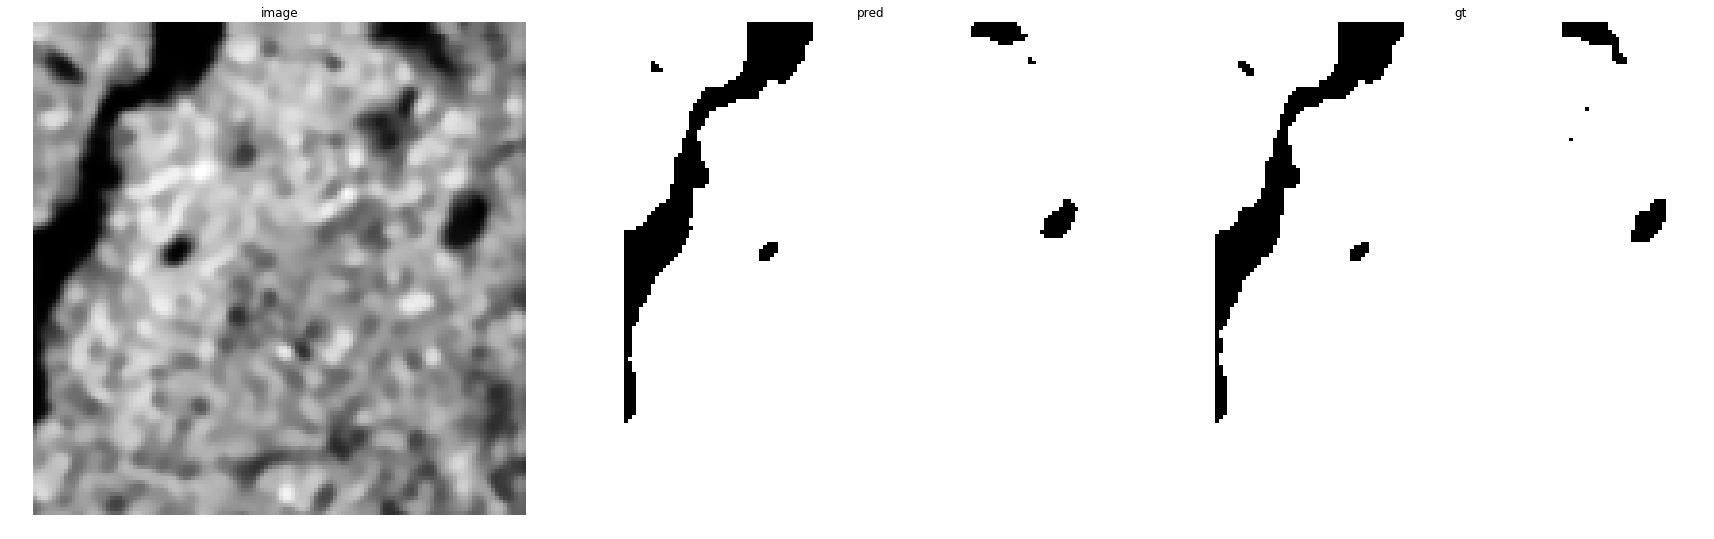

accuracy    : 0.99530029296875
precision   : 0.9975953727172289
recall      : 0.9974009096816114
f1          : 0.9974981317217403
pr_auc      : 0.9999781800228833
iou         : 0.9950087508912945


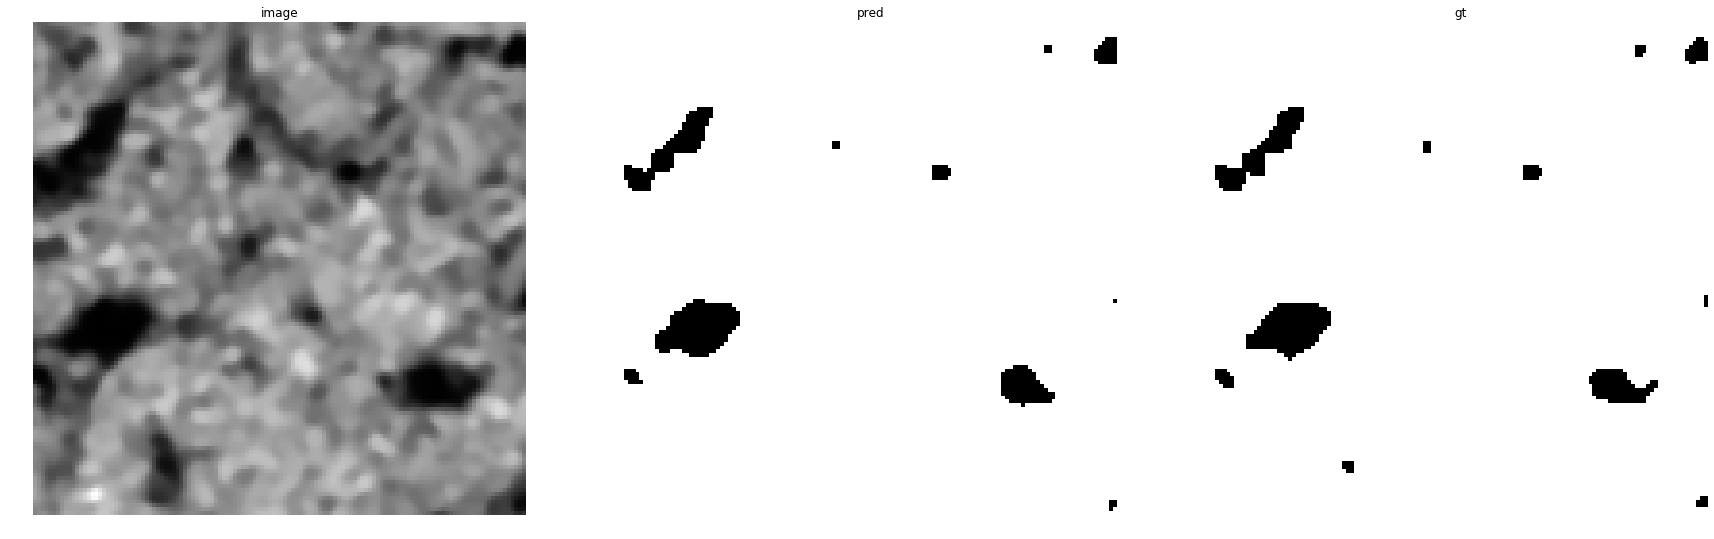

accuracy    : 0.99493408203125
precision   : 0.9969647148096623
recall      : 0.9977849503196
f1          : 0.9973746639253518
pr_auc      : 0.9999751134454691
iou         : 0.9947630765347971


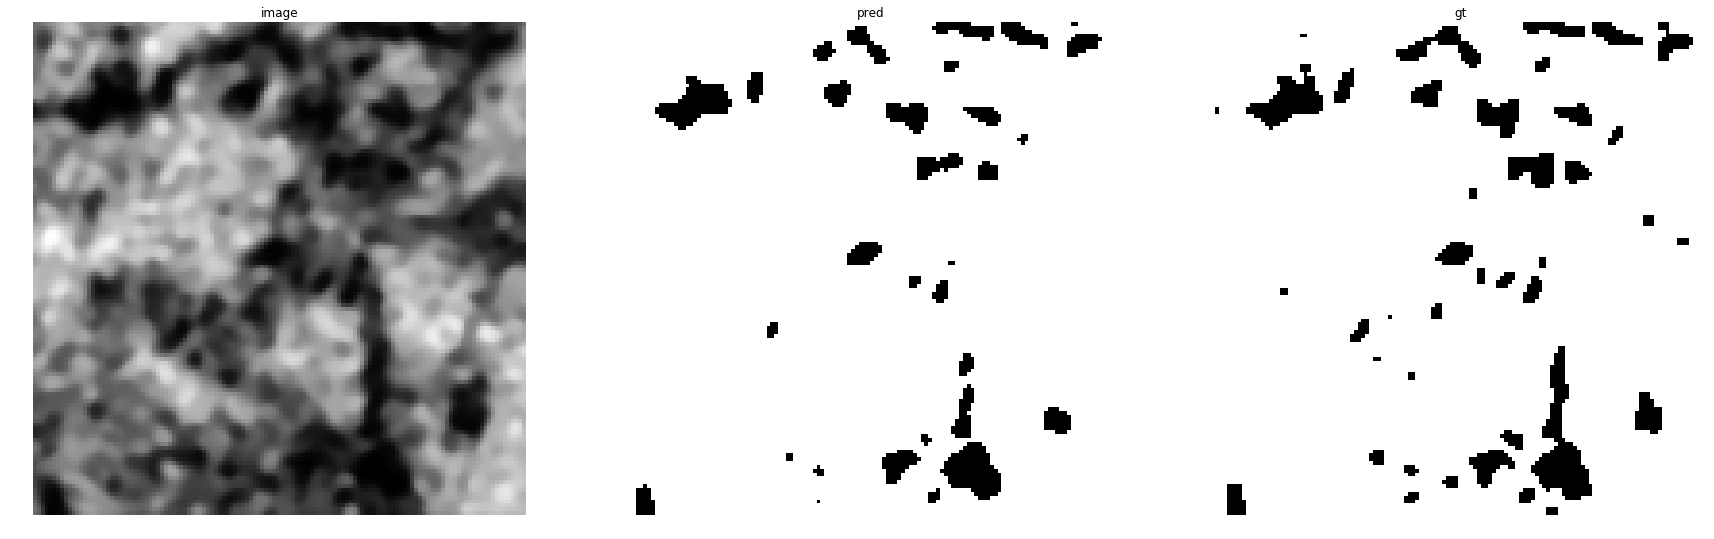

accuracy    : 0.97772216796875
precision   : 0.9779009126466753
recall      : 0.9982697810607573
f1          : 0.9879803734316858
pr_auc      : 0.9994975522309251
iou         : 0.9762462579721463


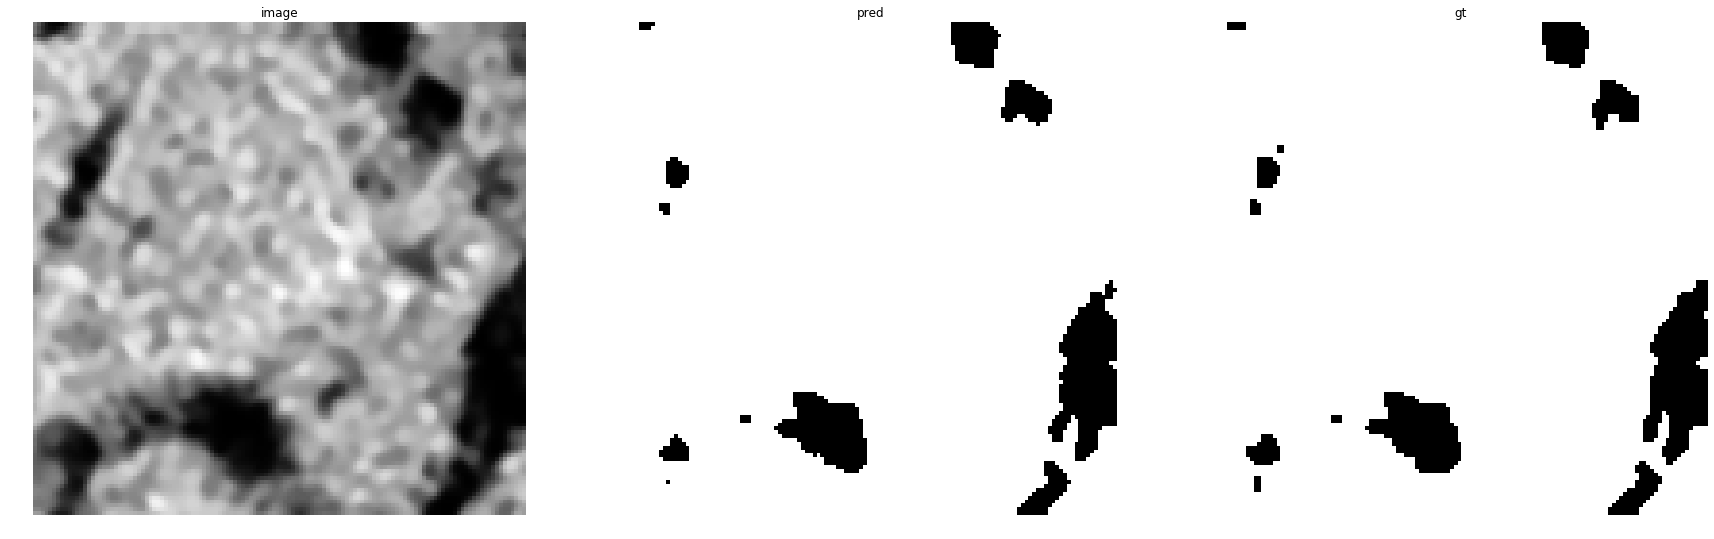

accuracy    : 0.9923095703125
precision   : 0.9940586216002113
recall      : 0.9976149463362926
f1          : 0.9958336088883011
pr_auc      : 0.9999364244661572
iou         : 0.9917017913593256


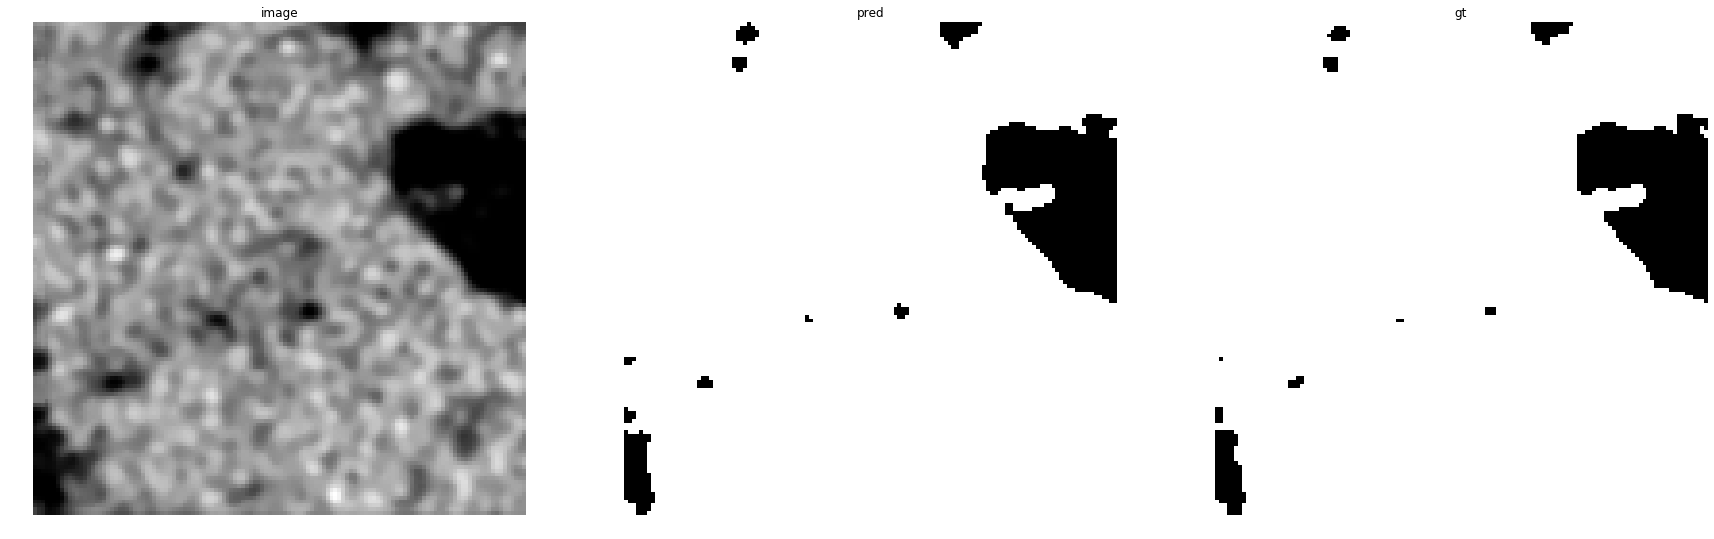

accuracy    : 0.9957275390625
precision   : 0.9988683264545334
recall      : 0.9964802762651083
f1          : 0.9976728723404256
pr_auc      : 0.9999876725970399
iou         : 0.9953565505804312


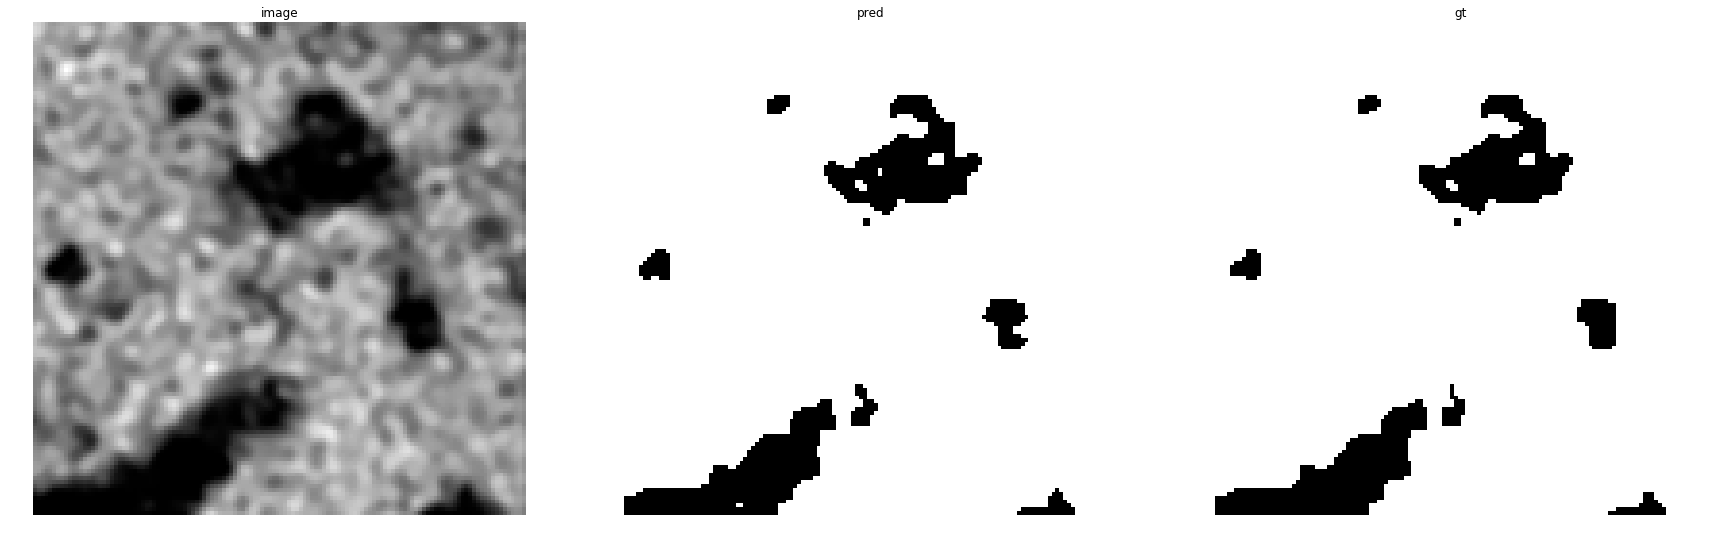

accuracy    : 0.99560546875
precision   : 0.9981143511347566
recall      : 0.9970400269088463
f1          : 0.9975768997778824
pr_auc      : 0.9999787763352014
iou         : 0.9951655139998657


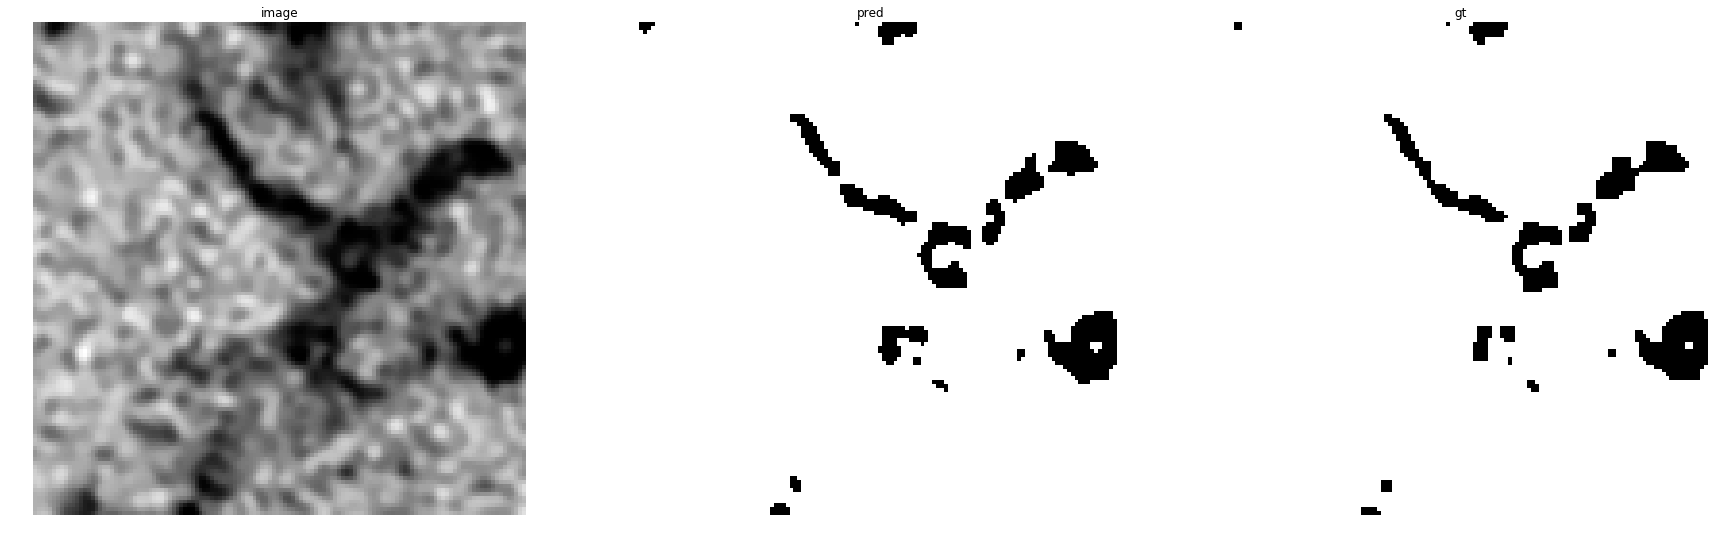

accuracy    : 0.9930419921875
precision   : 0.9973556917123508
recall      : 0.9953015382635
f1          : 0.9963275562141615
pr_auc      : 0.9999611036095106
iou         : 0.9926819874181538


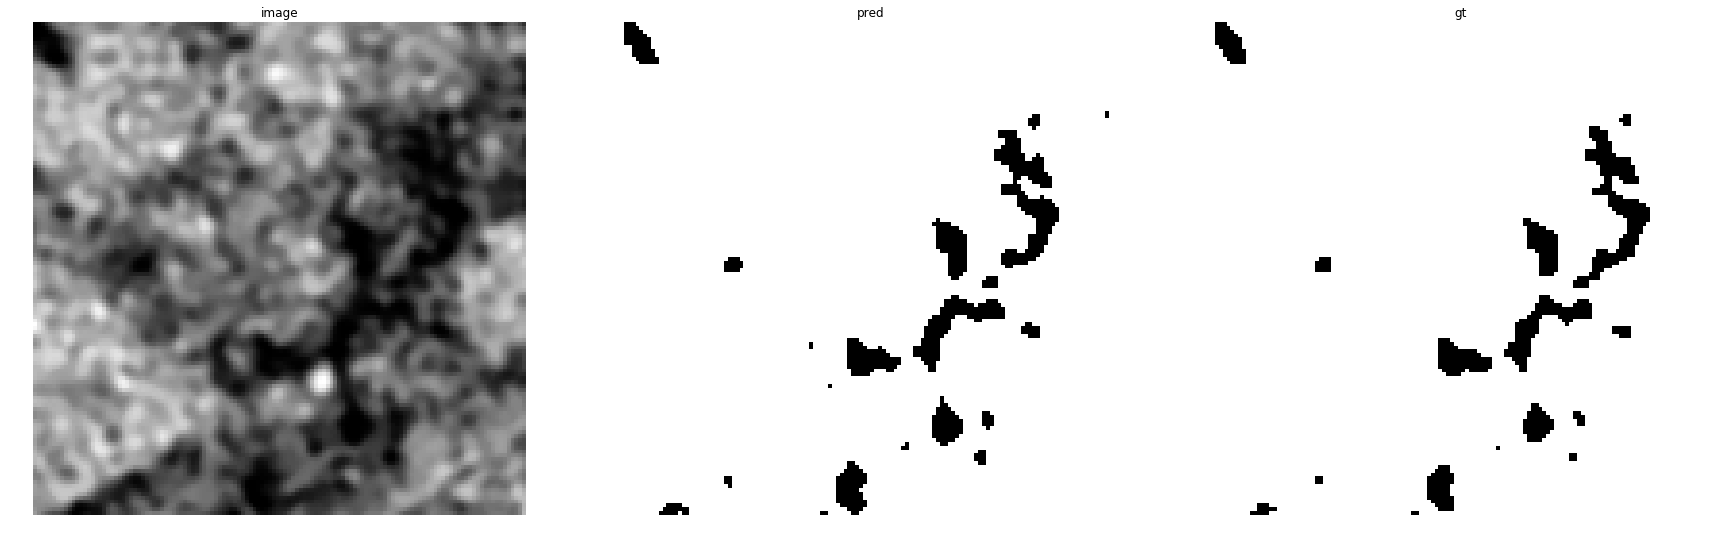

accuracy    : 0.9921875
precision   : 0.9978708303761533
recall      : 0.9938949938949939
f1          : 0.9958789439793947
pr_auc      : 0.9999493331796255
iou         : 0.9917917147620879


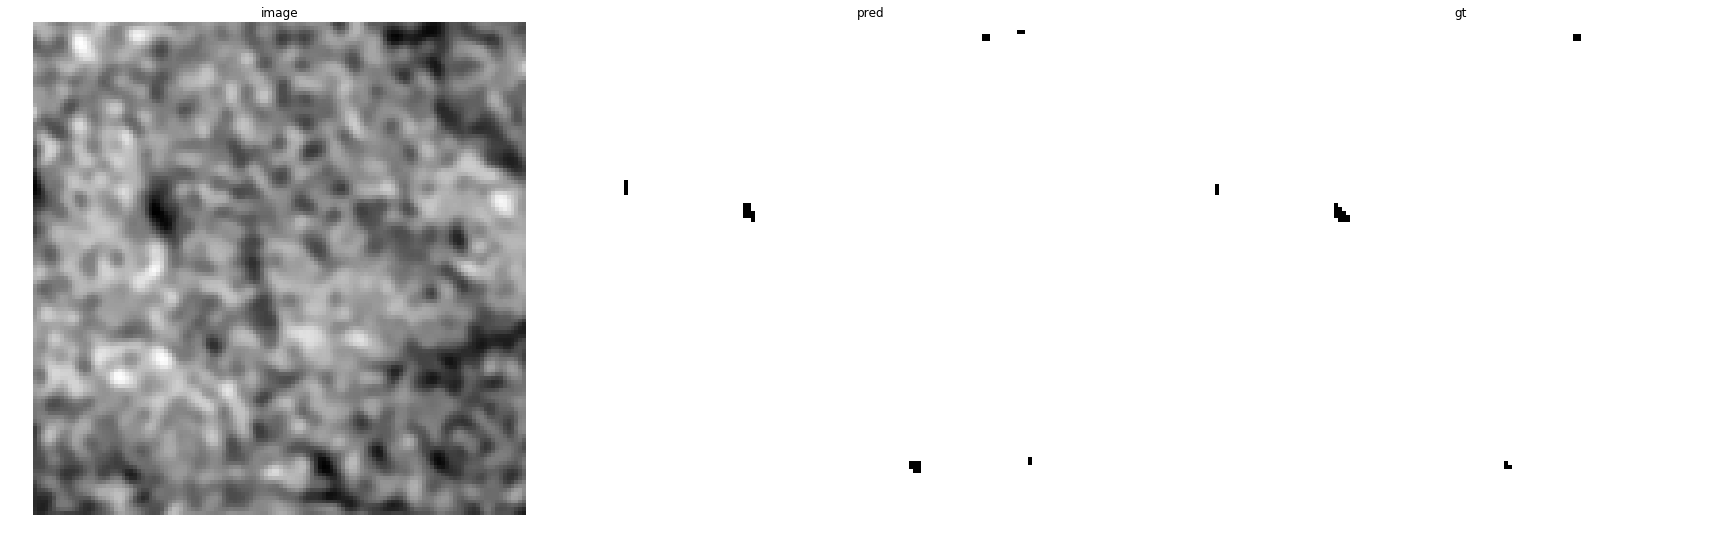

accuracy    : 0.9991455078125
precision   : 0.9998165474224913
recall      : 0.9993276694578571
f1          : 0.9995720486641805
pr_auc      : 0.999999656164164
iou         : 0.9991444634563676


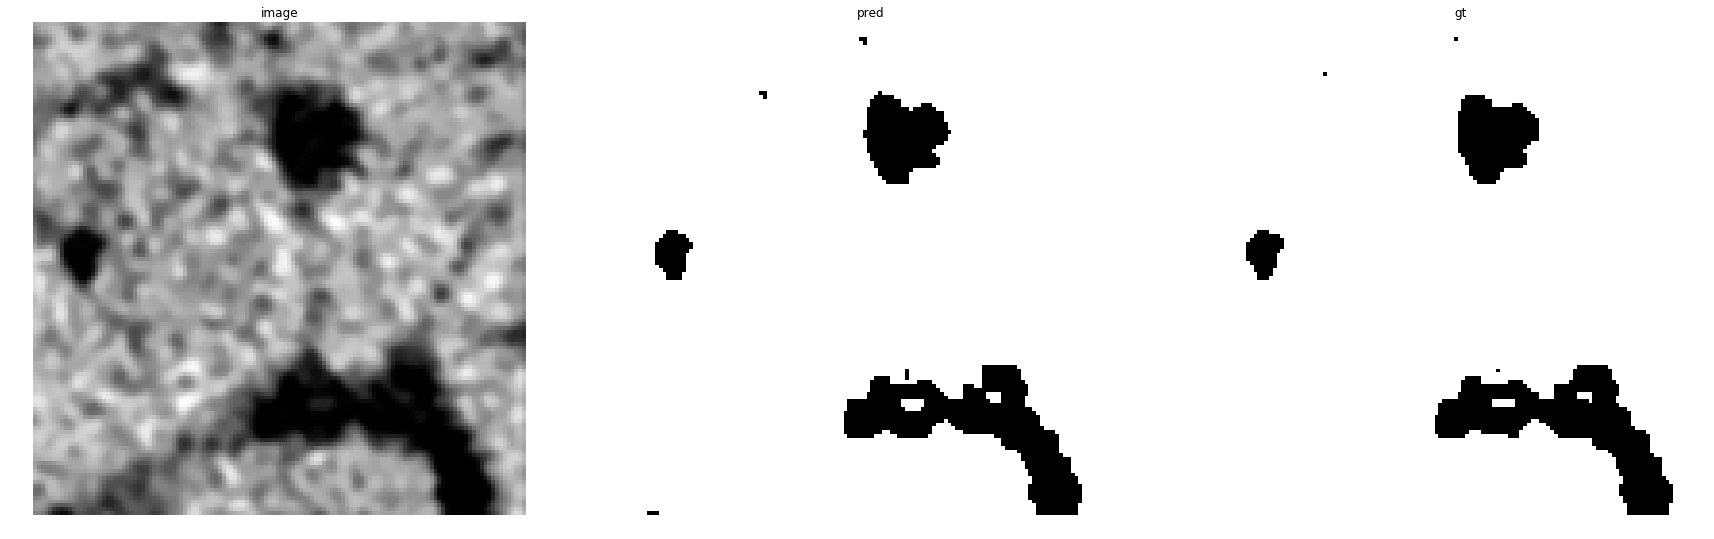

accuracy    : 0.99578857421875
precision   : 0.9983364386478574
recall      : 0.9970758290689173
f1          : 0.997705735660848
pr_auc      : 0.9999808063013399
iou         : 0.995421974522293


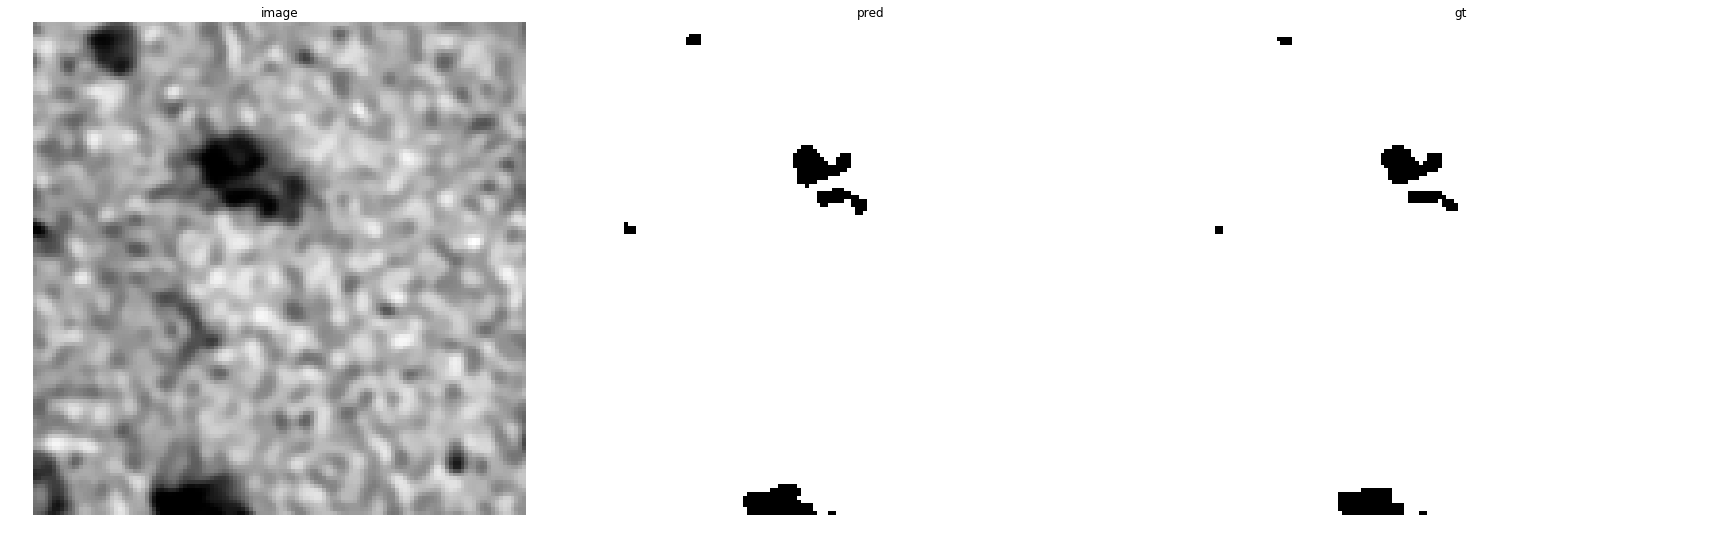

accuracy    : 0.9976806640625
precision   : 0.9994414794588556
recall      : 0.9982025536134871
f1          : 0.9988216323492929
pr_auc      : 0.9999970247585945
iou         : 0.9976460385306325


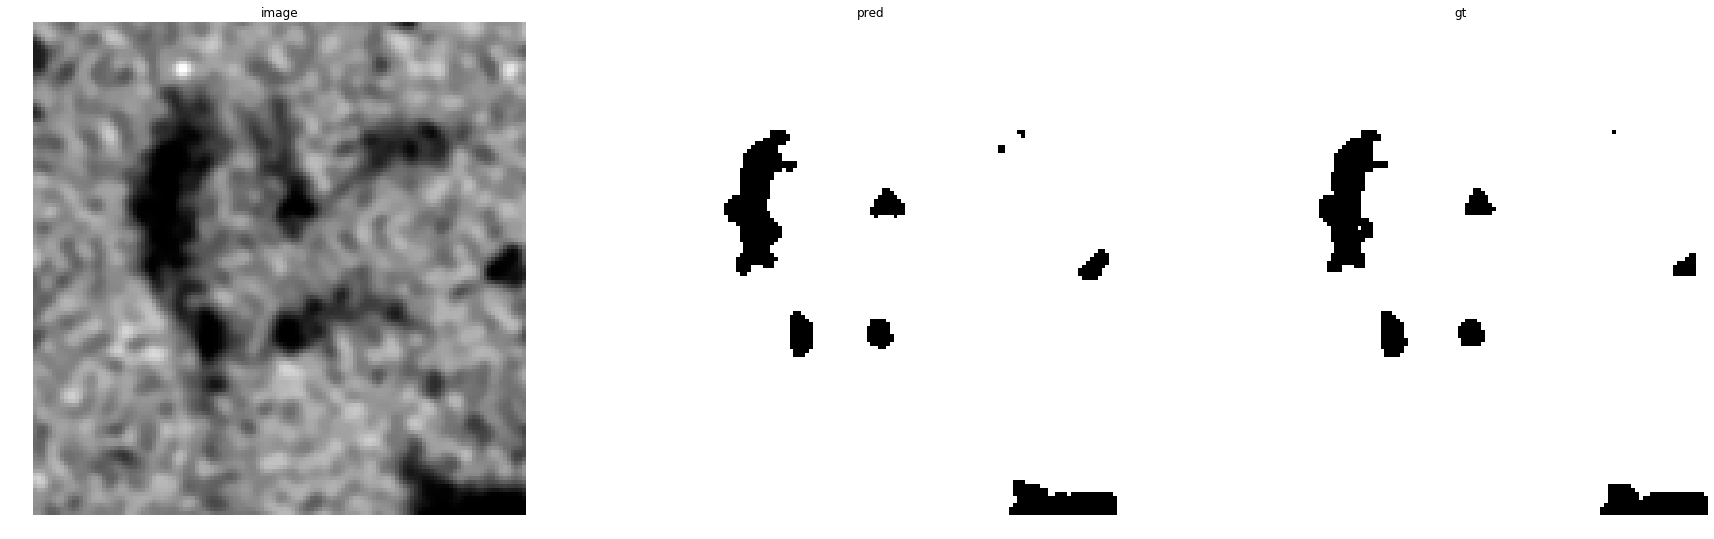

accuracy    : 0.995361328125
precision   : 0.9987235128925198
recall      : 0.9964340295466123
f1          : 0.9975774576055082
pr_auc      : 0.9999867941119079
iou         : 0.9951666242686339


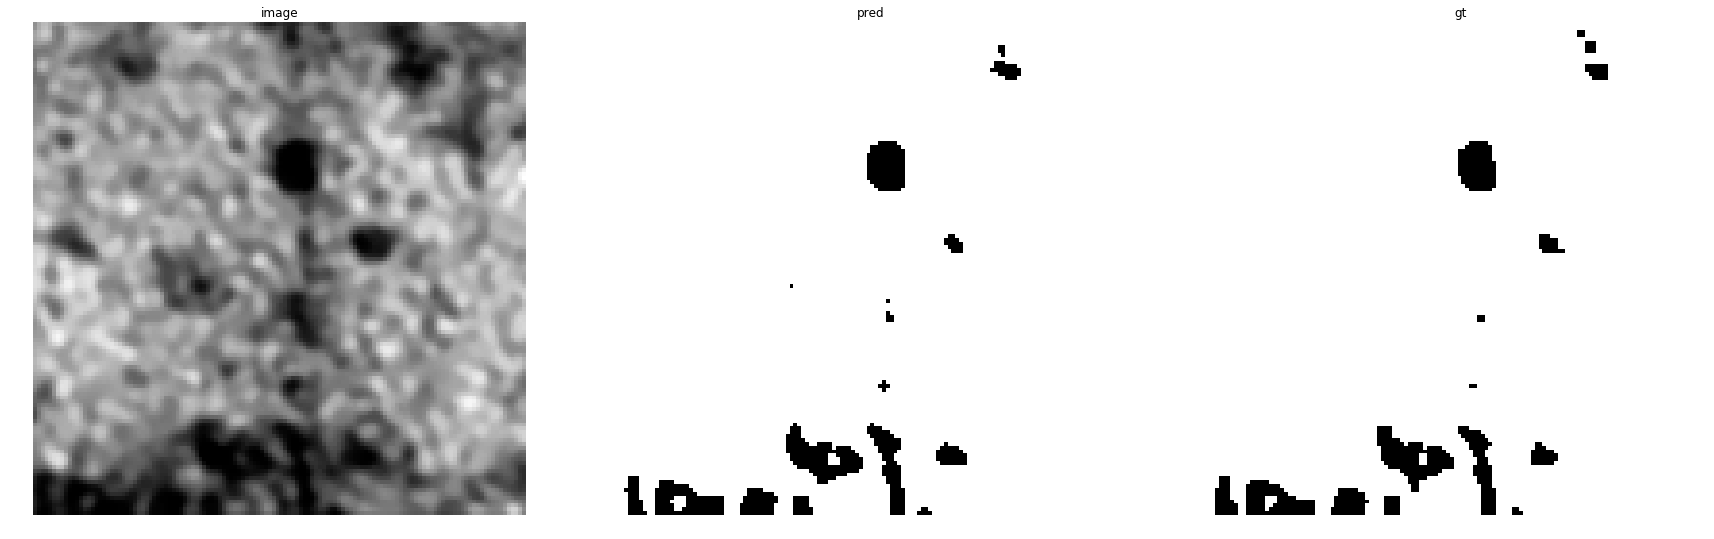

accuracy    : 0.9942626953125
precision   : 0.9971304680525443
recall      : 0.9968761953334183
f1          : 0.9970033154807446
pr_auc      : 0.999964561467789
iou         : 0.9940245375373467


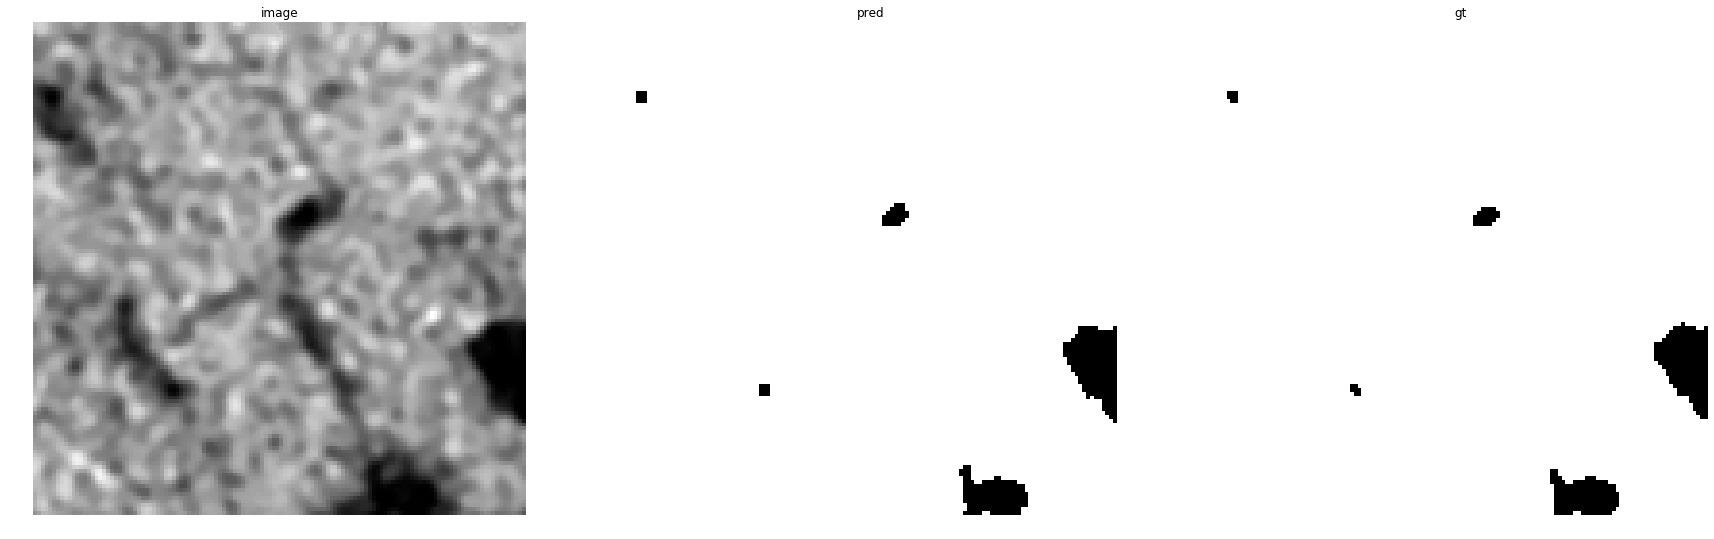

accuracy    : 0.99835205078125
precision   : 0.9993106905627271
recall      : 0.9989976821399487
f1          : 0.9991541618370351
pr_auc      : 0.9999982193114868
iou         : 0.9983097533491925


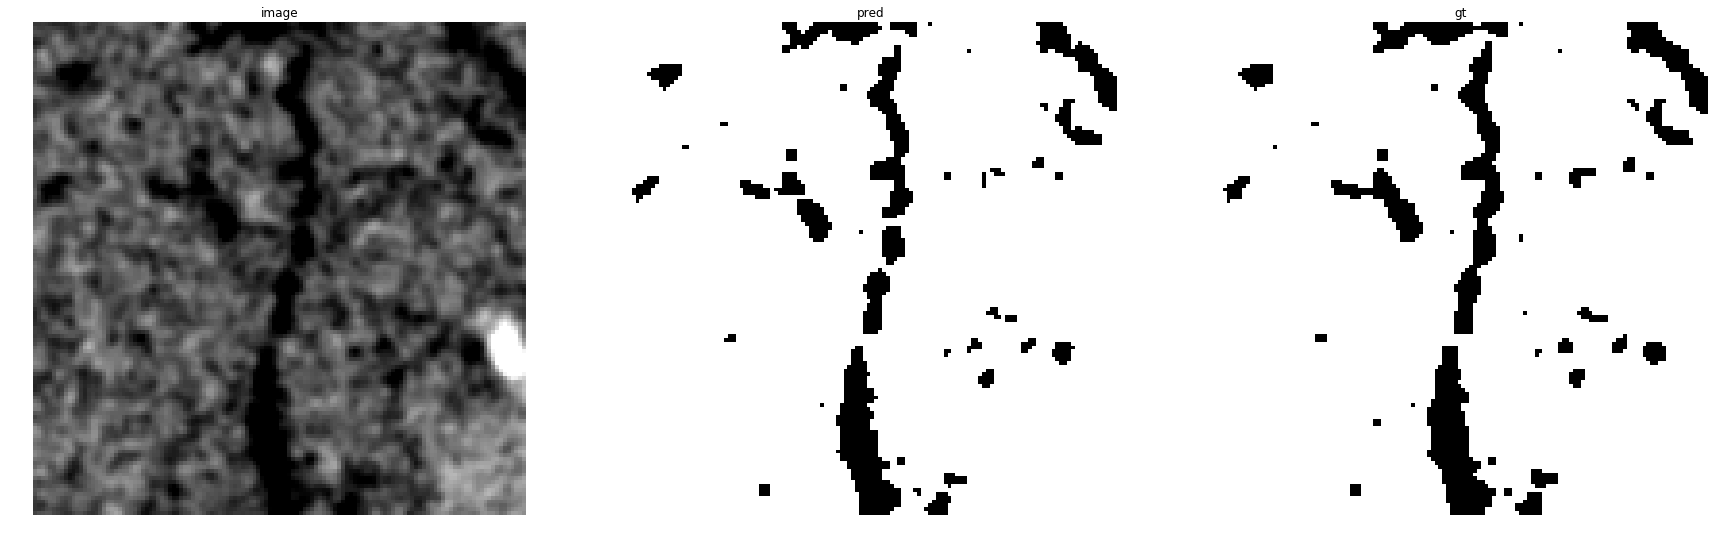

accuracy    : 0.98699951171875
precision   : 0.986272934244007
recall      : 0.9994571486734071
f1          : 0.9928212732971587
pr_auc      : 0.9998905376681173
iou         : 0.9857448802034533


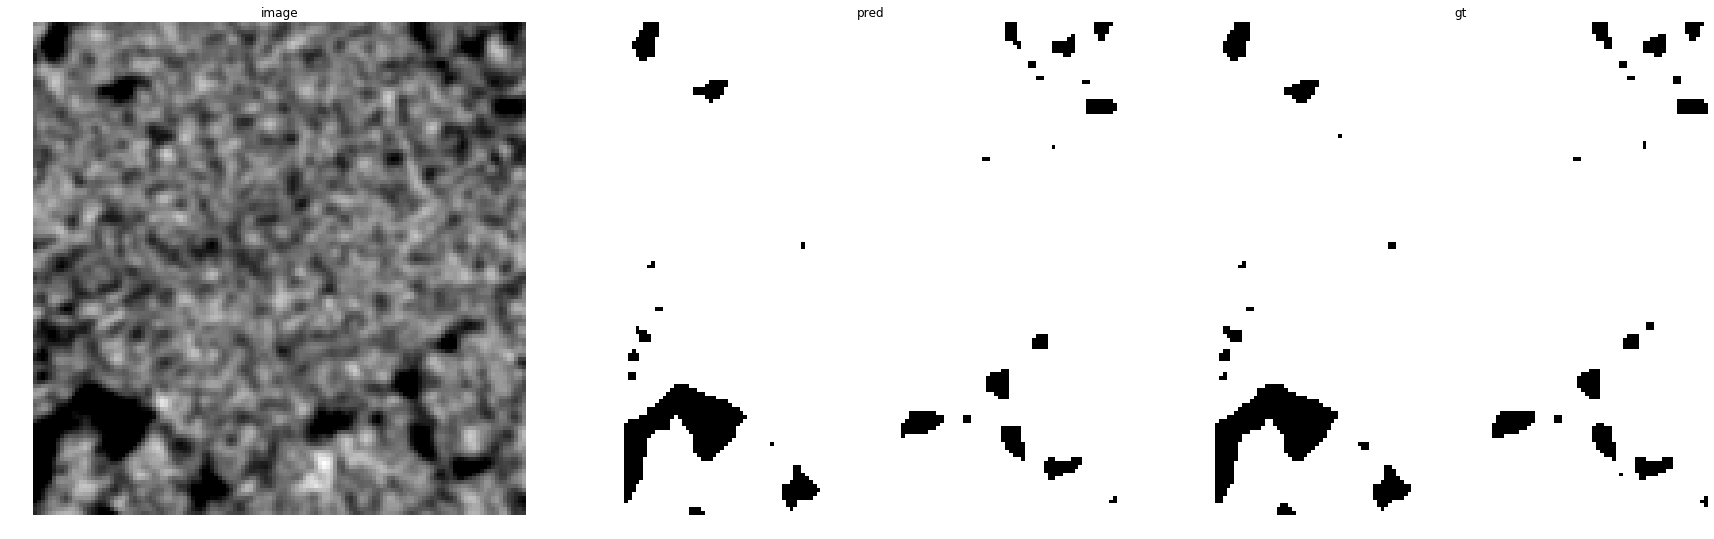

accuracy    : 0.99542236328125
precision   : 0.9953018406487322
recall      : 0.9998706924419732
f1          : 0.9975810353168844
pr_auc      : 0.9999827326464874
iou         : 0.9951737451737451


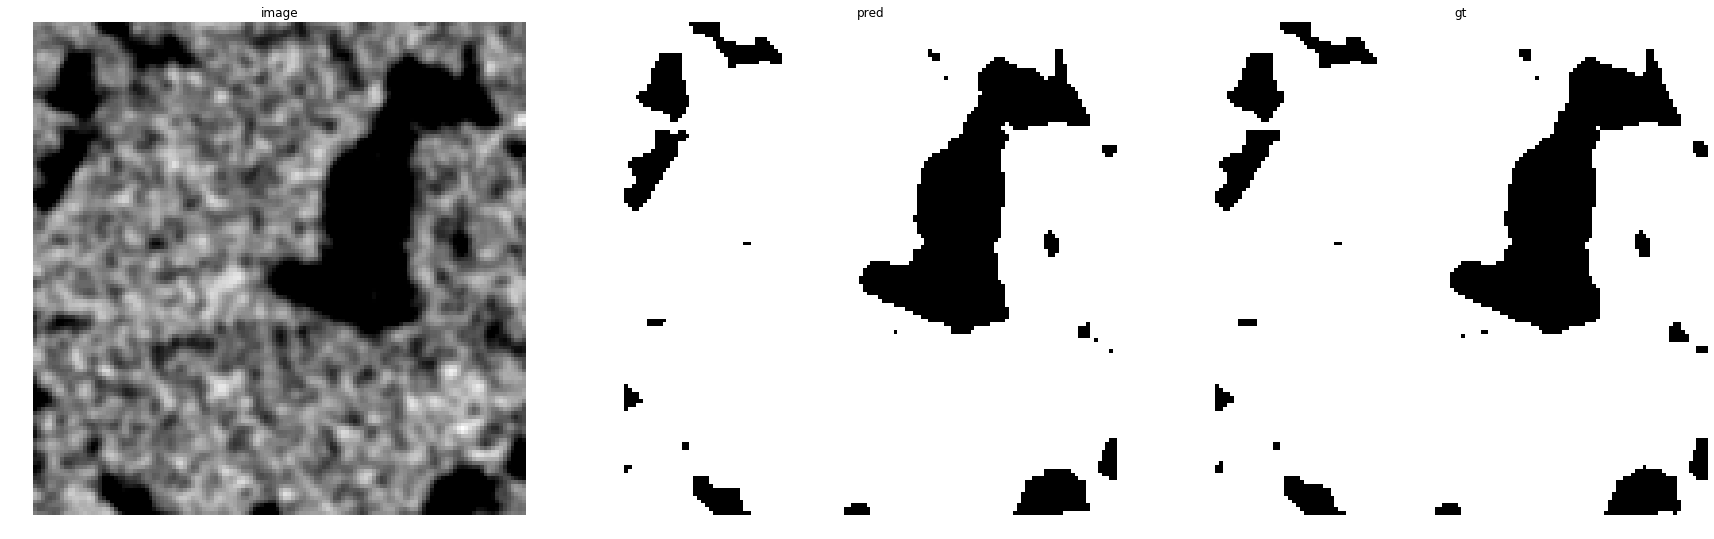

accuracy    : 0.99237060546875
precision   : 0.9913768324231101
recall      : 0.9996377074125063
f1          : 0.9954901324097125
pr_auc      : 0.9999587297106384
iou         : 0.9910207600028733


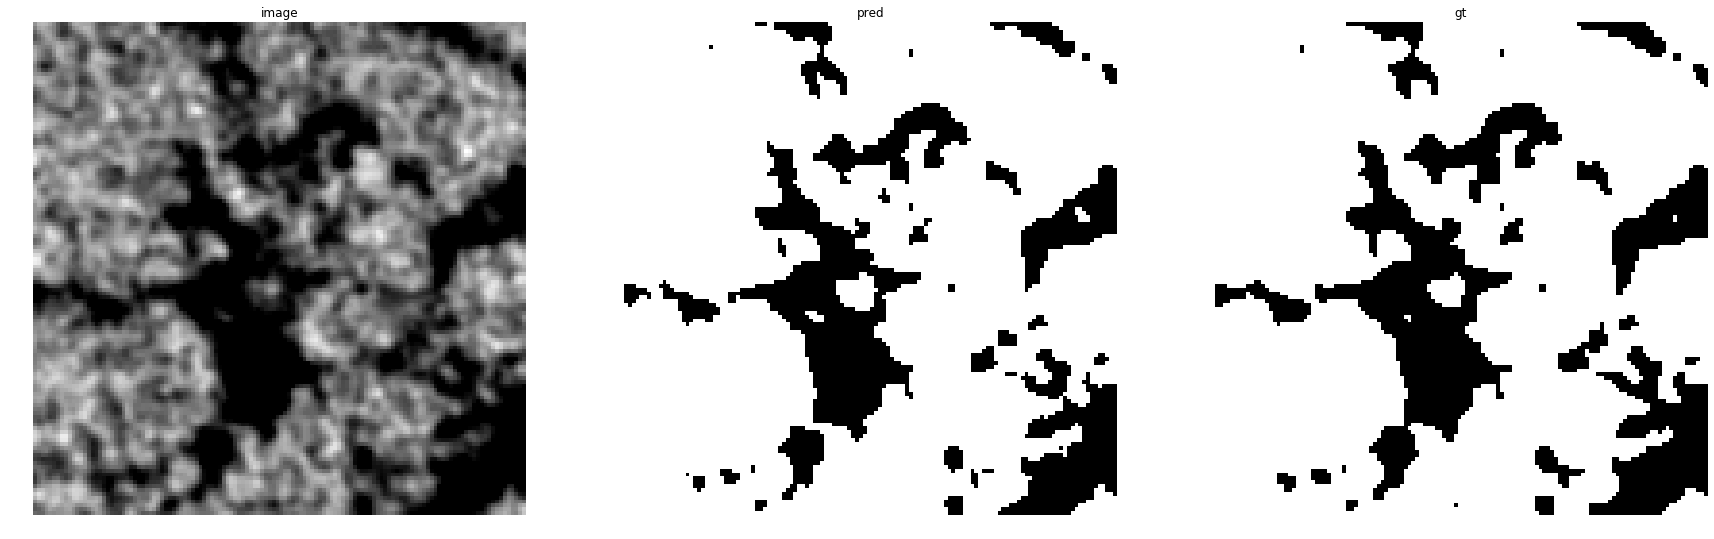

accuracy    : 0.97698974609375
precision   : 0.9716937710954281
recall      : 0.9993688362919132
f1          : 0.9853370152852865
pr_auc      : 0.9996398025802742
iou         : 0.9710978227537566


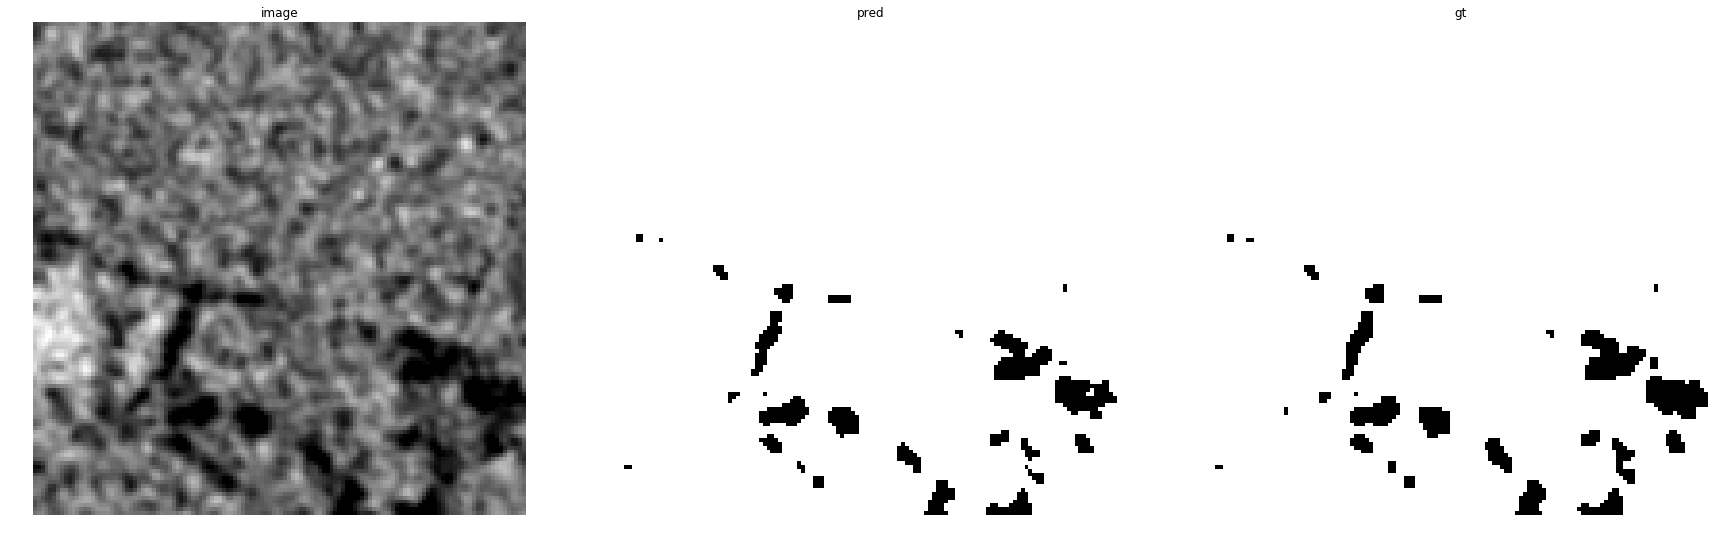

accuracy    : 0.99346923828125
precision   : 0.9932548520521794
recall      : 0.999935938500961
f1          : 0.99658419792498
pr_auc      : 0.9999694874250287
iou         : 0.9931916518198015


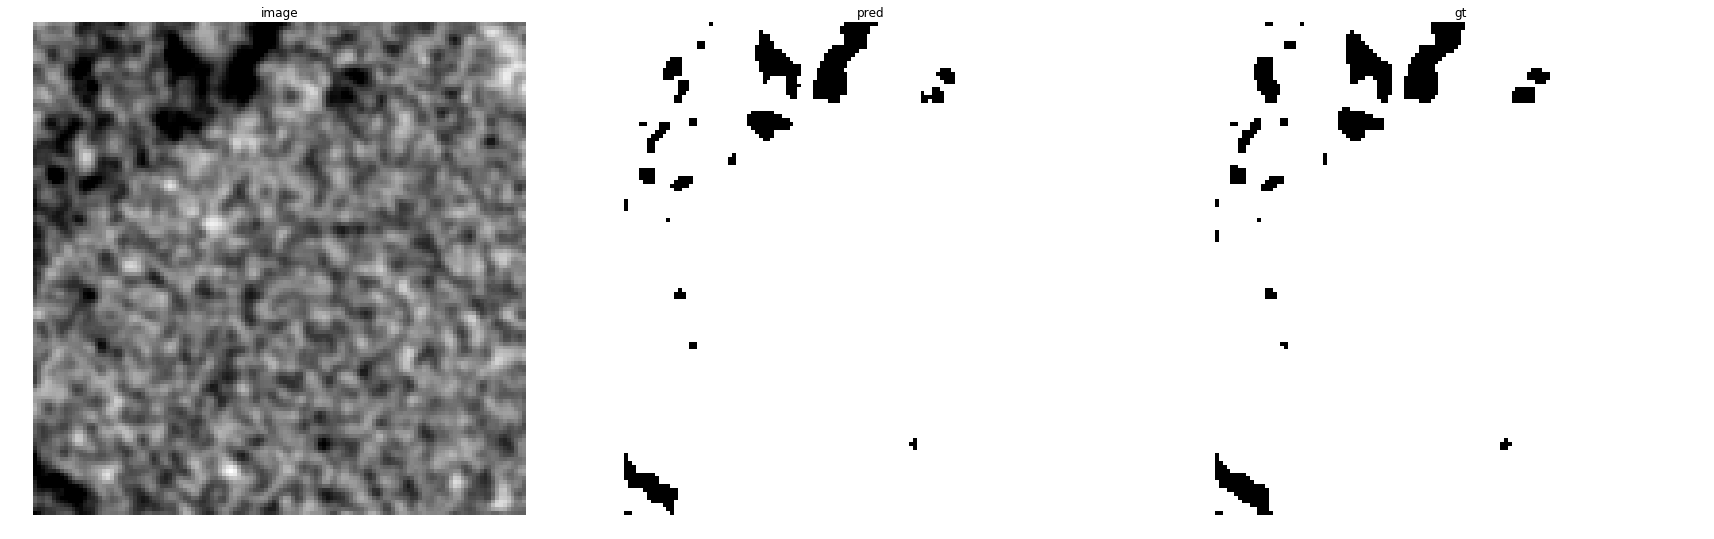

accuracy    : 0.99365234375
precision   : 0.993932499051953
recall      : 0.9994915469683489
f1          : 0.9967042717708202
pr_auc      : 0.9999802416161814
iou         : 0.9934301958307012


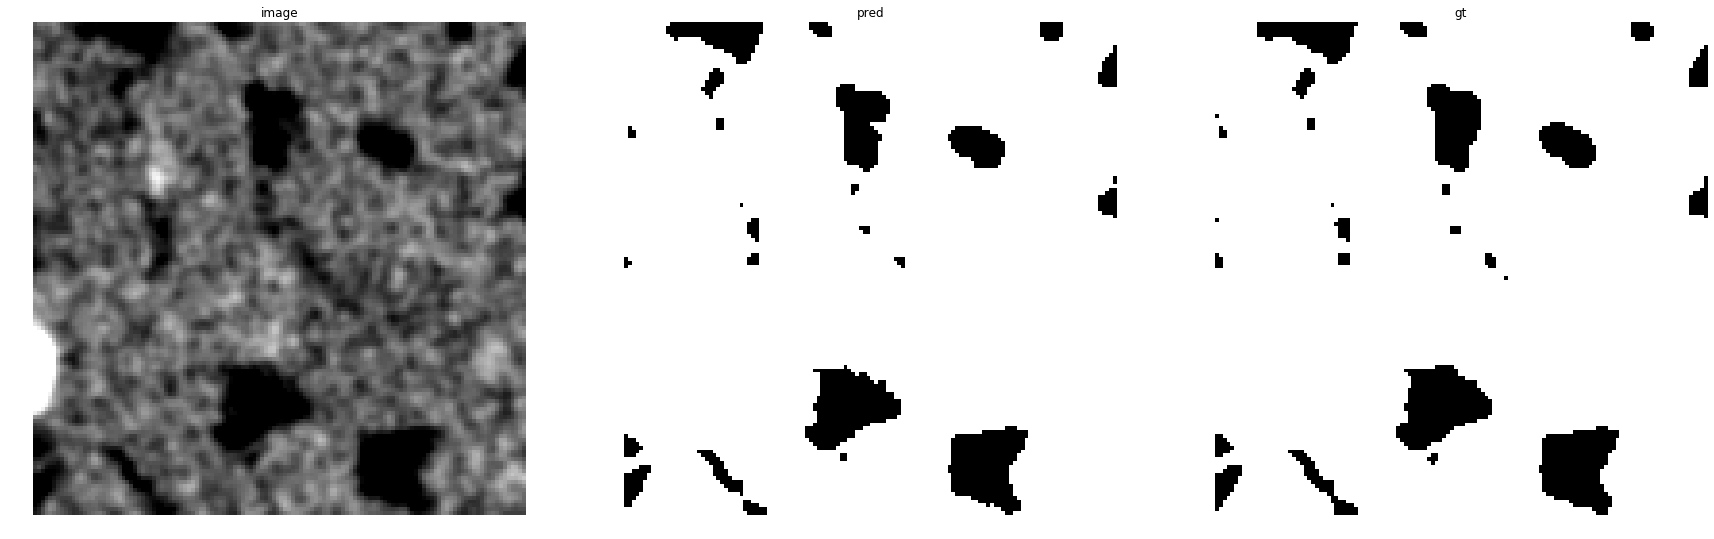

accuracy    : 0.99322509765625
precision   : 0.9929586909871244
recall      : 0.9995949503814218
f1          : 0.9962657695542473
pr_auc      : 0.9999622300369957
iou         : 0.9925593243062073


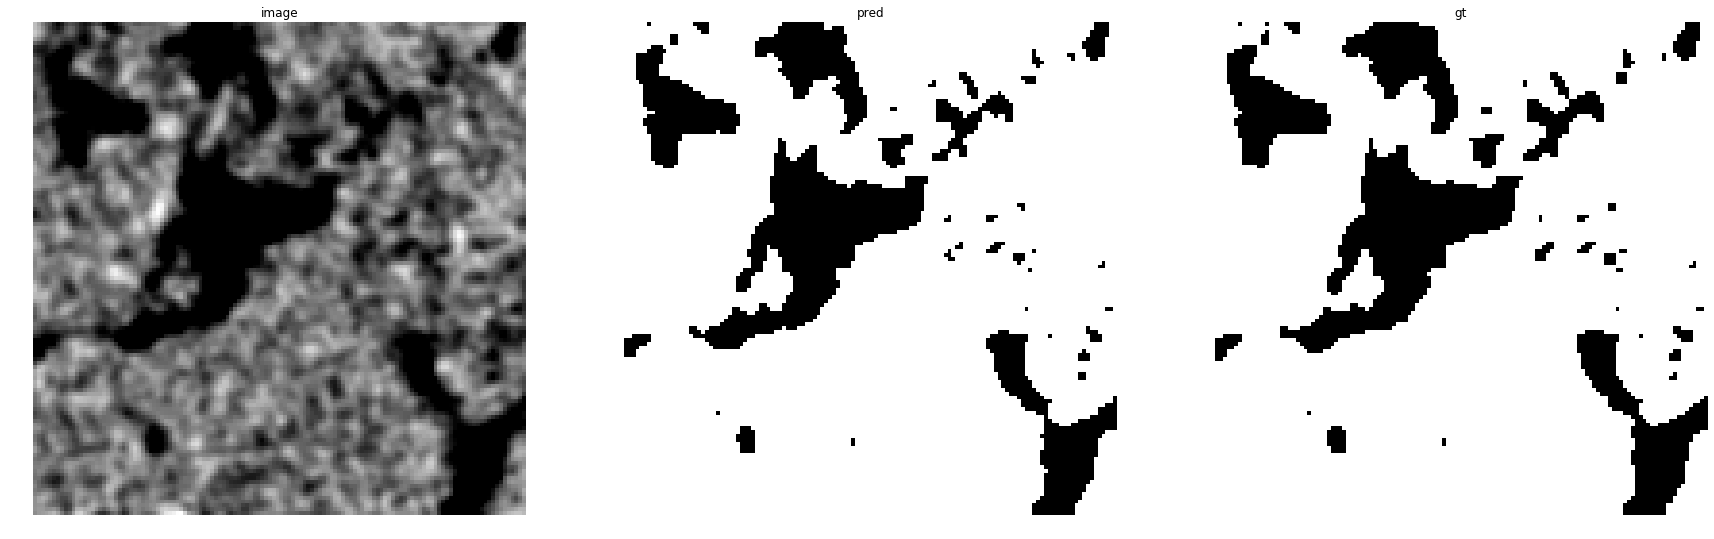

accuracy    : 0.9879150390625
precision   : 0.9863379863379863
recall      : 0.998947210106783
f1          : 0.9926025554808339
pr_auc      : 0.9998996170714021
iou         : 0.9853137516688919


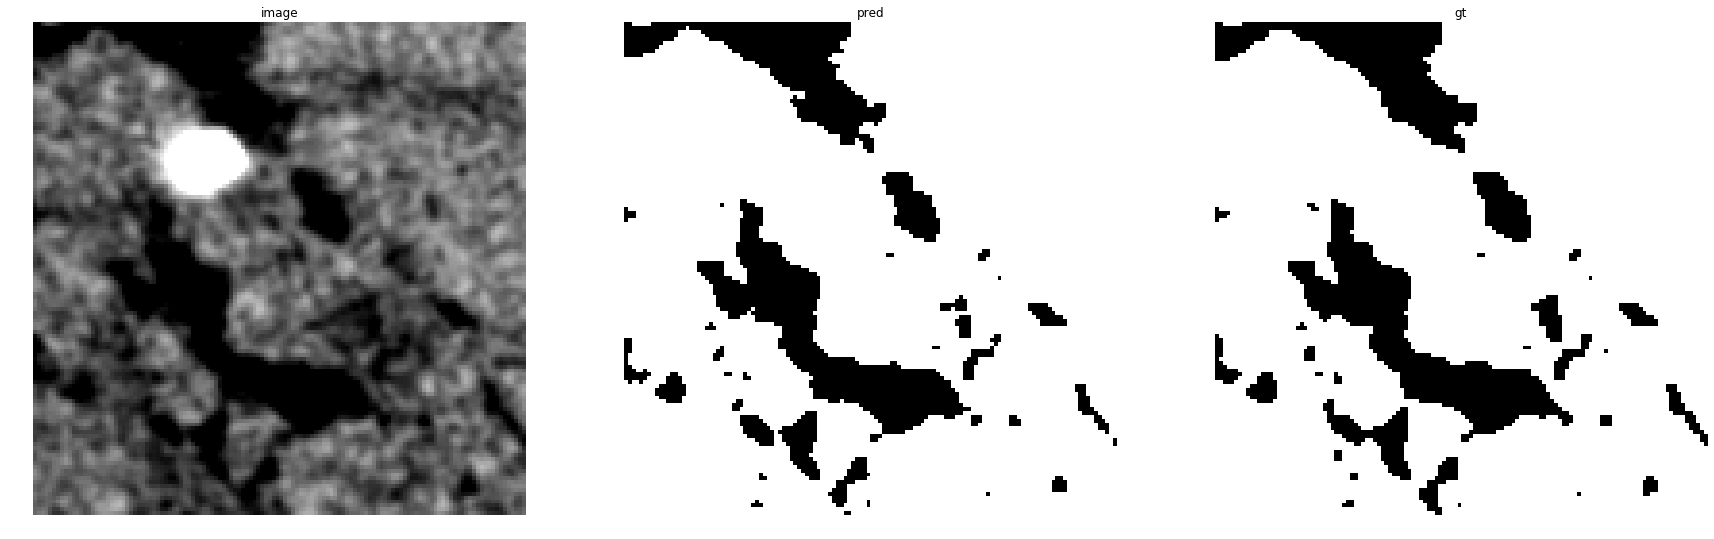

accuracy    : 0.9879150390625
precision   : 0.9862308862961084
recall      : 0.9994124990820298
f1          : 0.9927779398891158
pr_auc      : 0.999873131312298
iou         : 0.9856594481060331


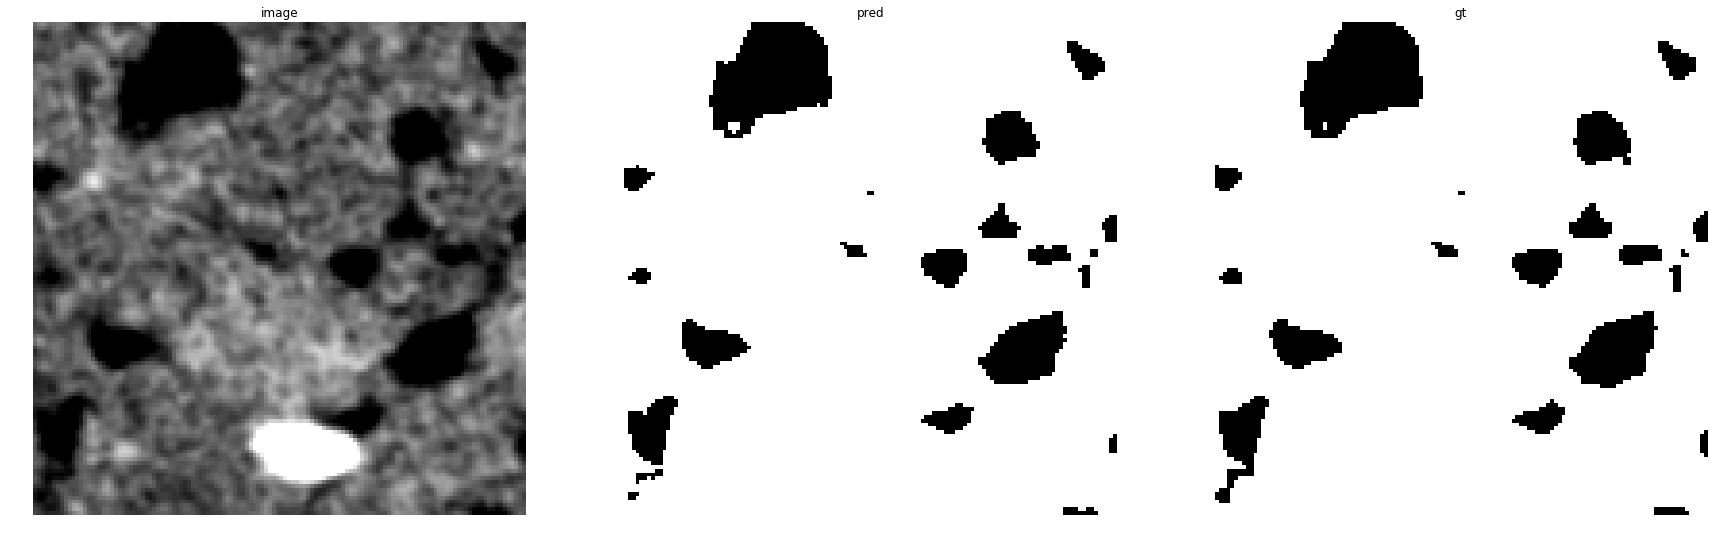

accuracy    : 0.99212646484375
precision   : 0.9918196191654637
recall      : 0.9993073832940851
f1          : 0.9955494221148871
pr_auc      : 0.9999597202606723
iou         : 0.9911382839870853


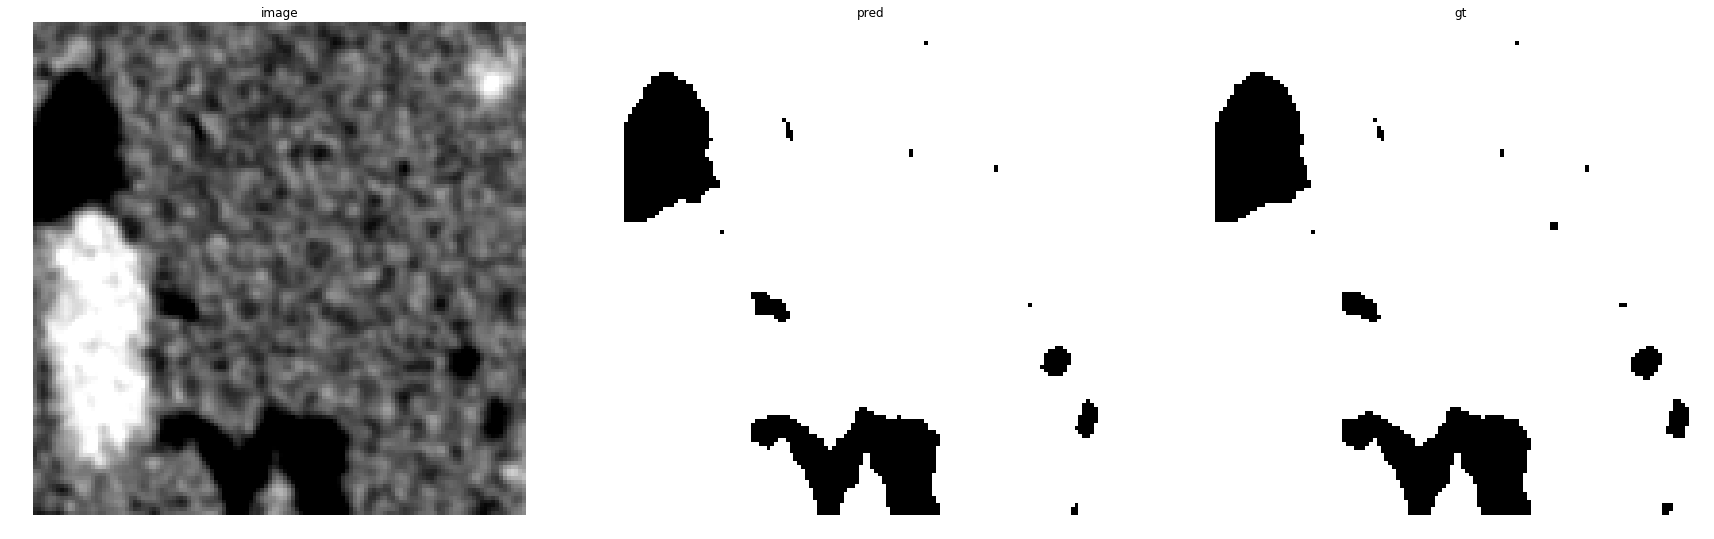

accuracy    : 0.9951171875
precision   : 0.994853040769335
recall      : 0.9997277800462774
f1          : 0.9972844534962662
pr_auc      : 0.9999900531502006
iou         : 0.994583615436696


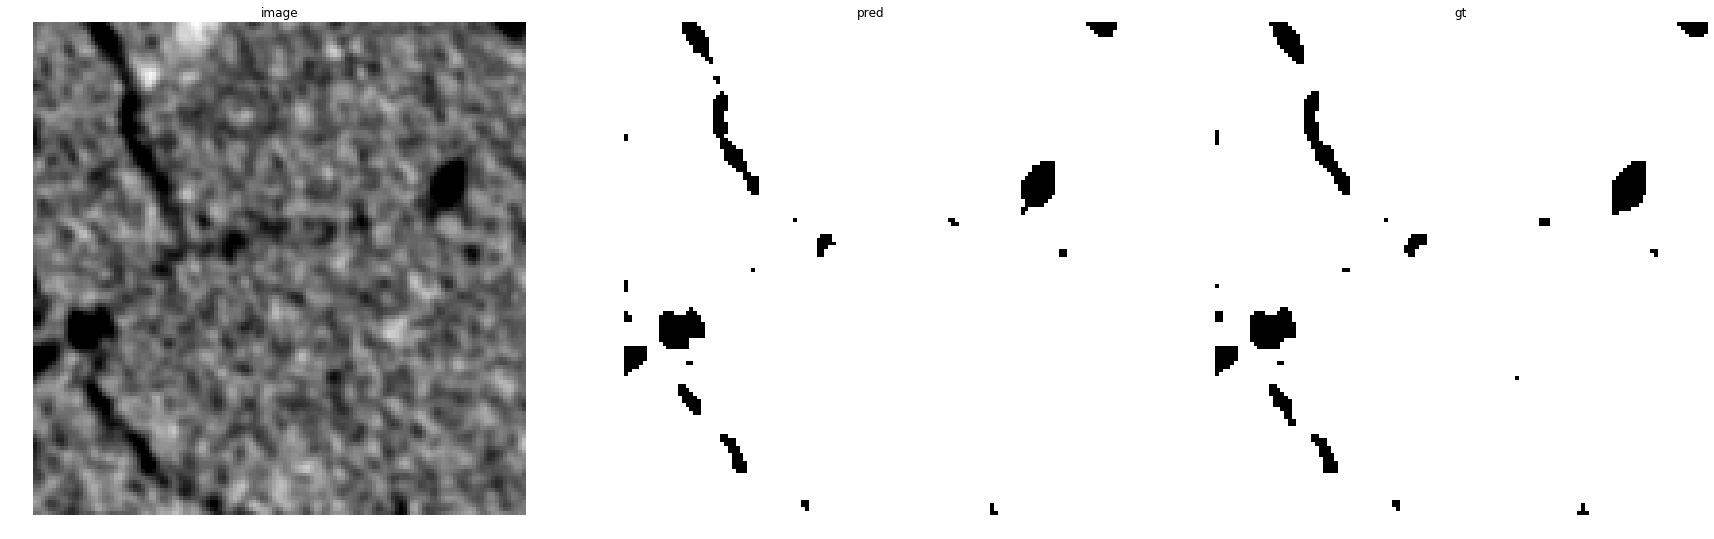

accuracy    : 0.99639892578125
precision   : 0.9967272956133174
recall      : 0.9995581923756627
f1          : 0.9981407367724451
pr_auc      : 0.9999933857566987
iou         : 0.9962883744338198


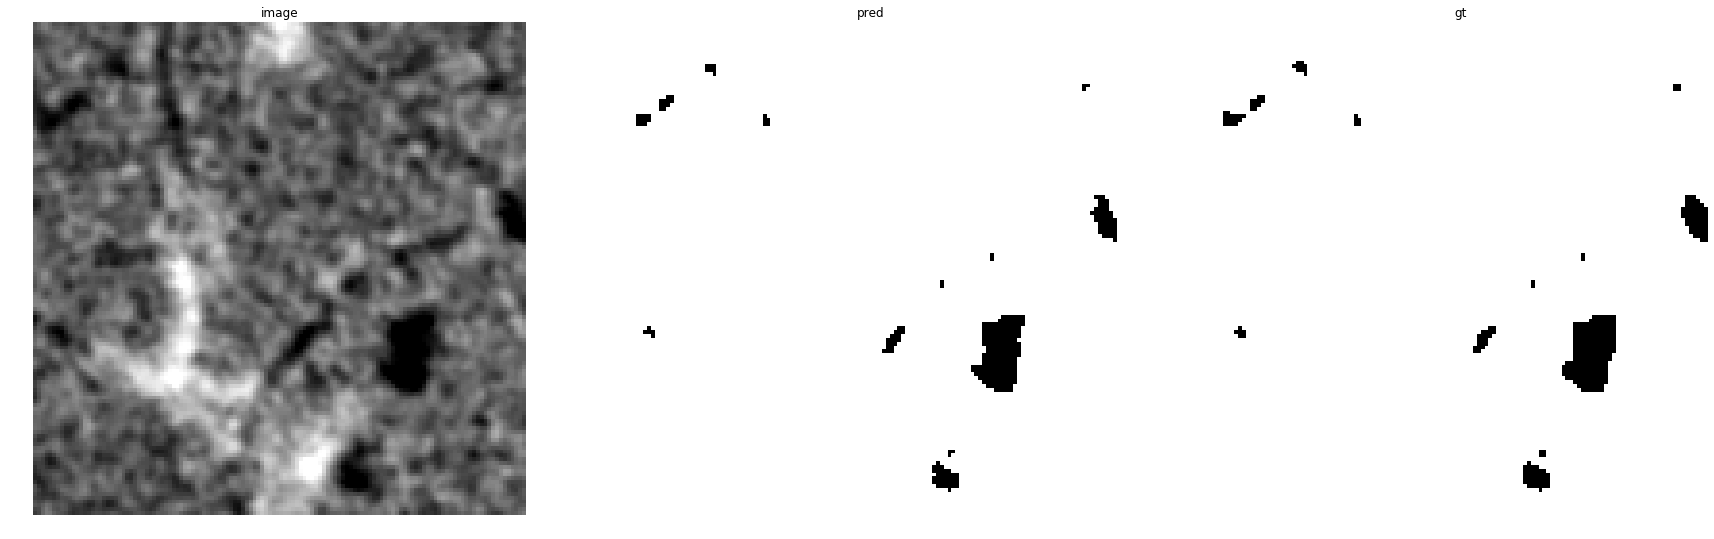

accuracy    : 0.99713134765625
precision   : 0.9971952131637996
recall      : 0.9998750078120118
f1          : 0.9985333125292558
pr_auc      : 0.9999901908506167
iou         : 0.9970709211018323


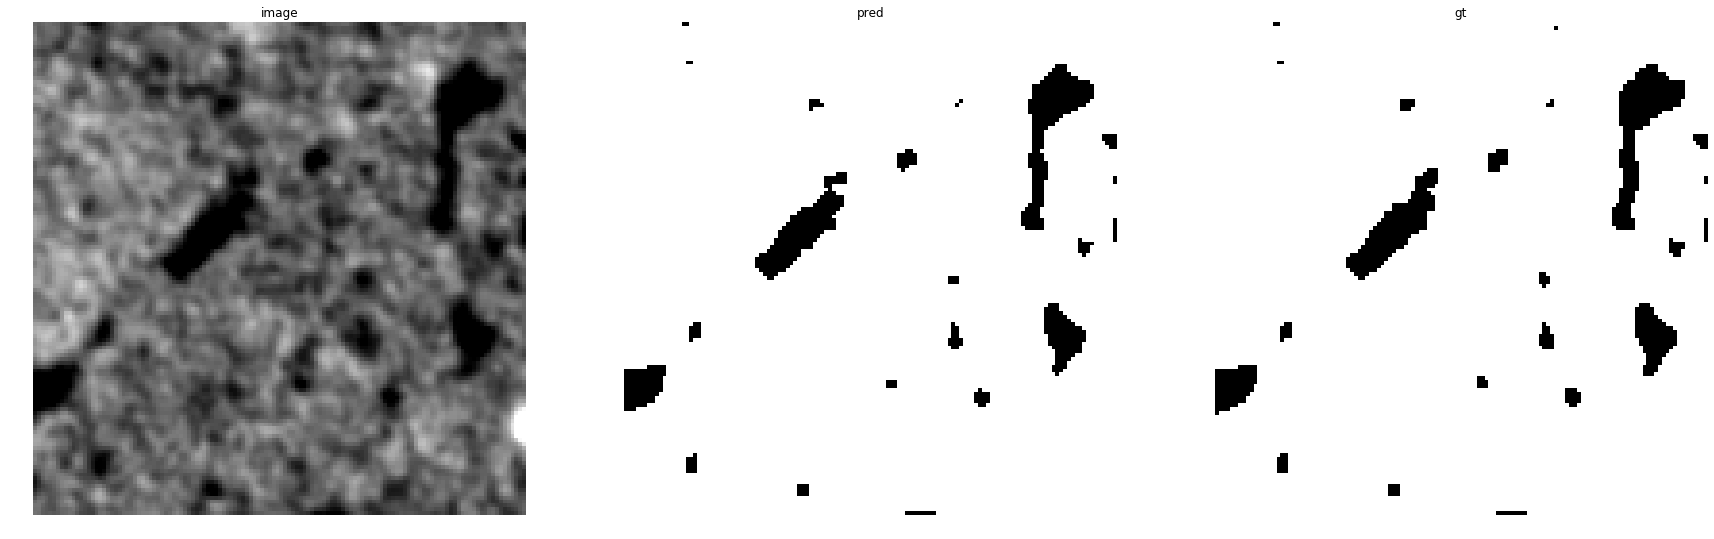

accuracy    : 0.9949951171875
precision   : 0.9949038833698878
recall      : 0.9998055231427461
f1          : 0.9973486808070358
pr_auc      : 0.9999895884920645
iou         : 0.9947113834247017


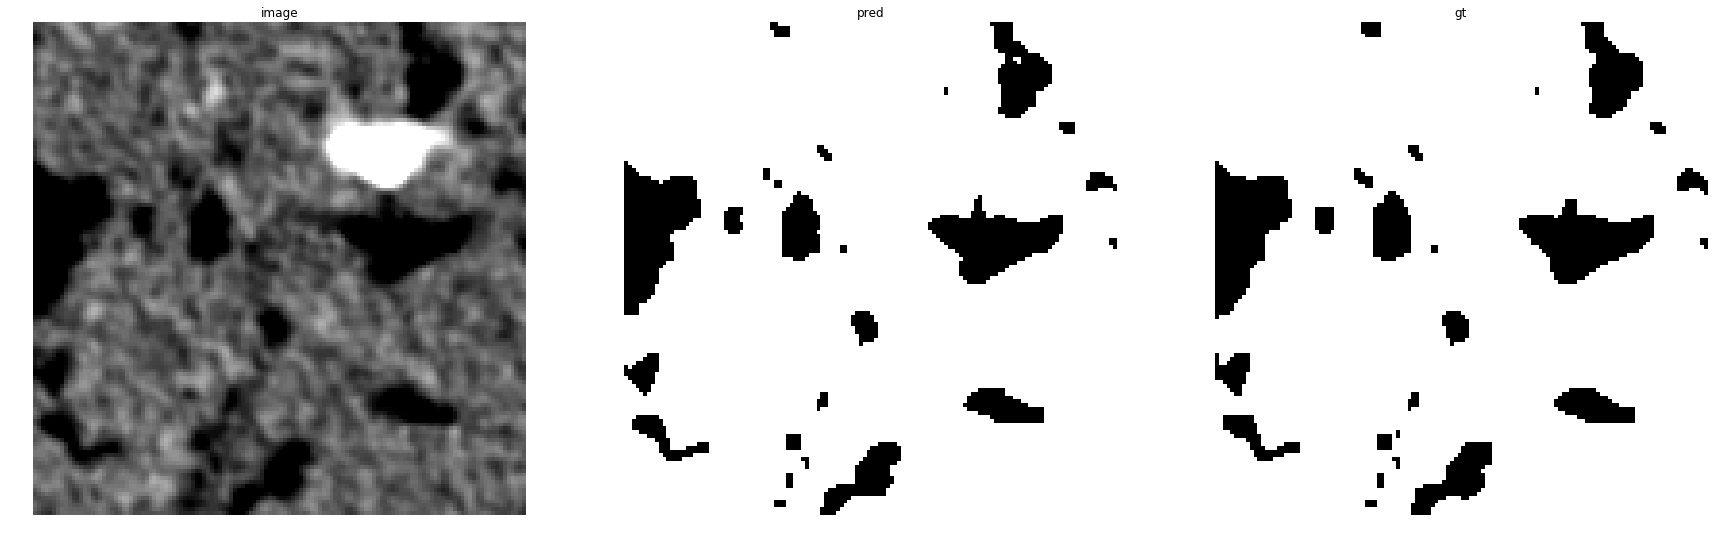

accuracy    : 0.99285888671875
precision   : 0.9923448275862069
recall      : 0.9995831886071552
f1          : 0.995950856549576
pr_auc      : 0.9999731637679987
iou         : 0.9919343719840066


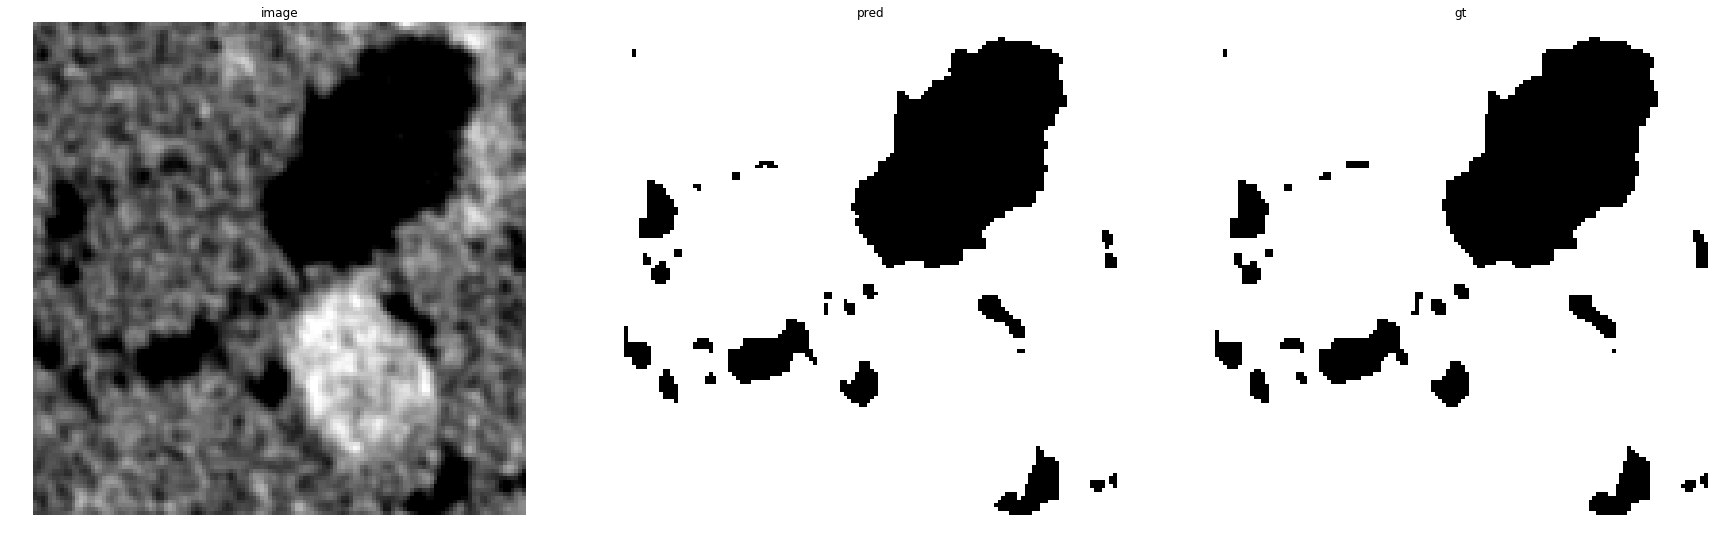

accuracy    : 0.99395751953125
precision   : 0.9931730483823092
recall      : 0.9994772608468374
f1          : 0.9963151821937694
pr_auc      : 0.9999767424313102
iou         : 0.9926574204553883


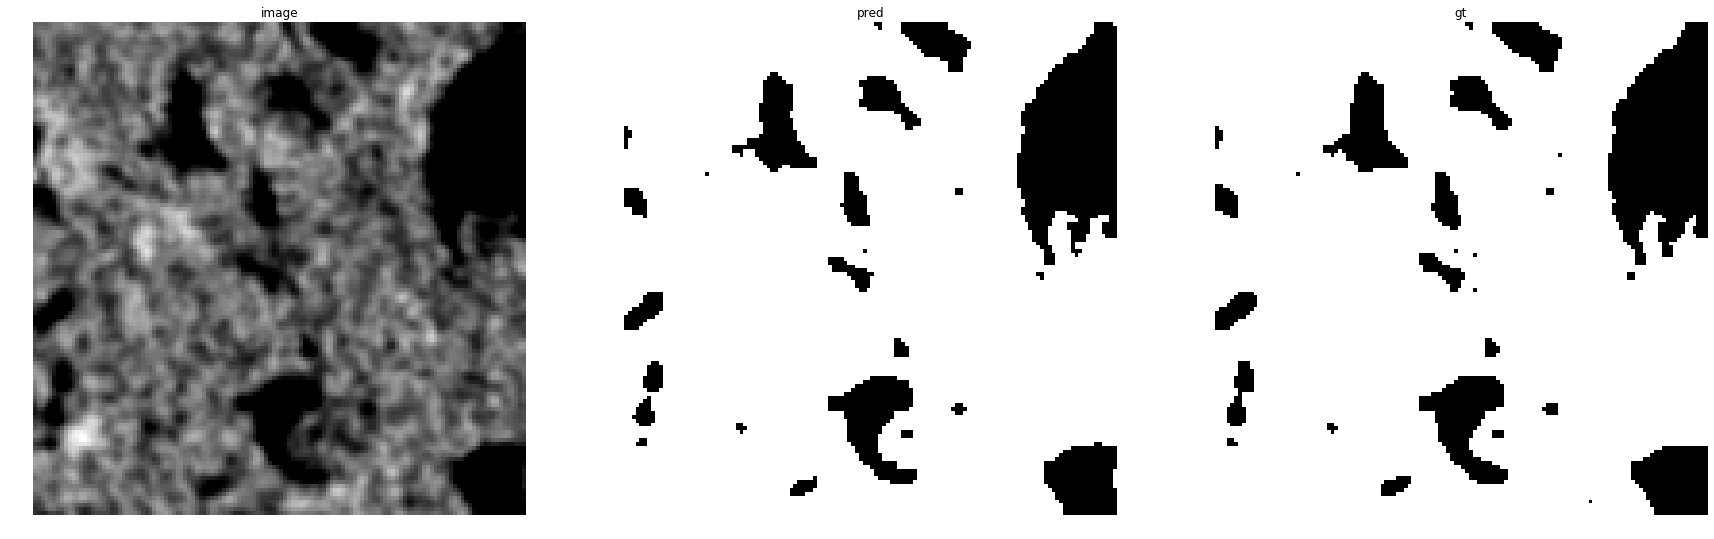

accuracy    : 0.99090576171875
precision   : 0.9900645442019
recall      : 0.9991217798594848
f1          : 0.9945725421629693
pr_auc      : 0.9999385650799812
iou         : 0.989203680892689


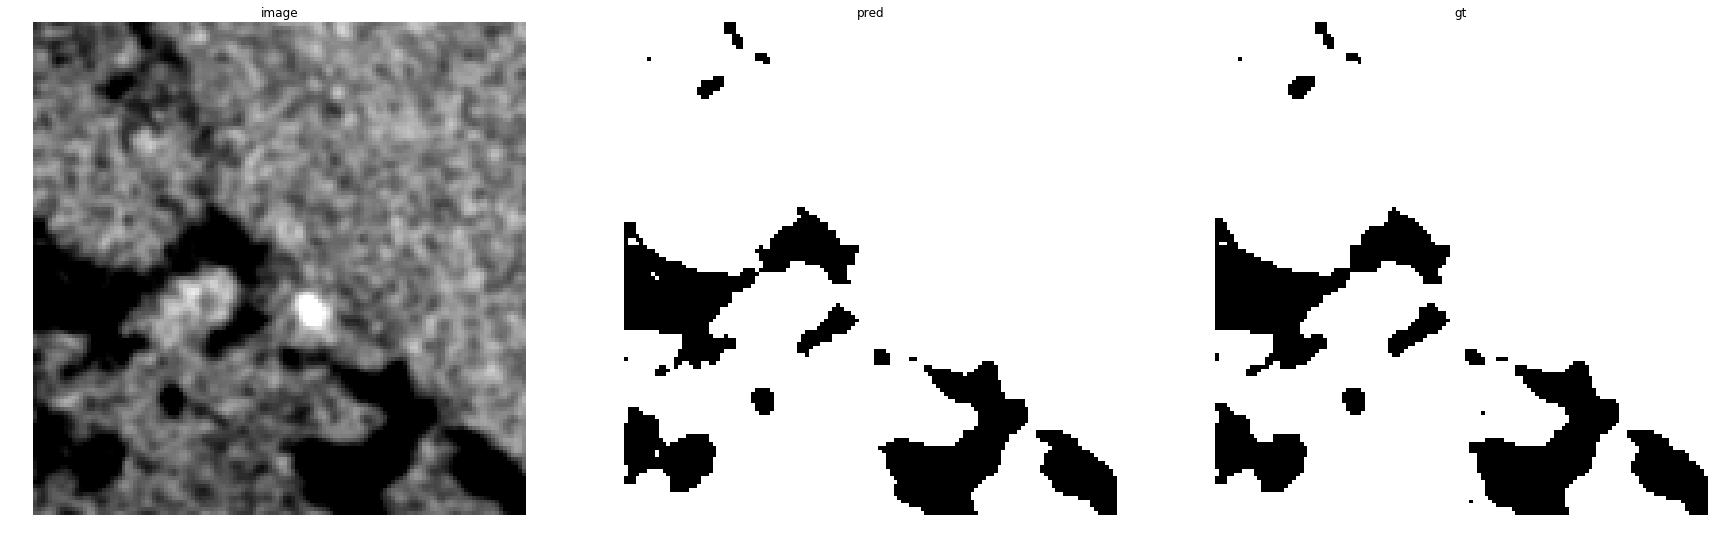

accuracy    : 0.99249267578125
precision   : 0.9918379036299849
recall      : 0.9993507430385226
f1          : 0.9955801502030257
pr_auc      : 0.9999668466134015
iou         : 0.9911991986262164


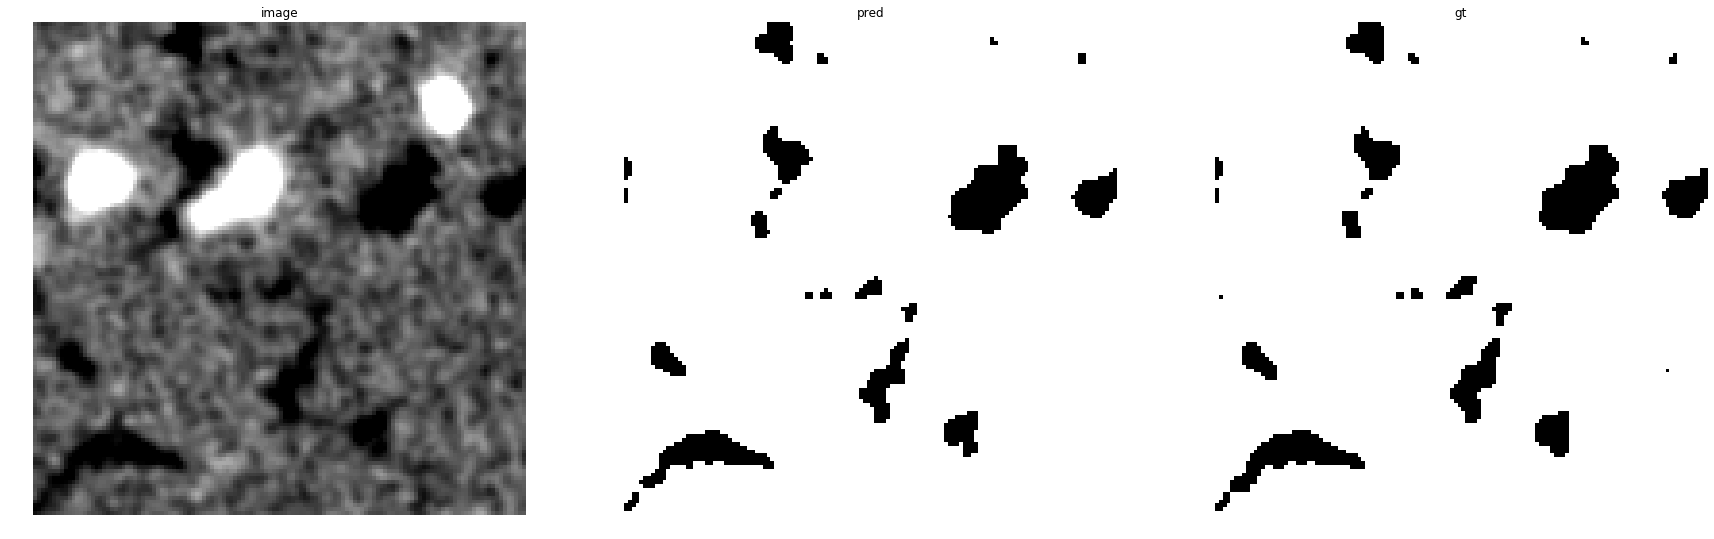

accuracy    : 0.99432373046875
precision   : 0.9943599160545645
recall      : 0.9995385325334564
f1          : 0.9969424992602821
pr_auc      : 0.9999767552553532
iou         : 0.9939036381514258


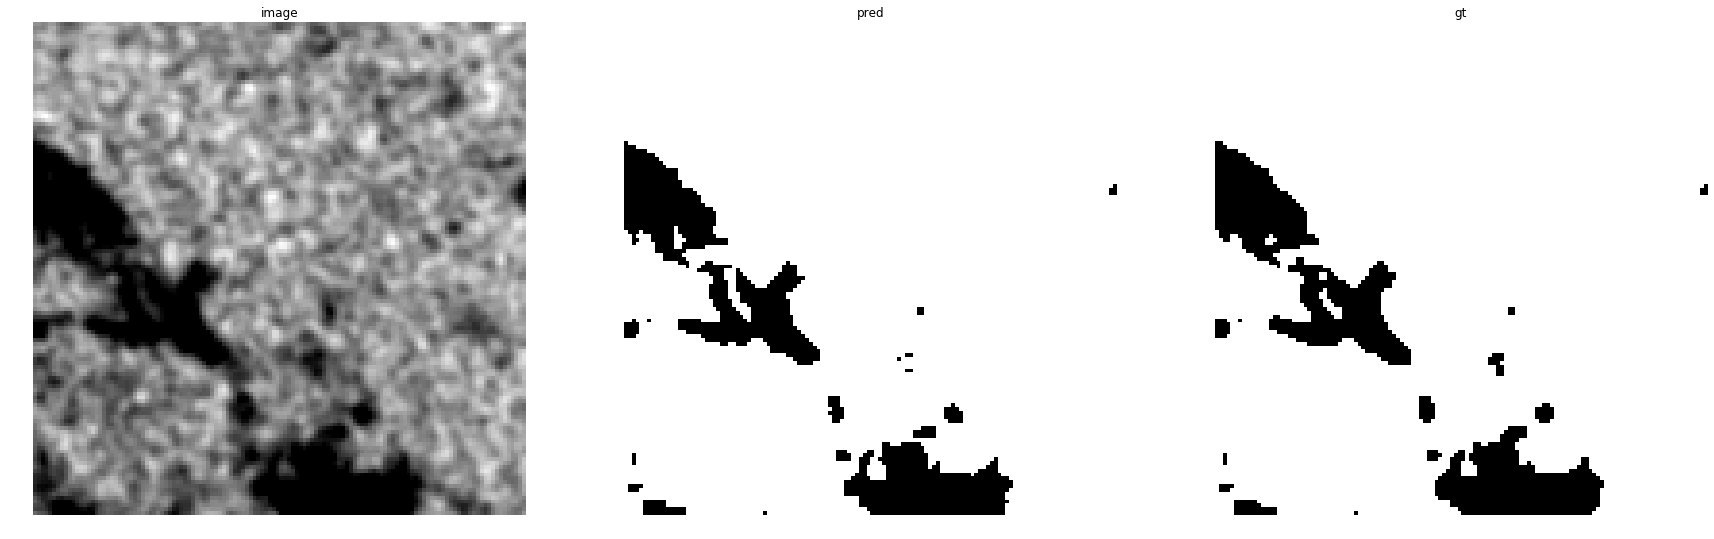

accuracy    : 0.99261474609375
precision   : 0.9922858302882663
recall      : 0.9995228682434735
f1          : 0.9958912017385989
pr_auc      : 0.9999703683722779
iou         : 0.9918160297598918


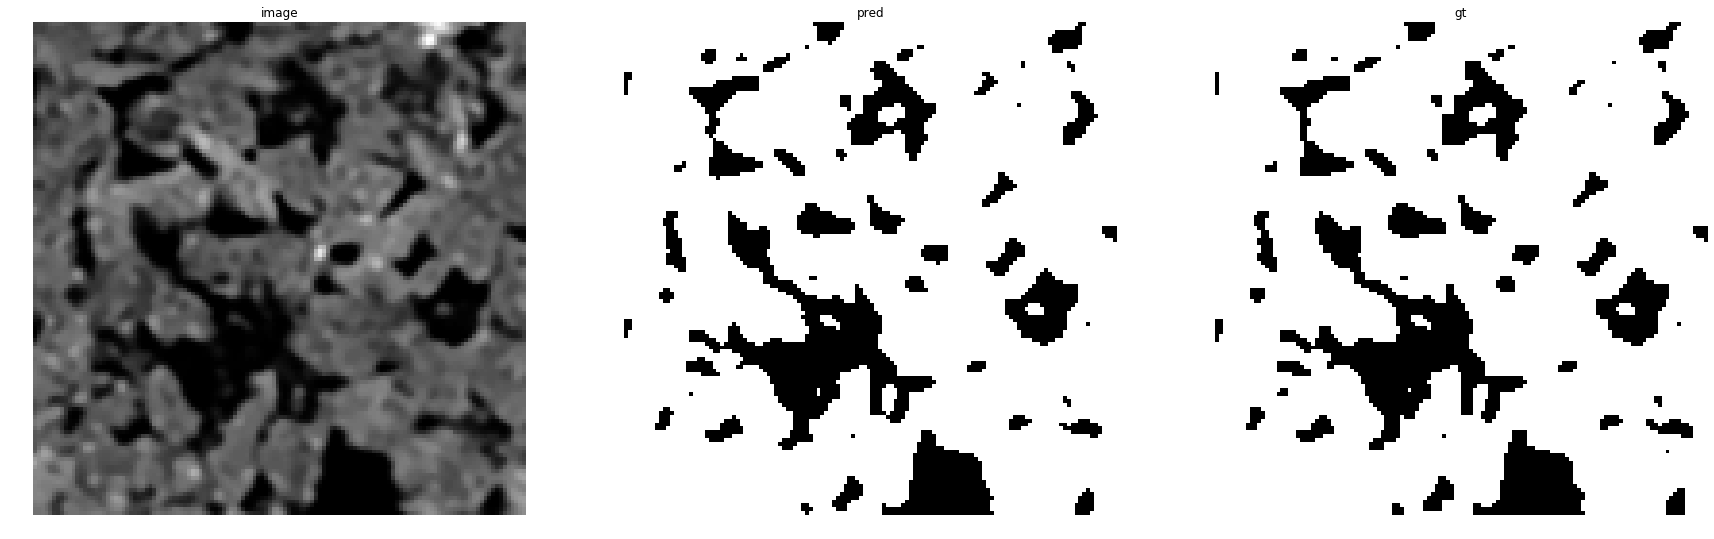

accuracy    : 0.989990234375
precision   : 0.9935445573940788
recall      : 0.9942823197445608
f1          : 0.9939133016627079
pr_auc      : 0.9999010120796276
iou         : 0.987900250848458


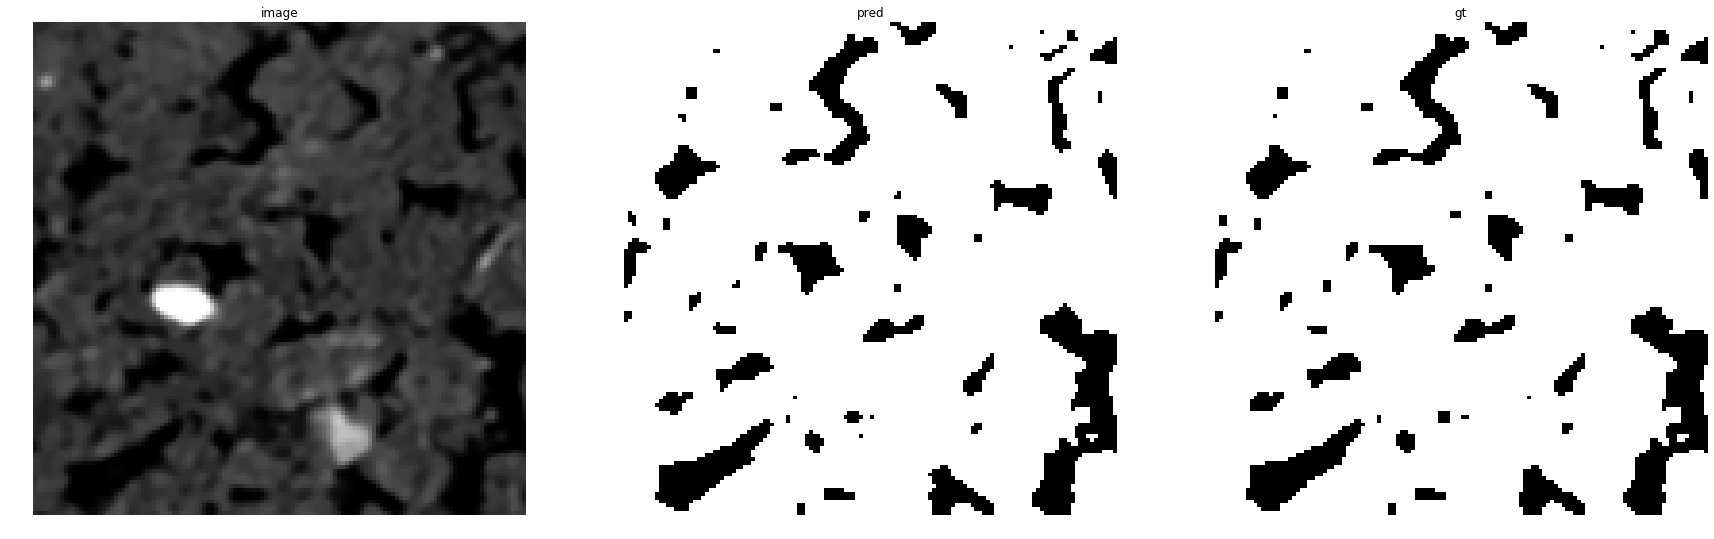

accuracy    : 0.99212646484375
precision   : 0.9948453608247423
recall      : 0.9960410038882997
f1          : 0.9954428233299183
pr_auc      : 0.9999367314694115
iou         : 0.9909269939513293


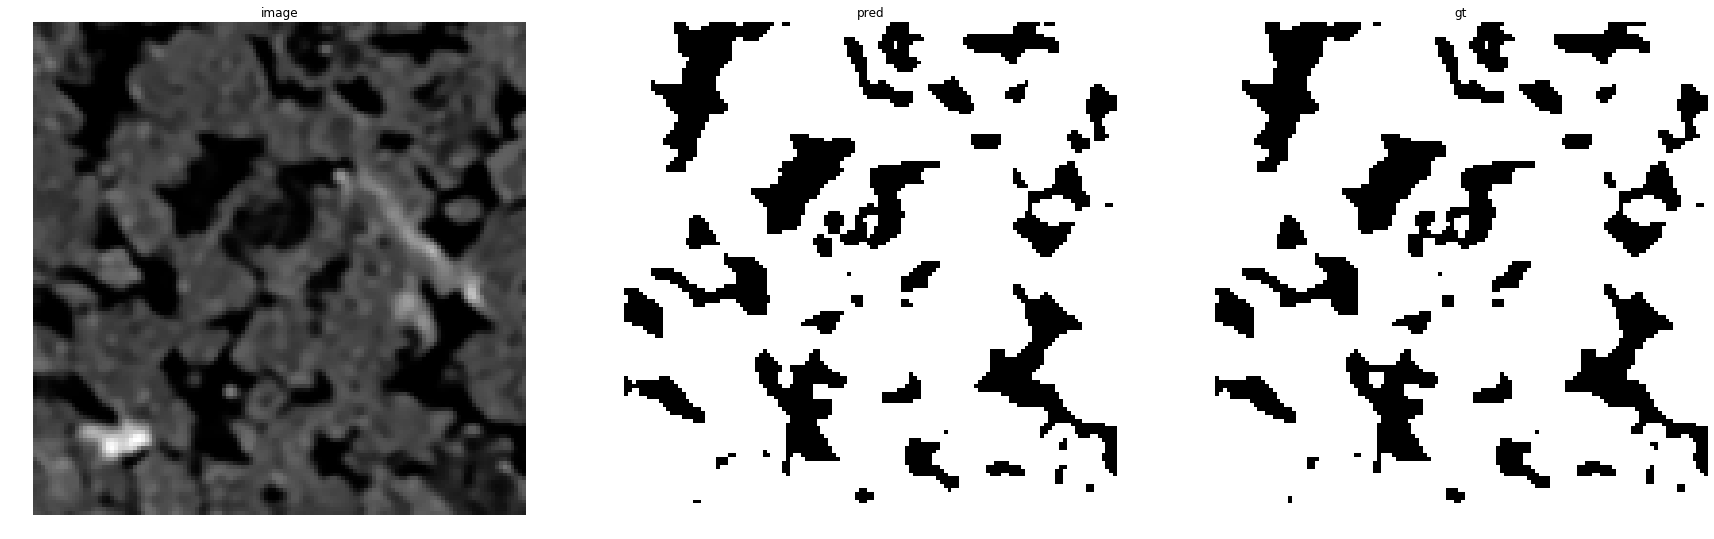

accuracy    : 0.9896240234375
precision   : 0.9937730627306273
recall      : 0.9931622618315918
f1          : 0.9934675683984014
pr_auc      : 0.9998680735375984
iou         : 0.9870199282278385


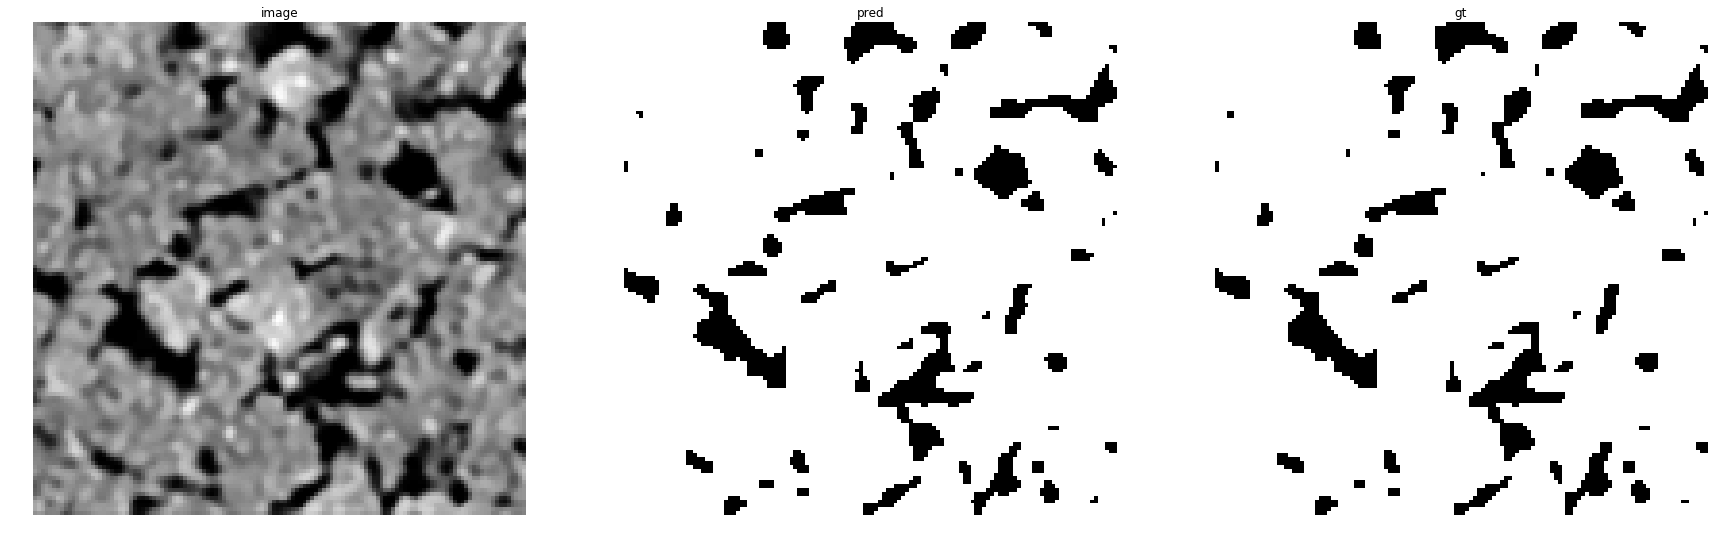

accuracy    : 0.99371337890625
precision   : 0.9962678830603359
recall      : 0.996612278761062
f1          : 0.9964400511526631
pr_auc      : 0.9999520141315175
iou         : 0.9929053588648574


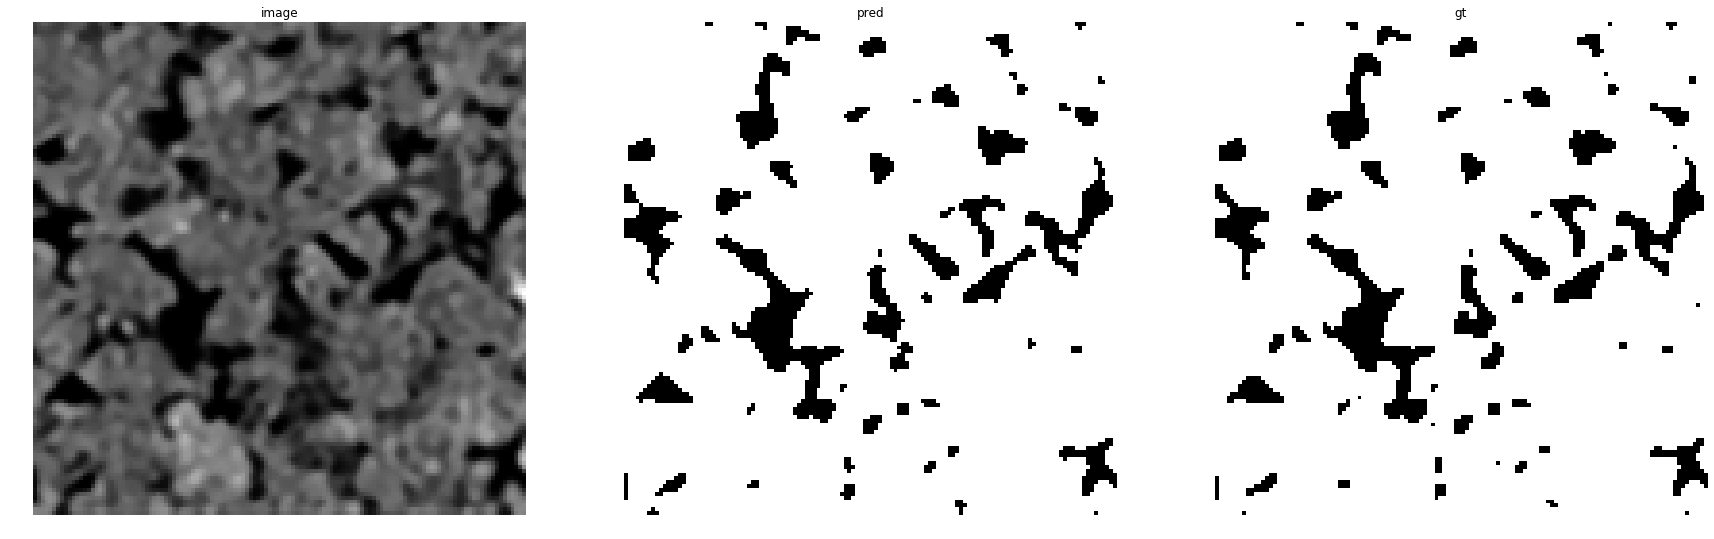

accuracy    : 0.99017333984375
precision   : 0.9943071369064149
recall      : 0.994514269842372
f1          : 0.9944106925880924
pr_auc      : 0.9999104604808731
iou         : 0.9888835186080231


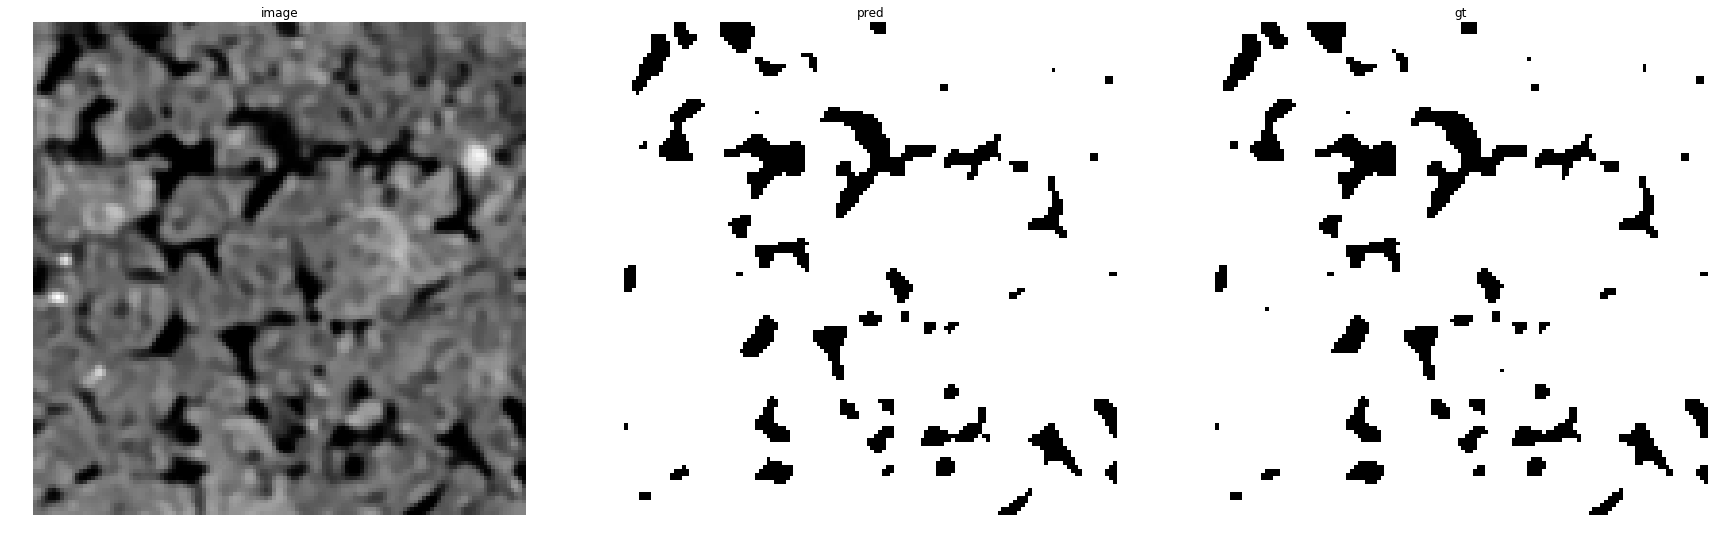

accuracy    : 0.993408203125
precision   : 0.9953305813087907
recall      : 0.9973553943174883
f1          : 0.9963419590841349
pr_auc      : 0.9999632676591489
iou         : 0.9927105831533477


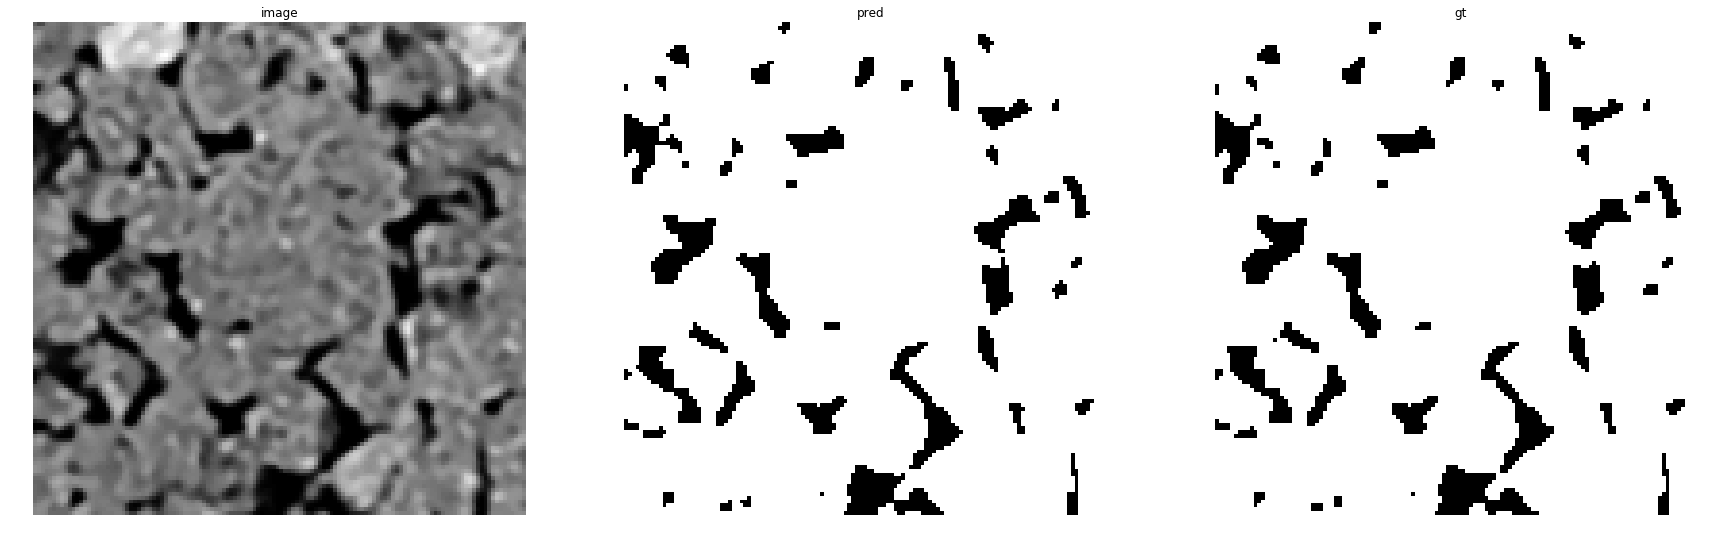

accuracy    : 0.99359130859375
precision   : 0.9961044286495353
recall      : 0.9967174998290365
f1          : 0.996410869936763
pr_auc      : 0.999961072416872
iou         : 0.9928474114441417


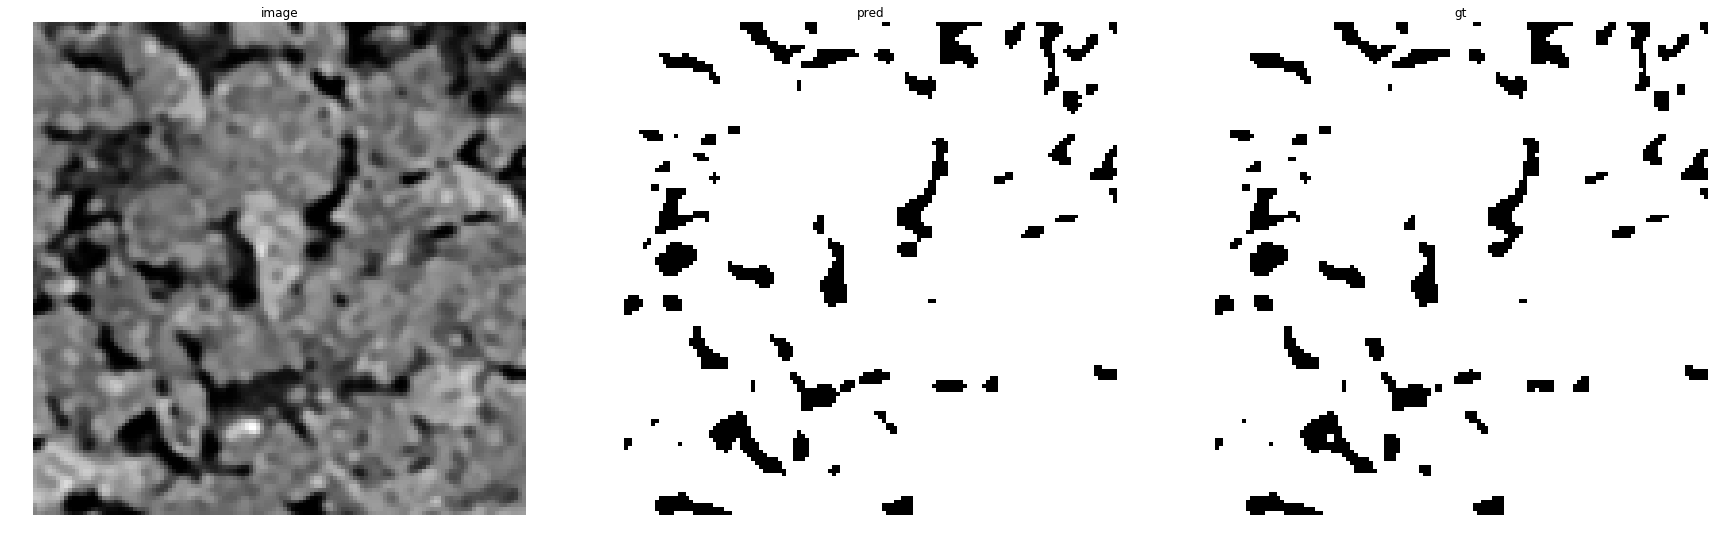

accuracy    : 0.9913330078125
precision   : 0.9962955479221391
recall      : 0.9941528328516701
f1          : 0.9952230370719236
pr_auc      : 0.9999218695033019
iou         : 0.9904914959153609


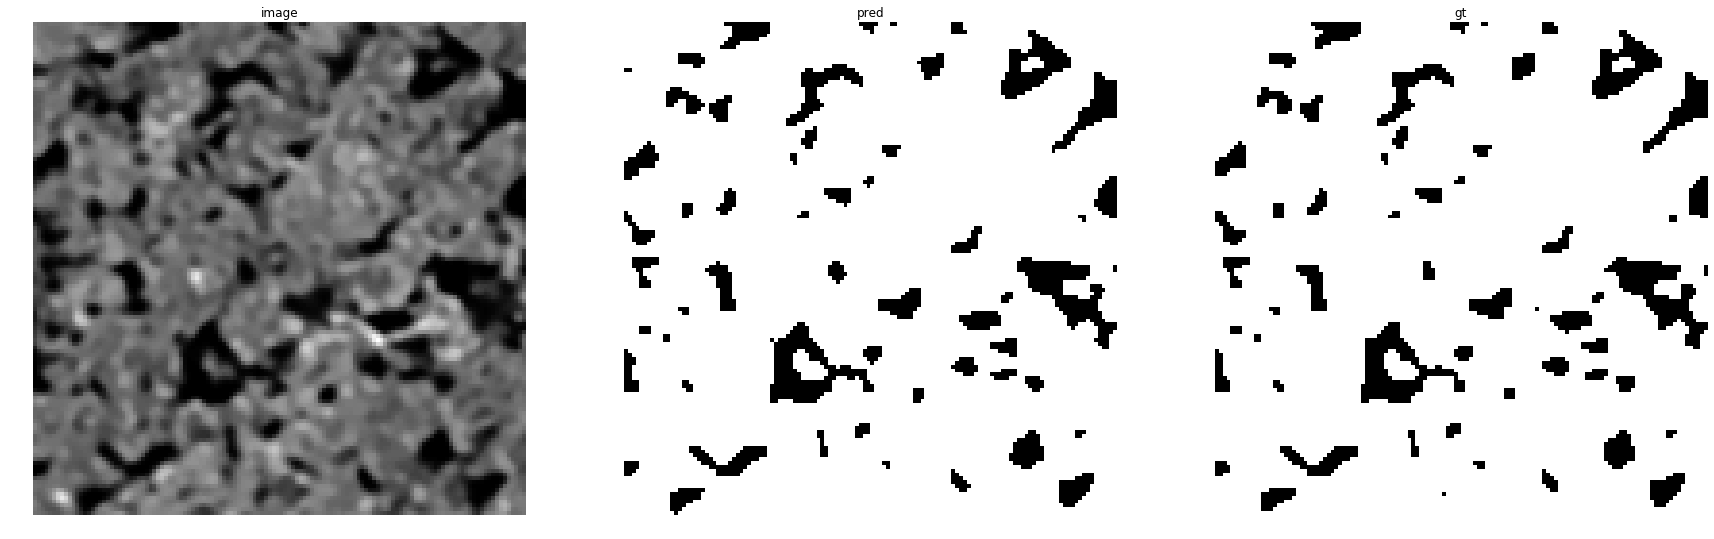

accuracy    : 0.992919921875
precision   : 0.9961224207173521
recall      : 0.9958466011352624
f1          : 0.9959844918305178
pr_auc      : 0.9999540946950729
iou         : 0.9920011032960971


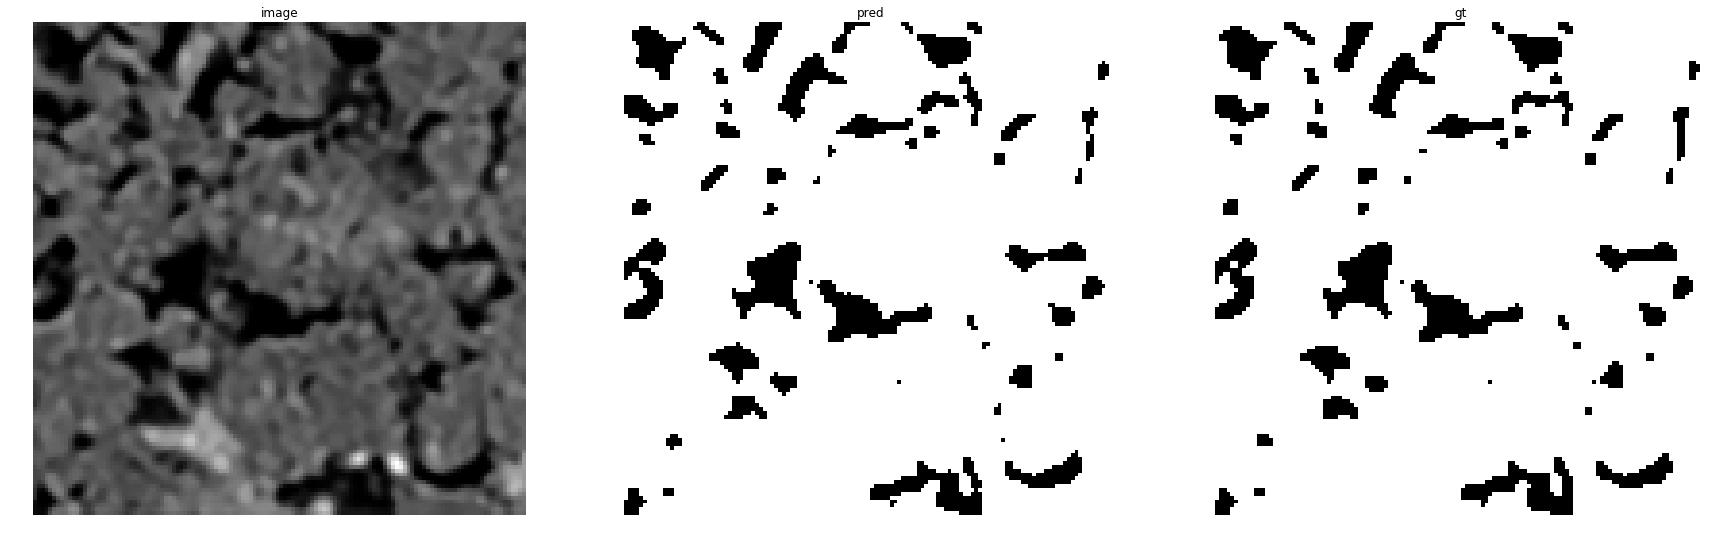

accuracy    : 0.9908447265625
precision   : 0.9943518583083467
recall      : 0.9951845906902087
f1          : 0.9947680502267179
pr_auc      : 0.9999224210664059
iou         : 0.9895905621096461


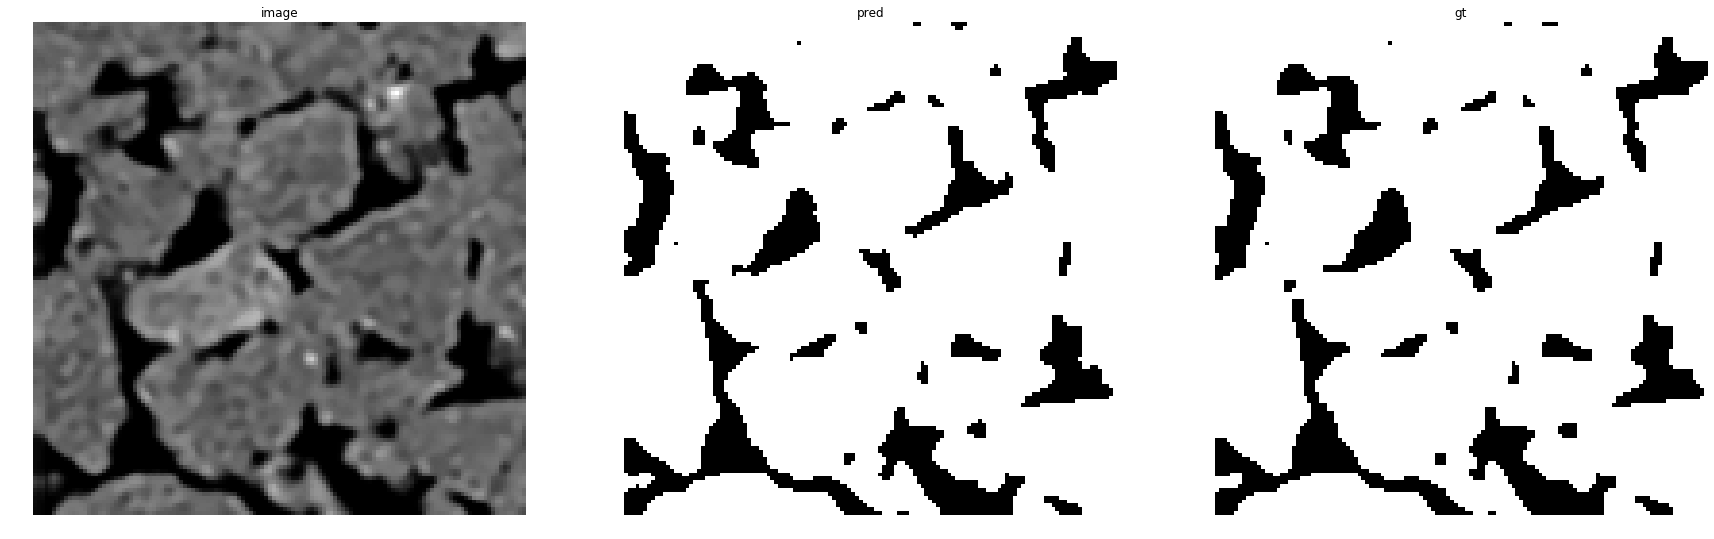

accuracy    : 0.99237060546875
precision   : 0.9948956946293831
recall      : 0.9958533876342095
f1          : 0.9953743107723051
pr_auc      : 0.9999356312317116
iou         : 0.9907912185059673


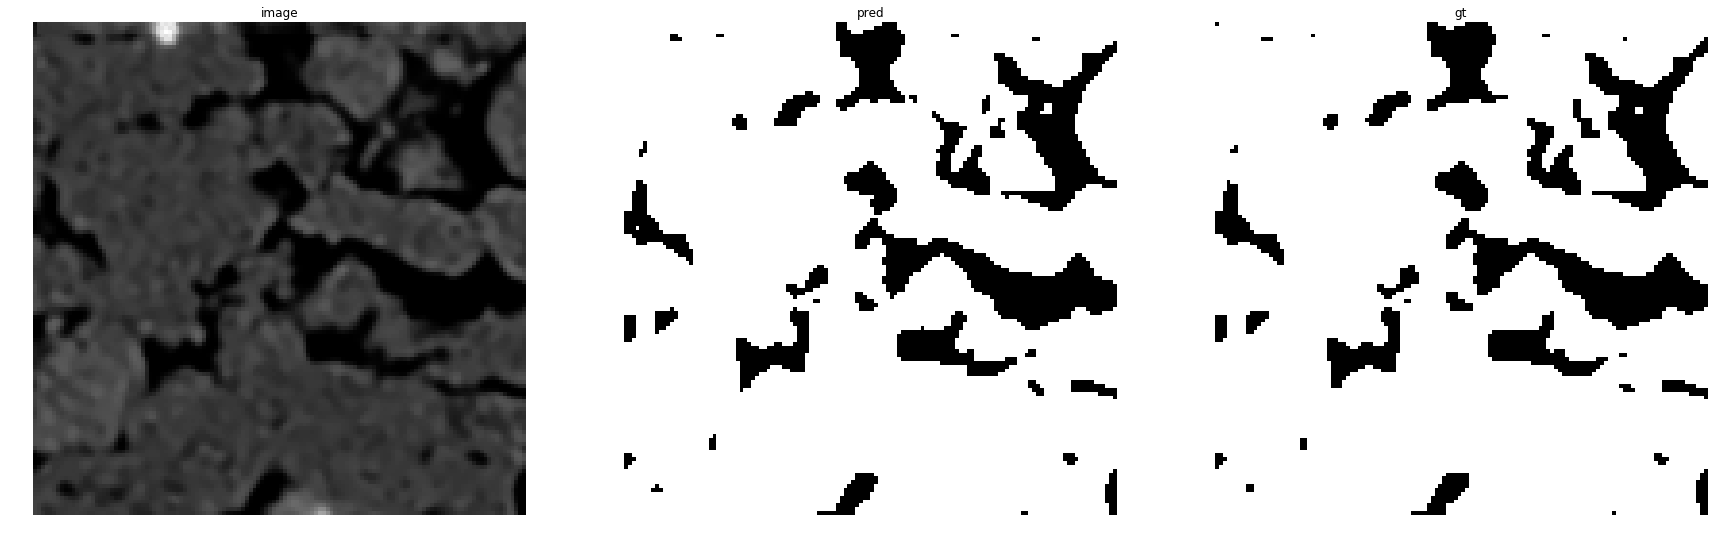

accuracy    : 0.990478515625
precision   : 0.9935976718806839
recall      : 0.9950455373406193
f1          : 0.9943210775391337
pr_auc      : 0.9998854406369815
iou         : 0.9887062911749801


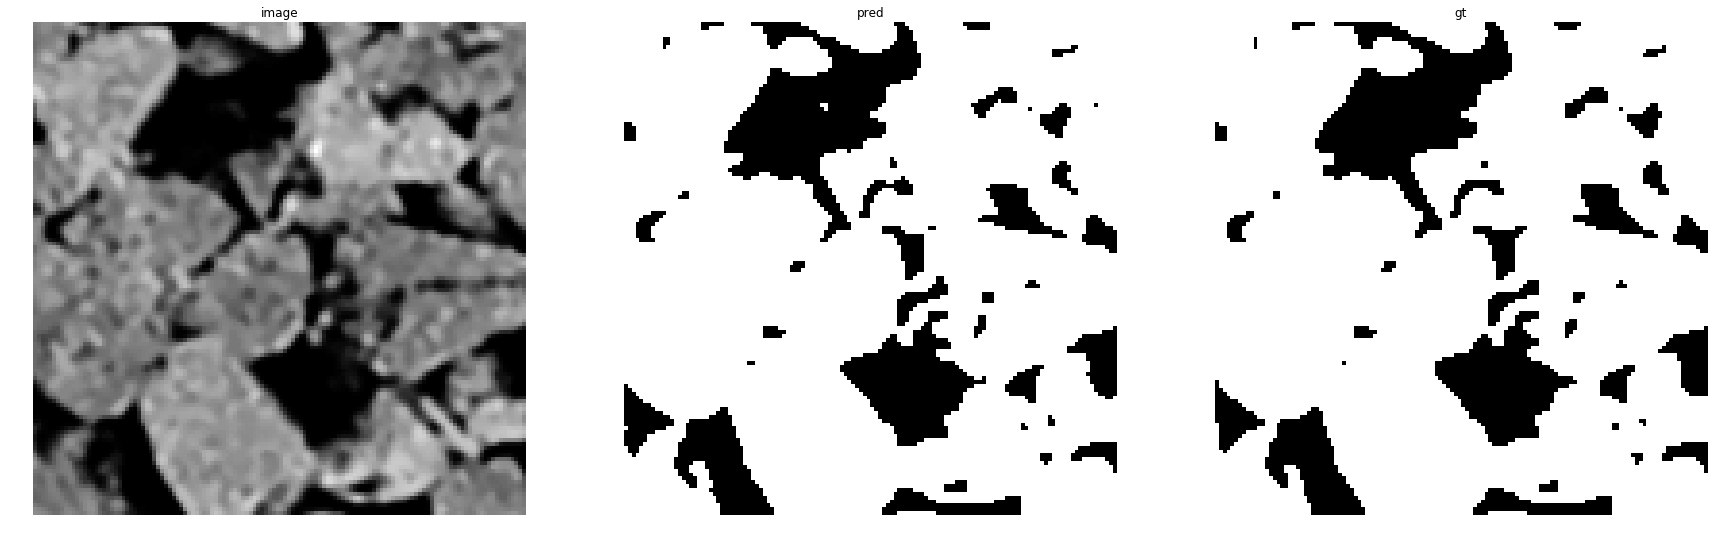

accuracy    : 0.98992919921875
precision   : 0.9933046021240572
recall      : 0.9939930689256835
f1          : 0.9936487162708341
pr_auc      : 0.9998405785817852
iou         : 0.9873776009791921


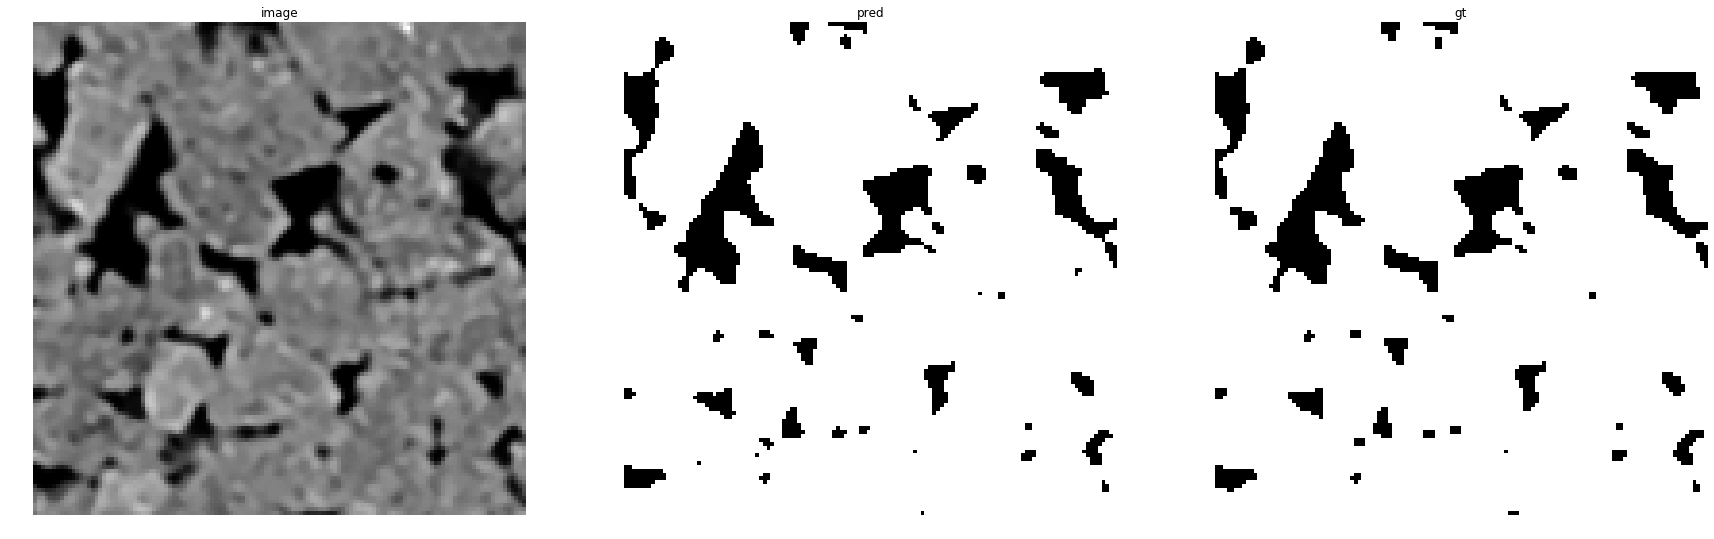

accuracy    : 0.99371337890625
precision   : 0.9969821673525378
recall      : 0.9959575196985269
f1          : 0.9964695801199657
pr_auc      : 0.9999631427161488
iou         : 0.9929640002732427


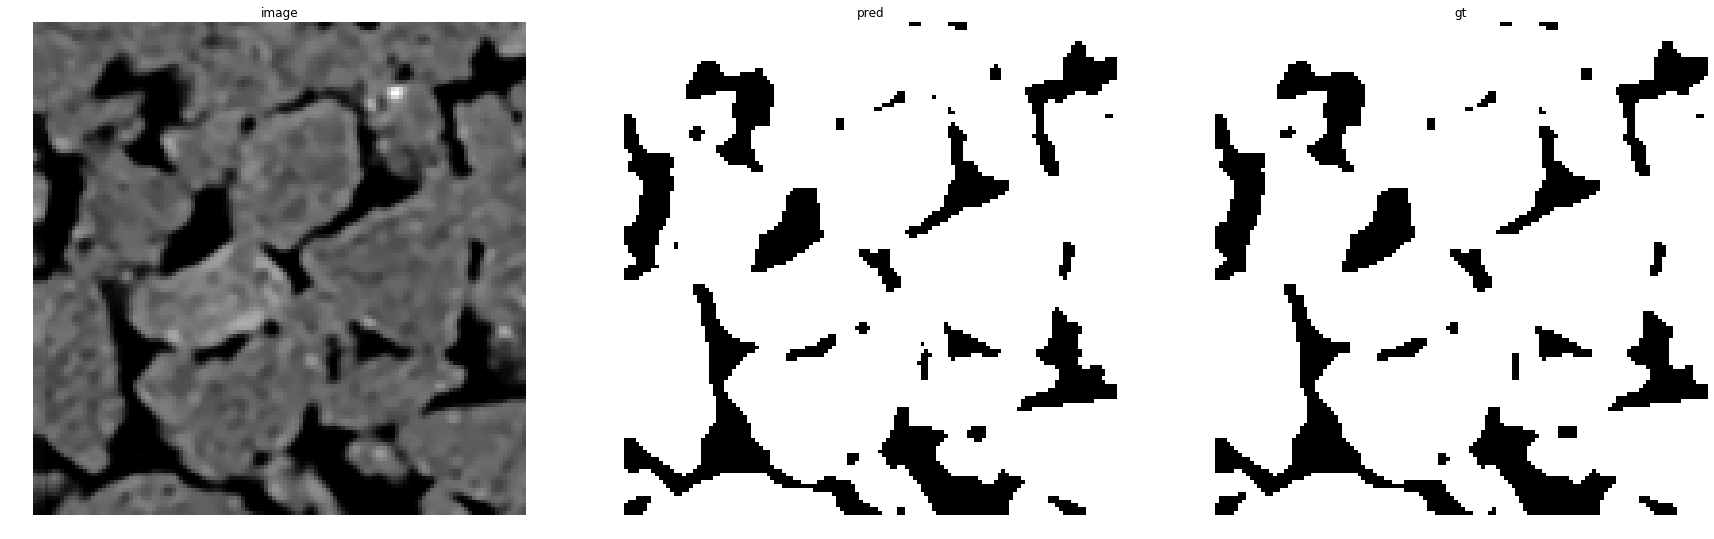

accuracy    : 0.9918212890625
precision   : 0.995221027479092
recall      : 0.9947753396029259
f1          : 0.9949981336319523
pr_auc      : 0.9999231806289202
iou         : 0.9900460555638092


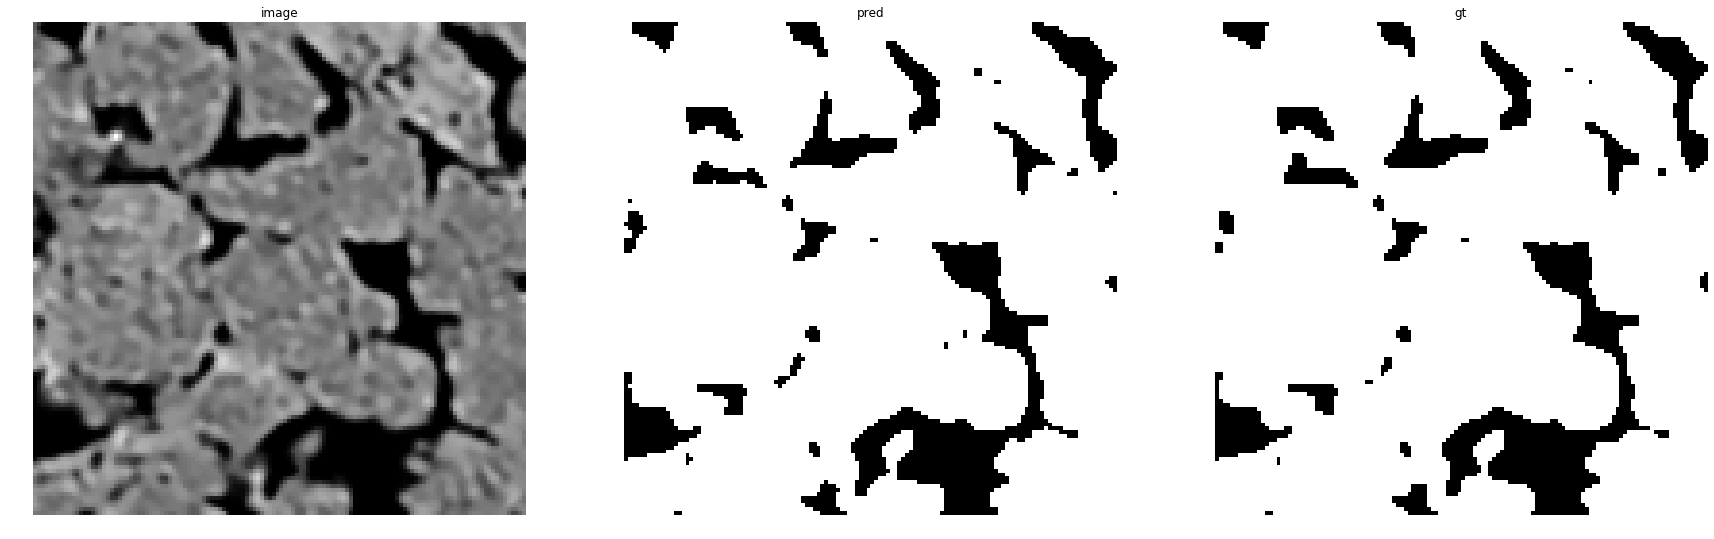

accuracy    : 0.99114990234375
precision   : 0.9949505878958378
recall      : 0.9945918661667147
f1          : 0.9947711946918609
pr_auc      : 0.9999196958969679
iou         : 0.9895967857655331


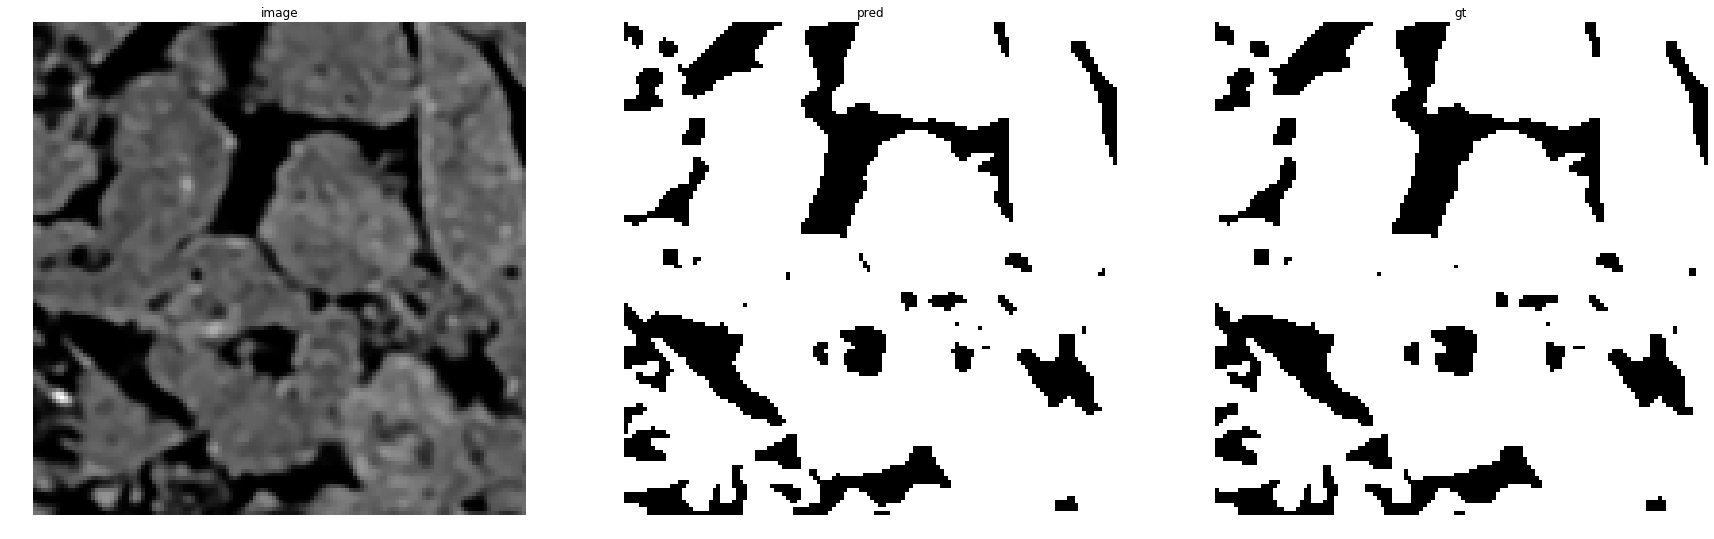

accuracy    : 0.9896240234375
precision   : 0.9934115865202575
recall      : 0.9937125975304901
f1          : 0.9935620692266909
pr_auc      : 0.999880860354936
iou         : 0.9872065021071643


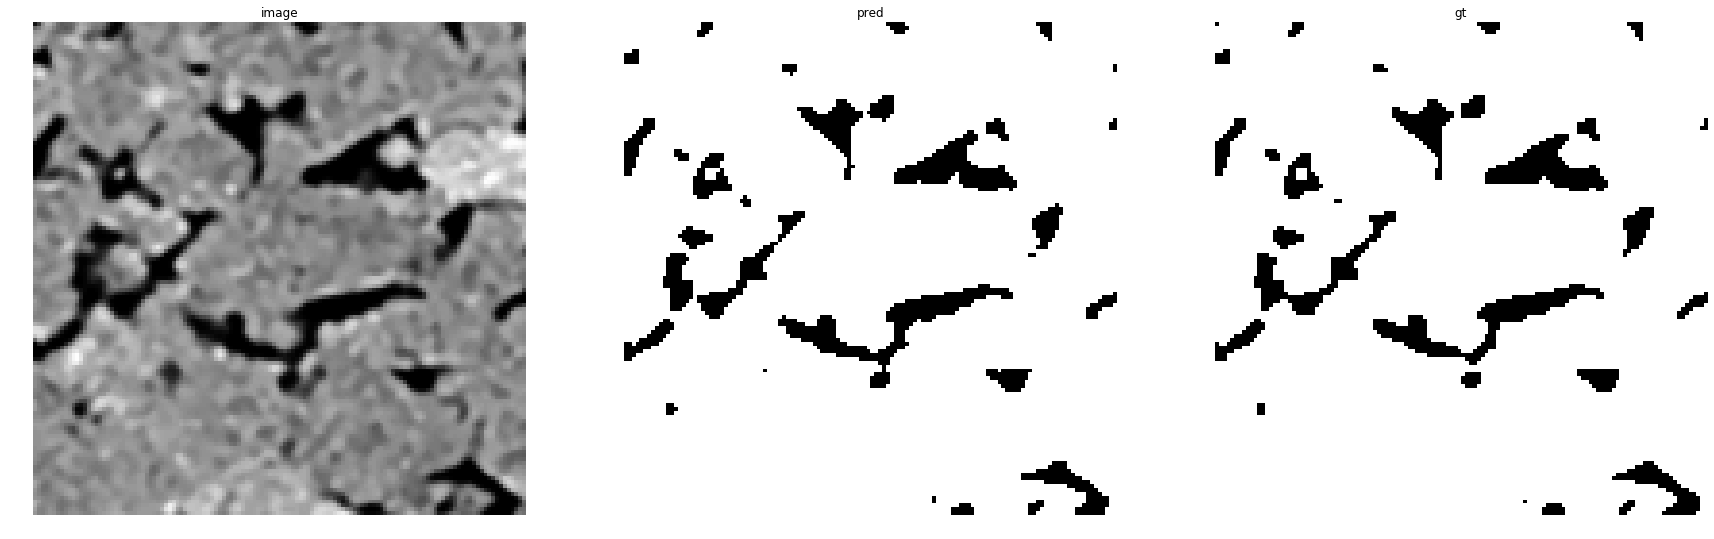

accuracy    : 0.9925537109375
precision   : 0.9966348095302194
recall      : 0.9951612903225806
f1          : 0.9958975048759163
pr_auc      : 0.9999547308708494
iou         : 0.9918285331547221


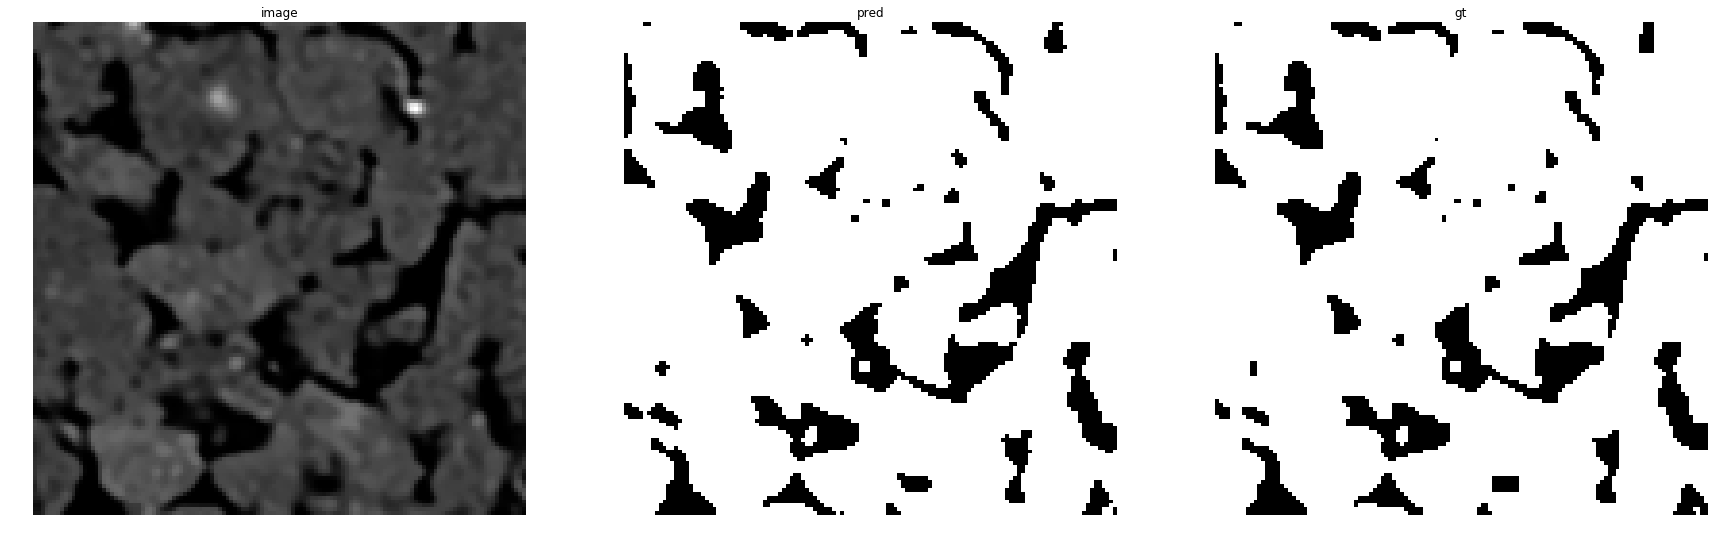

accuracy    : 0.98809814453125
precision   : 0.9937138728323699
recall      : 0.9922083543755862
f1          : 0.9929605429406881
pr_auc      : 0.999864298017799
iou         : 0.9860195010037281


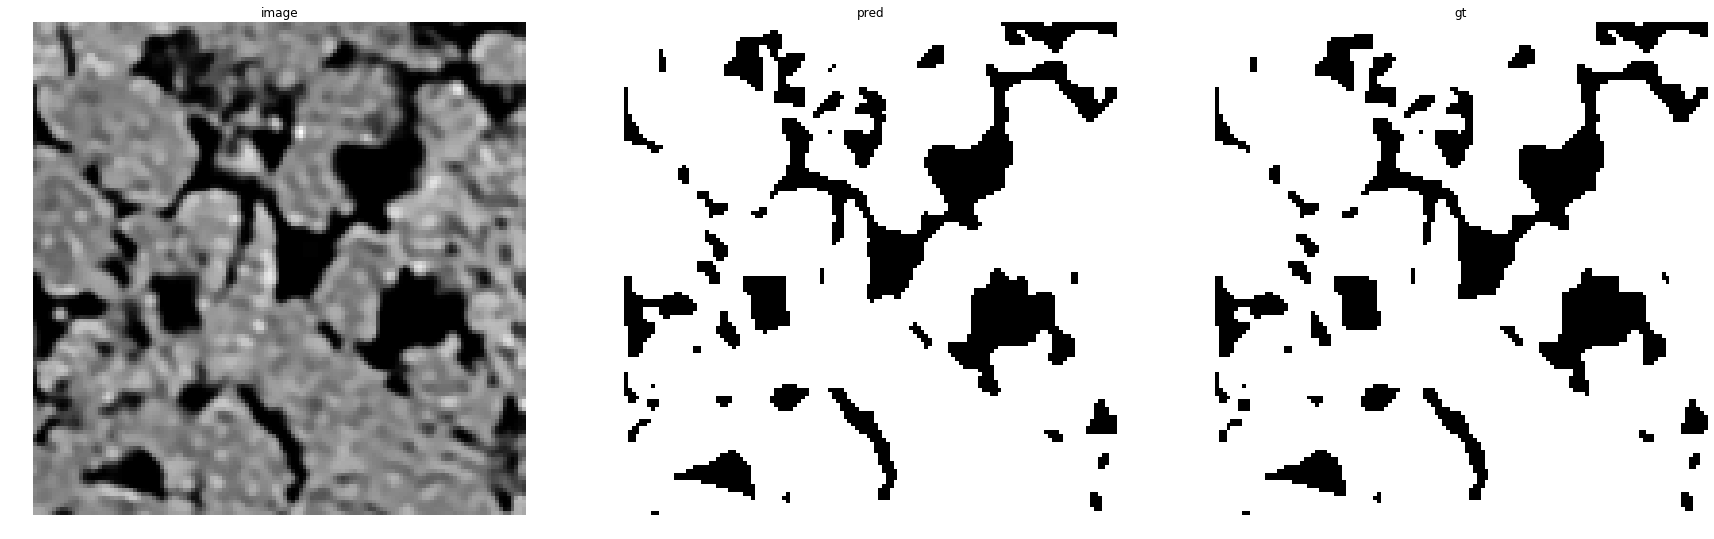

accuracy    : 0.98907470703125
precision   : 0.9940524868039551
recall      : 0.9926503340757238
f1          : 0.9933509156420638
pr_auc      : 0.9998803572677211
iou         : 0.986789667896679


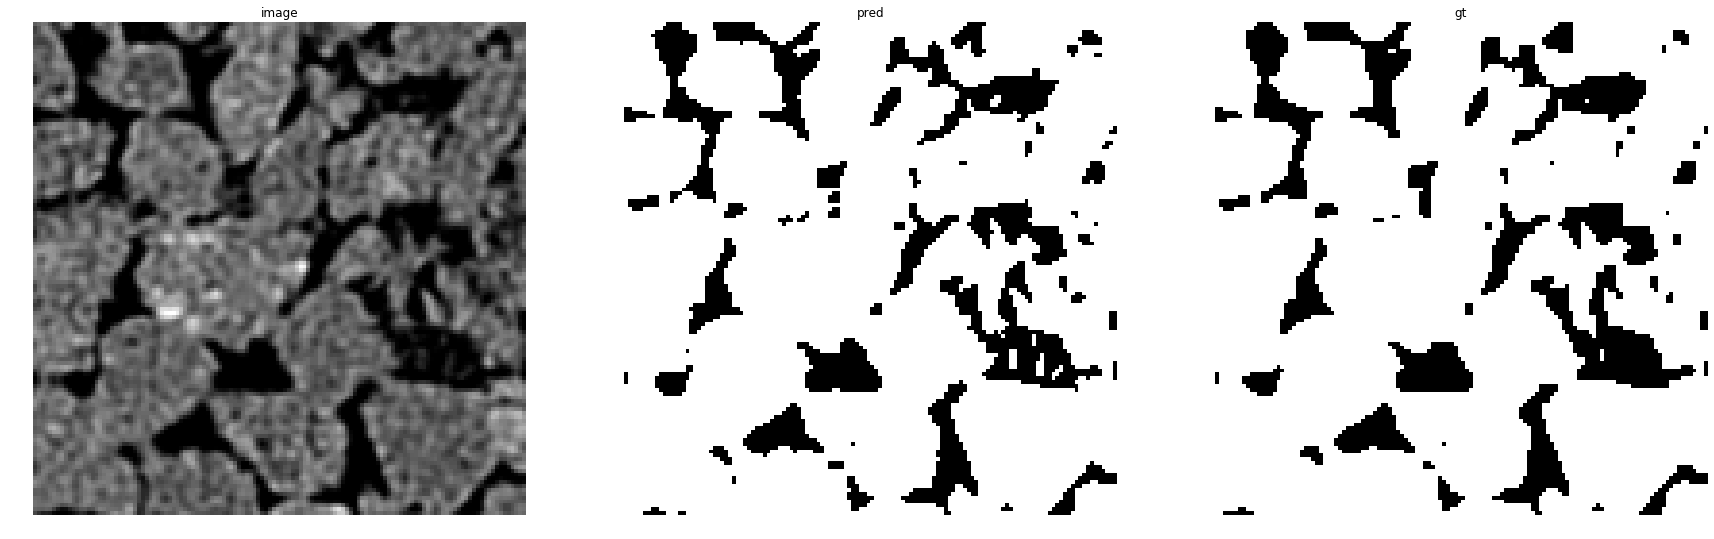

accuracy    : 0.980224609375
precision   : 0.9851967566763371
recall      : 0.9906500112199865
f1          : 0.9879158585707892
pr_auc      : 0.9995387513894228
iou         : 0.9761202830188679


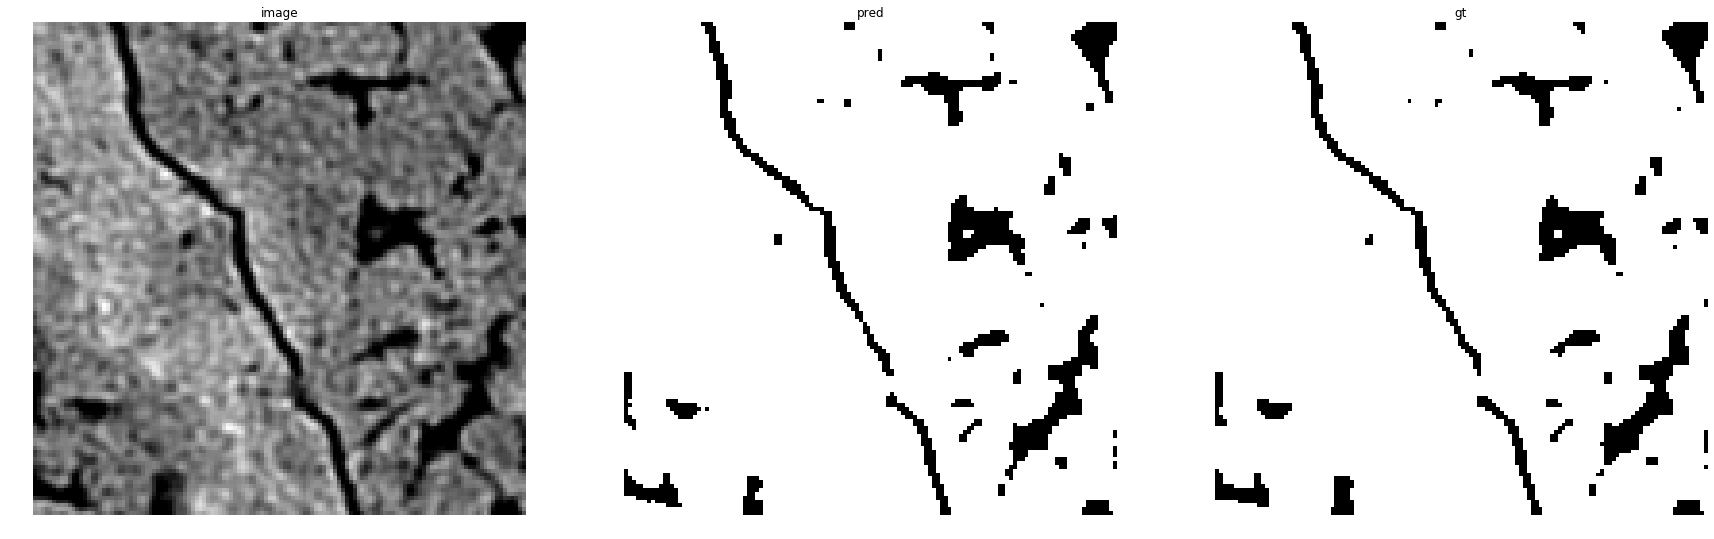

accuracy    : 0.99127197265625
precision   : 0.9957207809574753
recall      : 0.9947231313873489
f1          : 0.9952217061516357
pr_auc      : 0.9999283775631185
iou         : 0.9904888593282342


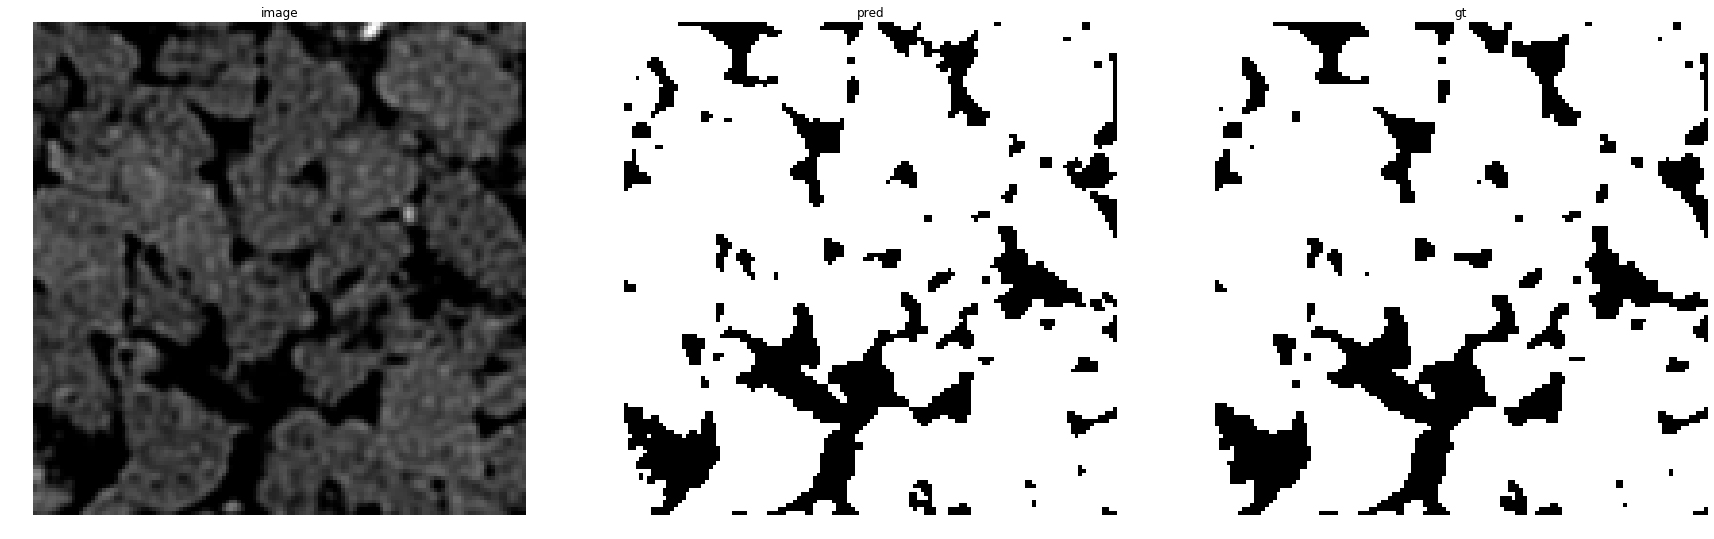

accuracy    : 0.98065185546875
precision   : 0.9849314041532349
recall      : 0.9912479251546703
f1          : 0.9880795698116046
pr_auc      : 0.9996101216961679
iou         : 0.9764399851356373


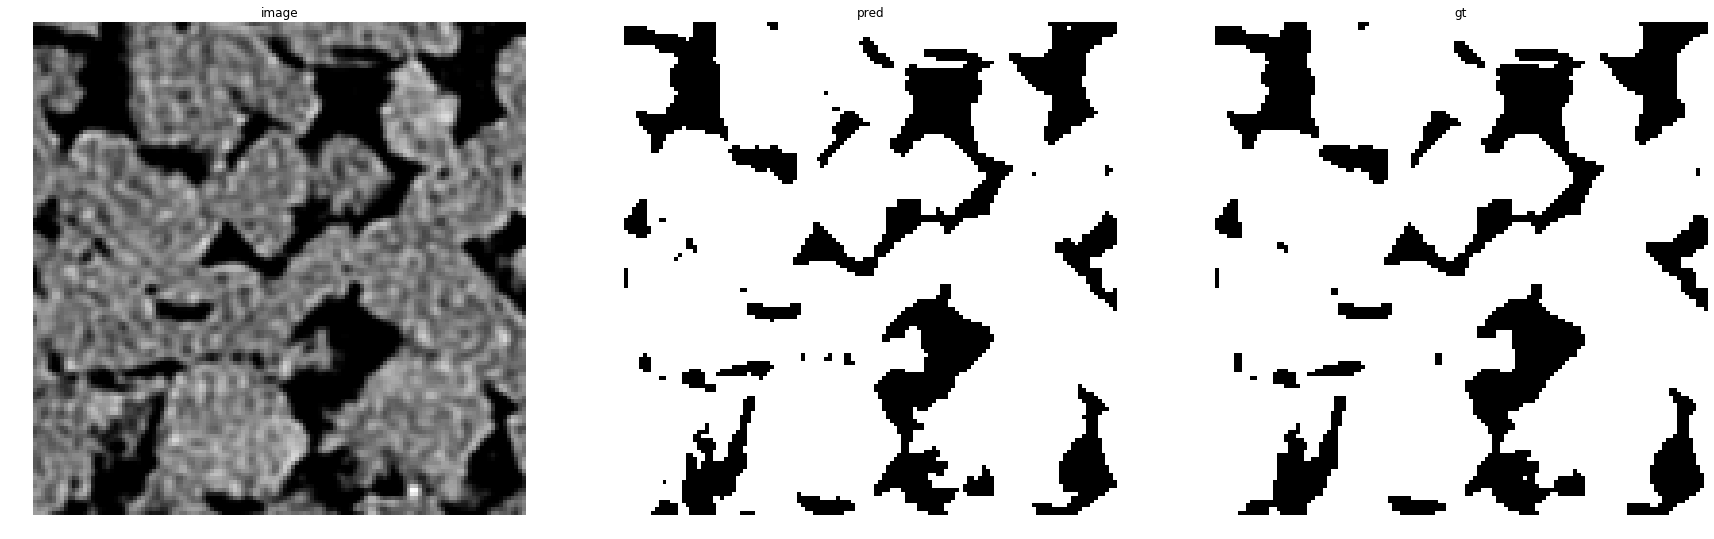

accuracy    : 0.984375
precision   : 0.9880009411026586
recall      : 0.9918904023305252
f1          : 0.98994185132799
pr_auc      : 0.999630349181673
iou         : 0.9800840205383539


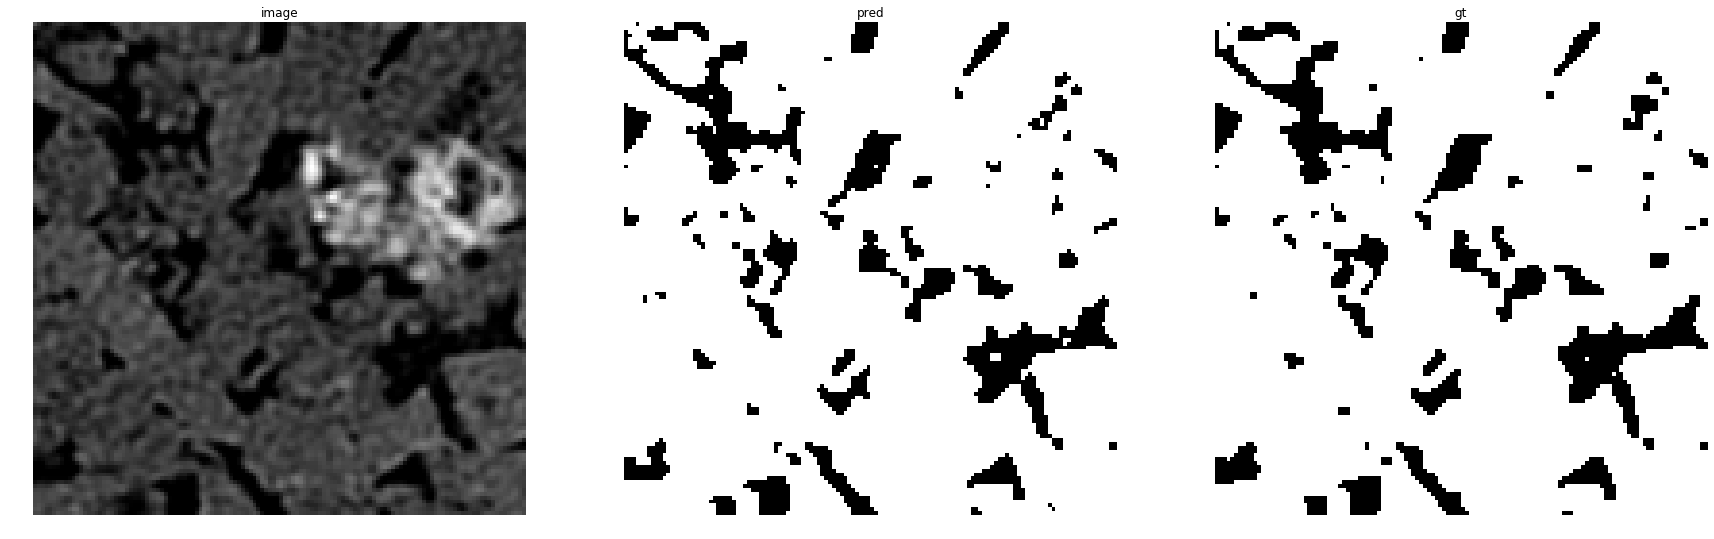

accuracy    : 0.982177734375
precision   : 0.9885417408013665
recall      : 0.9906568718351045
f1          : 0.9895981761185523
pr_auc      : 0.9996310839868215
iou         : 0.9794105203779438


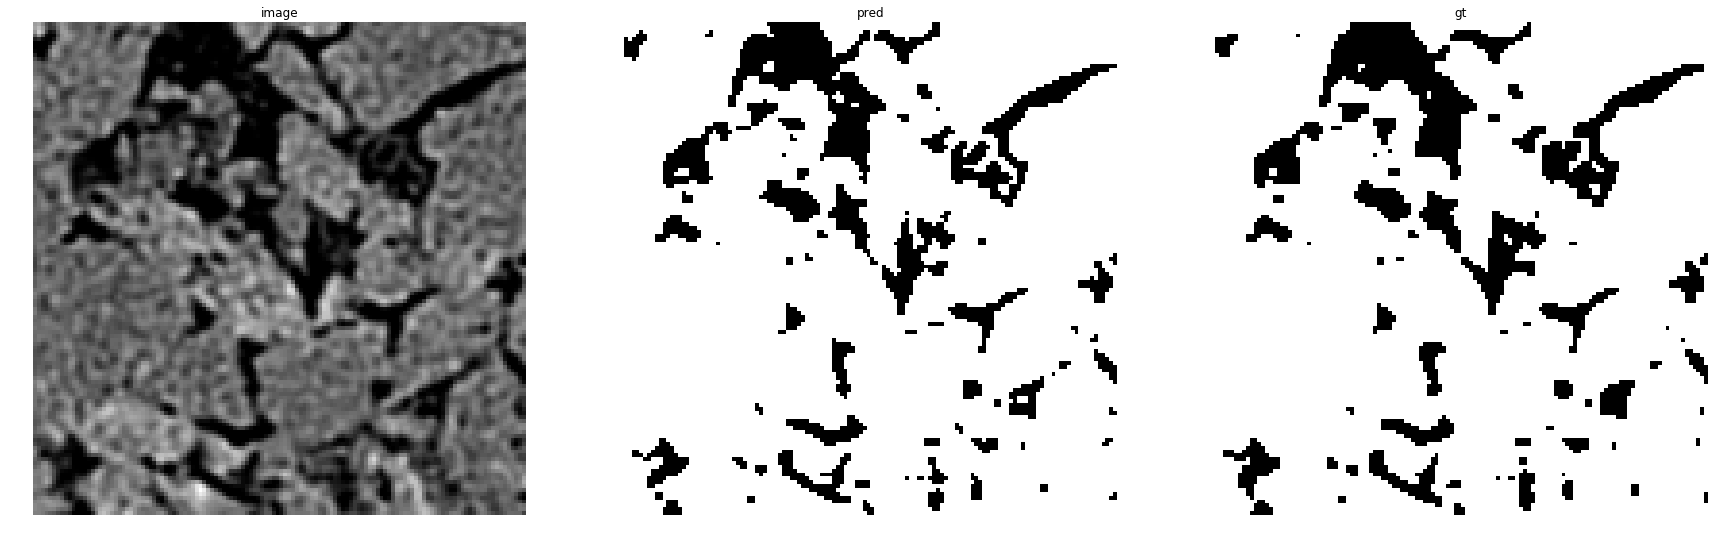

accuracy    : 0.9786376953125
precision   : 0.9827051956474743
recall      : 0.991998254164545
f1          : 0.9873298580944108
pr_auc      : 0.999478949688231
iou         : 0.9749767641381283


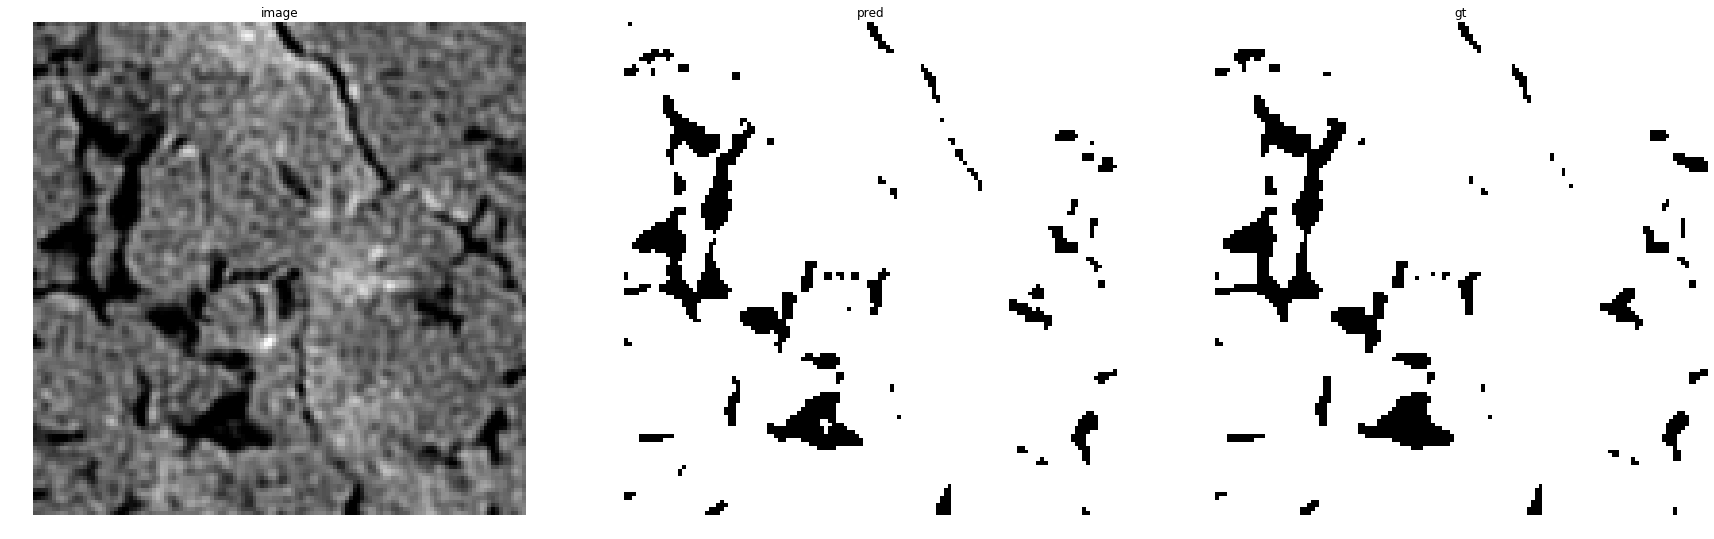

accuracy    : 0.98675537109375
precision   : 0.9928320169907745
recall      : 0.9927661268914255
f1          : 0.9927990708478514
pr_auc      : 0.9998323520467305
iou         : 0.9857011070110702


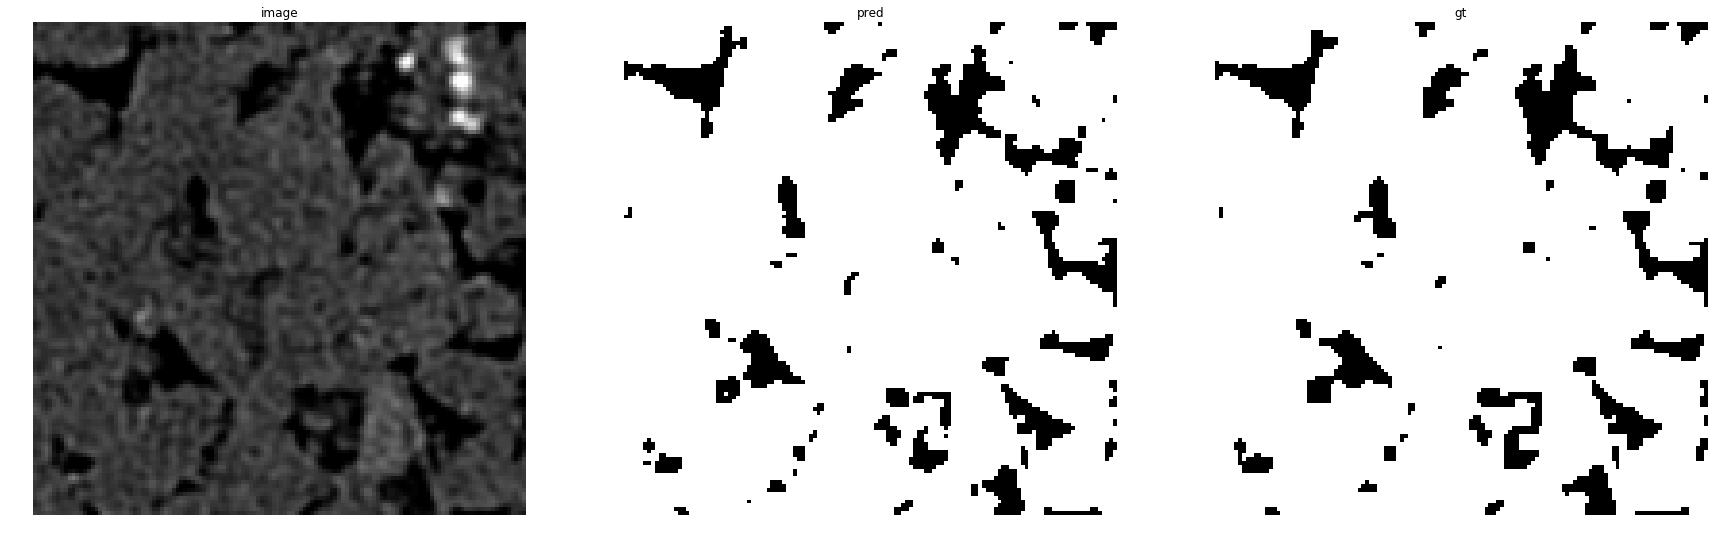

accuracy    : 0.98504638671875
precision   : 0.9900359811790755
recall      : 0.9929904920535776
f1          : 0.9915110356536502
pr_auc      : 0.9996792027253114
iou         : 0.9831649831649831


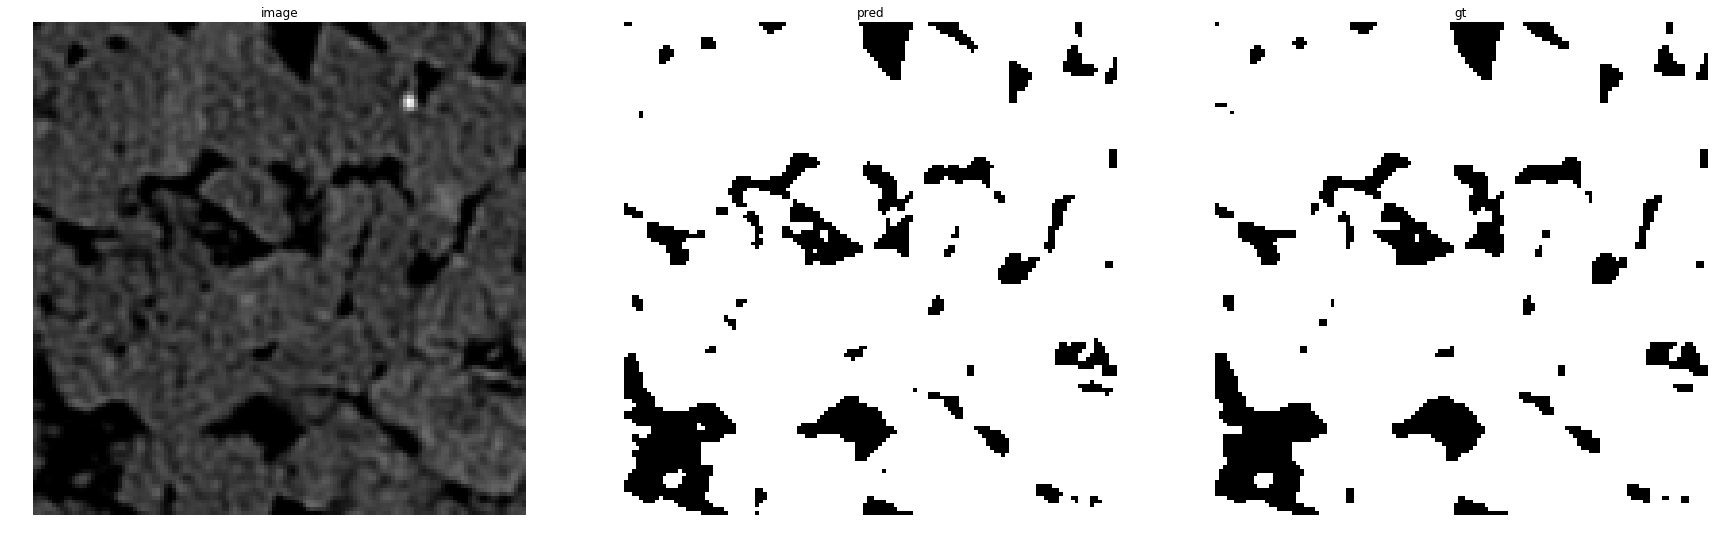

accuracy    : 0.98663330078125
precision   : 0.9919887561489811
recall      : 0.9926165529850222
f1          : 0.992302555270465
pr_auc      : 0.9998136670840965
iou         : 0.984722706662016


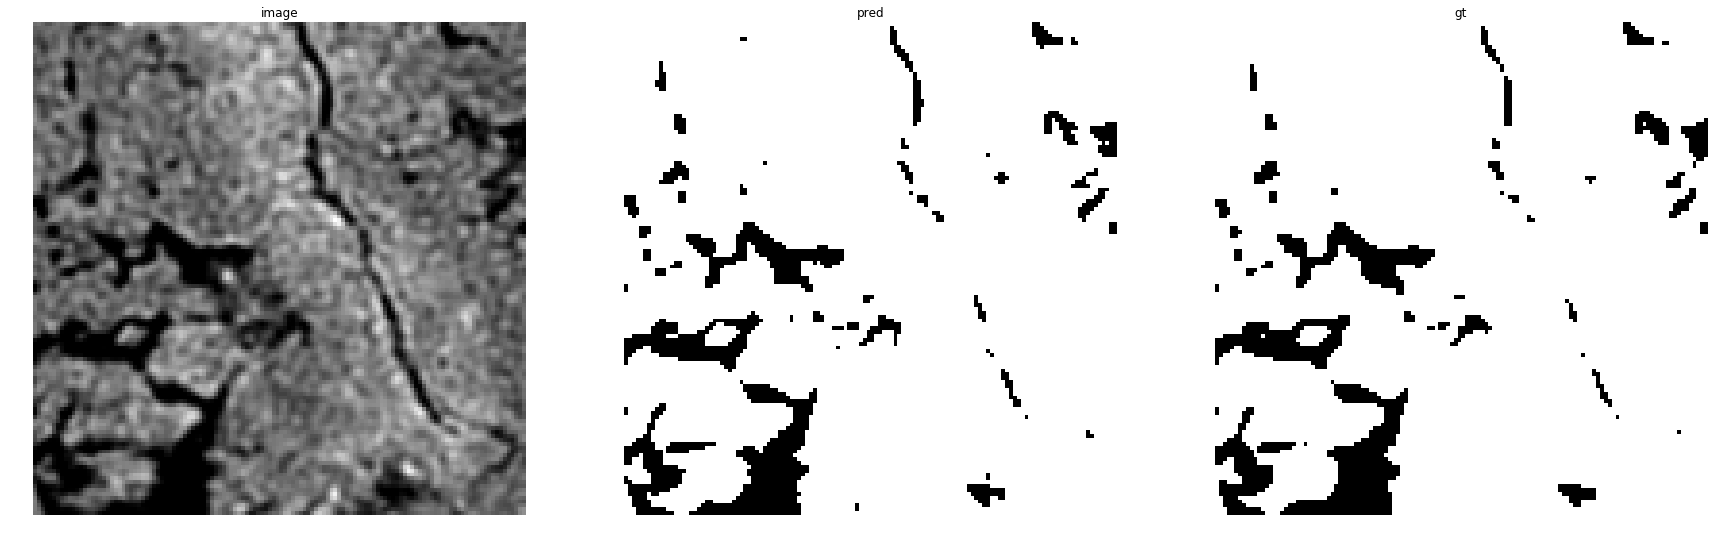

accuracy    : 0.98748779296875
precision   : 0.992475086434818
recall      : 0.9936201981810778
f1          : 0.9930473121926403
pr_auc      : 0.9998542683666455
iou         : 0.9861906365779723


In [39]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break